In [1]:
'''
Prepare parameters for model based on deisgn and measurement conditions
Unit: mm
Author: Yitian Shao
Created on 2022.01.17
'''
# %matplotlib notebook 
# %matplotlib notebook 

import time
from os import walk
import os.path as ospa
import numpy as np
import re
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal

plt.rcParams.update({'font.size': 14})

from PouchLib import getEpsilon0 

try:
    EPSILON0 = getEpsilon0() # (Farad/m) Free-space permittivity
except:
    EPSILON0 = 0.0000000000088541878128

calib = np.loadtxt('Calibration20210802.txt')
print("Calibration line a = %.16f, b = %.16f" % (calib[0],calib[1]))


c shared library unfounded, switch to normal python computing
Calibration line a = 0.0497649079931161, b = 0.1217075926746309


In [ ]:
''' Condition table '''
# Layout: %d - number of dashes dividing rectangle column, T - extra triangle column, - R - an extra rectangle cell
colNames = ['CondiName','Shell','ls_um','Fluid','Infill_mL','DashLength_mm','FlatDashDist_mm','DashSpace_mm','Layout',
            'triNum','rectNum','TubeLength_mm','TubeInnerDia_mm','VoltPolar','Voltage_V','HVSupply','Info']

''' For data collected before 2022.04 '''
condiTable = [
    ['6mLBOPP12',           'BOPP',20,'IC',6,12,10,12.66,'6T5T4T3T2T1T',48,27,150,6-2,'Uni',8800,'Wearable','20210719_RigidTube'],
    ['6mLBOPP16',           'BOPP',20,'IC',6,16,10,8.66,'6T5T4T3T2T1T',48,27,150,6-2,'Uni',8800,'Wearable','20210719_RigidTube'],
    ['6mLL0Ws12SoftTube','PETL0Ws',30,'IC',6,12,10,12.66,'6T5T4T3T2T1T',48,27,150,4,'Uni',8800,'Wearable','20210719_SoftTube'],
    ['BOPP16ShiftedU7kV',   'BOPP',20,'IC',6,16,10,8.66,'5T4T3T2T1TRT',36,21,150,6-2,'Uni',7200,'Wearable','20210729_RigidTube'],
    ['L0Ws16ShiftedU9kV','PETL0Ws',30,'IC',6,16,10,8.66,'5T4T3T2T1TRT',36,21,150,6-2,'Uni',8800,'Wearable','20210729_RigidTube'],
    ['L0Ws16NoShift',    'PETL0Ws',30,'IC',6,16,10,8.66,'T5T4T3T2T1TR',48,21,150,6-2,'Uni',8800,'Wearable','20210729_RigidTube'],
    ['Mylar16',            'Mylar',15,'IC',6,16,10,8.66,'5T4T3T2T1TRT',36,21,150,6-2,'Uni',7200,'Wearable','20210728_RigidTube'],
    ['Mylar16NoShift',     'Mylar',15,'IC',6,16,10,8.66,'T5T4T3T2T1TR',48,21,150,6-2,'Uni',7200,'Wearable','20210728_RigidTube'],
    ['BOPP16',              'BOPP',20,'IC',6,16,10,8.66,'T5T4T3T2T1TR',48,21,150,6-2,'Uni',7200,'Wearable','20210728_RigidTube'],
    ['BOPP20',              'BOPP',20,'IC',6,20,10,8.66,'T5T4T3T2T1',45,20,150,6-2,'Uni',7200,'Wearable','20210728_RigidTube'],
    ['BOPP16U9kV',          'BOPP',20,'IC',6,16,10,8.66,'T5T4T3T2T1TR',48,21,150,6-2,'Uni',8800,'Wearable','20210728_RigidTube'],
    ['MLSi16SB7kV',  'Mylar',15,'Silicone',6,16,10,8.66,'5T4T3T2T1TRT',36,21,150,6-2,'Bi',7000,'Trek','20210813_RigidTube_16S'],
    ['MLSi16CB7kV',  'Mylar',15,'Silicone',6,16,10,8.66,'T5T4T3T2T1TR',48,21,150,6-2,'Bi',7000,'Trek','20210813_RigidTube_16C'],
    ['MLSi20SB7kV',  'Mylar',15,'Silicone',6,20,10,8.66,'5T4T3T2T1T',37,20,150,6-2,'Bi',7000,'Trek','20210813_RigidTube_20S'],
    ['MLSi20B7kV',   'Mylar',15,'Silicone',6,20,10,8.66,'T5T4T3T2T1',45,20,150,6-2,'Bi',7000,'Trek','20210813_RigidTube'],
    ['Tube6mmPressBalloon','Mylar',15,'IC',6,20,10,8.66,'T5T4T3T2T1',45,20,35,6-2,'Bi',6900,'Wearable','20210924'],
    ['MedTubePressBalloon','Mylar',15,'IC',6,20,10,8.66,'T5T4T3T2T1',45,20,150,3.2,'Bi',6900,'Wearable','20210924'],
    ['PressBalloon2',      'Mylar',15,'IC',6,20,10,8.66,'T5T4T3T2T1',45,20,150,3.2,'Bi',6900,'Wearable','20210924'],
    ['Tube8mmPressBalloon','Mylar',15,'IC',6,20,10,8.66,'T5T4T3T2T1',45,20,150,8-2,'Bi',6900,'Wearable','20210924'],
    ['Pressure',           'Mylar',15,'IC',6,20,10,8.66,'T5T4T3T2T1',45,20,150,8-2,'Bi',6900,'Wearable','20210924'],
    ['FR3Tube8mm',         'Mylar',15,'IC',6,20,10,8.66,'T5T4T3T2T1',45,20,150,8-2,'Bi',6900,'Wearable','20211008'],
    ['FR3MedTube',         'Mylar',15,'IC',6,20,10,8.66,'T5T4T3T2T1',45,20,150,3.2,'Bi',6900,'Wearable','20211008'],
    ['SiMedTube',    'Mylar',15,'Silicone',6,20,10,8.66,'T5T4T3T2T1',45,20,150,3.2,'Bi',6900,'Wearable','20211008'],
    ['L0WsSi5-20Trek8kV',      'L0Ws',20,'Silicone',6,20,10,8.66,'T5T4T3T2T1',45,20,150,4.0,'Bi',8000,'Trek','20220302'],
    ['L0WsSi5-20Trek9kV',      'L0Ws',20,'Silicone',6,20,10,8.66,'T5T4T3T2T1',45,20,150,4.0,'Bi',9000,'Trek','20220302'],
    ['L0WsSi5-20Trek10kV',     'L0Ws',20,'Silicone',6,20,10,8.66,'T5T4T3T2T1',45,20,150,4.0,'Bi',10000,'Trek','20220302'],
    ['L0WsSi6-16Trek9kVHVTop', 'L0Ws',20,'Silicone',6,16,10,8.66,'6T5T4T3T2T1T',48,27,150,4.0,'Bi',9000,'Trek','20220302'],
    ['L0WsSi6-16Trek10kVHVTop','L0Ws',20,'Silicone',6,16,10,8.66,'6T5T4T3T2T1T',48,27,150,4.0,'Bi',10000,'Trek','20220302'],
    ['L0WsSi5-20sTrek9kVHVBot','L0Ws',20,'Silicone',6,20,10,8.66,'5T4T3T2T1T',37,20,150,4.0,'Bi',9000,'Trek','20220302'],
]

''' For data collected since 2022.04 '''
condiTable = [
    ['MLSi20HV7kV.5Hz',     'Mylar',15,'Silicone',6,20,10,8.66,'T5T4T3T2T',45,18,150,4.0,'Bi',7000,'Trek','20220402'],
    ['MLSi20HV7kV1Hz',      'Mylar',15,'Silicone',6,20,10,8.66,'T5T4T3T2T',45,18,150,4.0,'Bi',7000,'Trek','20220402'],
    ['MLSi20HV7kV10mL1Hz',  'Mylar',15,'Silicone',10,20,10,8.66,'T5T4T3T2T',45,18,150,4.0,'Bi',7000,'Trek','20220402'],
    ['MLSi20HV7kV10mL2Hz',  'Mylar',15,'Silicone',10,20,10,8.66,'T5T4T3T2T',45,18,150,4.0,'Bi',7000,'Trek','20220402'],
    ['MLSi20HV7kV10mL4Hz',  'Mylar',15,'Silicone',10,20,10,8.66,'T5T4T3T2T',45,18,150,4.0,'Bi',7000,'Trek','20220402'],
    ['MLSi20HV7kV10mL10Hz', 'Mylar',15,'Silicone',10,20,10,8.66,'T5T4T3T2T',45,18,150,4.0,'Bi',7000,'Trek','20220402'],
    ['MLSi20HV7kV10mL20Hz', 'Mylar',15,'Silicone',10,20,10,8.66,'T5T4T3T2T',45,18,150,4.0,'Bi',7000,'Trek','20220402'],
    
    ['MLSi20HV7kV6mL.5Hz',  'Mylar',15,'Silicone',6,20,10,8.66,'T5T4T3T2T',45,18,150,4.0,'Bi',7000,'Trek','20220402'],
    ['MLSi20HV7kV7mL.5Hz',  'Mylar',15,'Silicone',7,20,10,8.66,'T5T4T3T2T',45,18,150,4.0,'Bi',7000,'Trek','20220402'],
    ['MLSi20HV7kV8mL.5Hz',  'Mylar',15,'Silicone',8,20,10,8.66,'T5T4T3T2T',45,18,150,4.0,'Bi',7000,'Trek','20220402'],
    ['MLSi20HV7kV10mL.5Hz', 'Mylar',15,'Silicone',10,20,10,8.66,'T5T4T3T2T',45,18,150,4.0,'Bi',7000,'Trek','20220402'],
    
    ['MLSi16F4mLHV7kV',     'Mylar',15,'Silicone',4, 16,10,8.66,'6T5T4T3T2T1T',48,27,150,4.0,'Bi',7000,'Trek','20220426'],
    ['MLSi16F5mLHV7kV',     'Mylar',15,'Silicone',5, 16,10,8.66,'6T5T4T3T2T1T',48,27,150,4.0,'Bi',7000,'Trek','20220426'],
    ['MLSi16F6mLHV7kV',     'Mylar',15,'Silicone',6, 16,10,8.66,'6T5T4T3T2T1T',48,27,150,4.0,'Bi',7000,'Trek','20220426'],
    ['MLSi16F7mLHV7kV',     'Mylar',15,'Silicone',7, 16,10,8.66,'6T5T4T3T2T1T',48,27,150,4.0,'Bi',7000,'Trek','20220426'],
    ['MLSi16F8mLHV7kV',     'Mylar',15,'Silicone',8, 16,10,8.66,'6T5T4T3T2T1T',48,27,150,4.0,'Bi',7000,'Trek','20220426'],
    ['MLSi16F9mLHV7kV',     'Mylar',15,'Silicone',9, 16,10,8.66,'6T5T4T3T2T1T',48,27,150,4.0,'Bi',7000,'Trek','20220426'],
    ['MLSi16F10mLHV7kV',    'Mylar',15,'Silicone',10,16,10,8.66,'6T5T4T3T2T1T',48,27,150,4.0,'Bi',7000,'Trek','20220426'],
    ['MLSi16F11mLHV7kV',    'Mylar',15,'Silicone',11,16,10,8.66,'6T5T4T3T2T1T',48,27,150,4.0,'Bi',7000,'Trek','20220426'],
    ['MLSi16F12mLHV7kV',    'Mylar',15,'Silicone',12,16,10,8.66,'6T5T4T3T2T1T',48,27,150,4.0,'Bi',7000,'Trek','20220426']
]

condiTable = pd.DataFrame(condiTable, columns = colNames)
condiTable.to_csv("ConditionTable.csv", index=False)

colNames2 = ['Material','DieConstant','DieStrength_V/um','Density_kg/m3','Viscosity_mm2/s']
materialProperty = [['BOPP',2.2,700,float('nan'),float('nan')],['Mylar',3.2,276,float('nan'),float('nan')],
                    ['L0Ws',3,float('nan'),float('nan'),float('nan')],
                    ['IC',3.2,20,920,34],['Silicone',2.6,15,920,5]]
materialProperty = pd.DataFrame(materialProperty, columns = colNames2)
# materialProperty.to_csv("MaterialProperty.csv", index=False)

In [2]:
'''
General Functions
'''

def aPlot(figName='', is3D = False, dpi=72):
    ax = []
    
    fig1 = plt.figure(figsize = (6,3), dpi=dpi)
    
    fig1.suptitle(figName, fontsize=16)
    if(is3D):
        ax = fig1.add_subplot(111, projection='3d')
    else:
        ax = fig1.add_subplot(111)
        
    return ax, fig1

def sample2Time(ax, Fs): # Covert the xticks of current plot from samples to time using Fs
    locs, _ = plt.xticks()
    plt.xticks(locs, locs/Fs)
    ax.set_xlim(0, locs[-1])
    ax.set_xlabel('Time (secs)')

def lowpassFilter(datain, cutFreq, Fs, order):
    b, a = signal.butter(order, 2 * cutFreq / Fs, btype='low')
    dataout = signal.filtfilt(b, a, datain)
    return dataout

def decodeFileName(fileName):
    condi = re.split('_|\.csv', fileName)[3:5]
    names = condi[0]         
    trialNum = int(re.split('t', condi[1])[-1])
    
    return condi, names, trialNum

def decodeFileName2(fileName):
    condi = re.split('_|\.csv', fileName)[3:5]
    names = condi[0]         
    trialNum = int(re.split('t', condi[1])[-1])
    
    print(names)
    freq = None
    freqInfo = re.findall('[\.]*\d+Hz', names)
    if freqInfo:
        freq = float(re.split('Hz', freqInfo[0])[0])
        print("Signal frequency (Hz) = %.3f" % freq)
    
    return condi, names, trialNum, freq

''' Identify pressure increasing duration and compute time-averaged pressure '''
def processPressure(rawData, Fs, inactivePressure, cutOff=5, order=8):   
    print(rawData.shape)
    print(np.max(rawData))
    filtData = lowpassFilter(rawData, cutOff, Fs, order) - inactivePressure
        
    maxFiltPress = np.max(filtData) 
    print(maxFiltPress)
    
    samp = np.arange(len(rawData))
    ax0, _ = aPlot("Truncat")
    ax0.plot(samp, rawData -inactivePressure, color='tab:orange')
    ax0.plot(samp, filtData, color='tab:blue')
    
    zipStart = samp[0]
    zipEnd = samp[-1]
    
    try:
        zipStart = np.nonzero(filtData > 0.25 * maxFiltPress)[0][0]
        ax0.plot([zipStart,zipStart], [0, maxFiltPress], '--k')
    except:
        print("Unable to identify the start of zipping process")

    try:
        zipEnd = np.argmax(filtData)
        ax0.plot([zipEnd,zipEnd], [0, maxFiltPress], '--k')
    except:
        print("Unable to identify the end of zipping process")
        
    plt.show()
    
    avgPressure = np.mean(rawData[zipStart:zipEnd+1] - inactivePressure)
    
    deltaT = (zipEnd - zipStart) / Fs
    
    maxPressure = rawData[zipEnd] - inactivePressure # Maximum steady state pressure
    peakPressure = np.max(rawData) - inactivePressure # Peak pressure reachable
    
    return avgPressure, deltaT, peakPressure, np.array([zipStart, zipEnd])

''' 
(For different signal frequency of repeated measurement) 
Identify pressure increasing duration and compute time-averaged pressure 
'''
def cutRepeatTrial(rawData, Fs, inactivePressure, cutOff=5, order=8): 
    print(rawData.shape)
    maxRawValue = np.max(rawData)
    print("max value of raw data = %.3f" % maxRawValue)
    filtData = lowpassFilter(rawData, cutOff, Fs, order) - inactivePressure
    
    samp = np.arange(len(rawData))
    
    maxFiltPress = np.max(filtData) 
    print(maxFiltPress)
    
    segPointInd = np.squeeze(np.argwhere(filtData > 0.25 * maxFiltPress)) # Find value larger than 25% of peak as valid segment data point
    
    segGapInd = np.squeeze(np.argwhere(np.diff(segPointInd) > 1))# Index of point where large gap occurs (end and start of a seg)
    
    cutInd = (0.5 * (segPointInd[segGapInd] + segPointInd[segGapInd+1])).astype(int) # Cut in the middle of a end and a start point
    
    avgSegLen = np.mean(np.diff(cutInd))
    print("Avg. segment length = %d" % avgSegLen)
    
    cutInd = np.insert(cutInd, 0, max(cutInd[0]-avgSegLen, 0))
    
    ''' Plot data segmentation index '''
#     ax0, _ = aPlot("Cut Segments")
#     ax0.plot(samp, rawData -inactivePressure, color='tab:orange')
#     ax0.plot(samp[segPointInd], filtData[segPointInd], color='tab:blue')
#     ax0.plot(cutInd, np.zeros(cutInd.shape), '*g')
#     plt.show()
    return cutInd


In [7]:
''' 
Design and zipping state (Rerun needed only when adding a new design layout) 
'''
colNames3 = ['Layout','triNum','rectNum','triNum1Expan','rectNum1Expan','triNum2Expan','rectNum2Expan']

stateLayout = [
    ['6T5T4T3T2T1T', 48,27, -12,-6, -23,-12],
    ['5T4T3T2T1TRT', 36,21, -12,-6, -21,-11],
    ['T5T4T3T2T1', 45,20, -10,-5, -20,-10],
    ['T5T4T3T2T1TR', 48,21, -12,-6, -23,-11],
    ['5T4T3T2T1T', 37,20, -10,-5, -19,-10],
    ['T5T4T3T2T', 45,18, -10,-4, -19,-8]
]

stateLayout = pd.DataFrame(stateLayout, columns = colNames3)
# stateLayout.to_csv("StateLayout.csv", index=False)

''' 
Generate model by matched parameters after getting model data of Valid Arc Length 
(Rerun needed only when adding a new design layout) 
'''
md = pd.read_csv("./data/ValidArcLength.csv")
dataLen = md.shape[0]
print("Data contains %d rows" % dataLen)

''' Get total volume of design structures for inactive and zipped state '''
# stateLayout = pd.read_csv("./data/StateLayout.csv")
stateLayout.head()

''' Compute total volume based on pouch design and zipping state '''
for layout_i in stateLayout['Layout']:
    ind = (stateLayout['Layout'] == layout_i)
    md[layout_i] = stateLayout.loc[ind,'triNum'].iloc[0] * md['triVol'] + stateLayout.loc[ind,'rectNum'].iloc[0] * md['rectVol']

# md.to_csv("ValidArcLength.csv", index=False)
md.head(1)   

Data contains 1914 rows


dashHalfDist  dashSpace         R    triArc      triVol     rectVol  \
0           4.5      12.66  8.425705  9.999566  171.949277  138.938526   

   dashLength  6T5T4T3T2T1T  5T4T3T2T1TRT    T5T4T3T2T1  T5T4T3T2T1TR  \
0        12.0  12004.905481   9107.883005  10516.487969  11171.274325   

    5T4T3T2T1T     T5T4T3T2T  
0  9140.893756  10238.610918

(919,)
0.13416290227159455
0.12406012306783763


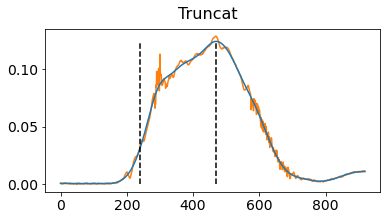


MLSi16F5mLHV7kV - Trial01 - Seg1
Avg. Pressure of zipping = 0.095 (bar), Max. P. = 0.129 (bar) in 0.125 (sec)

(919,)
0.15664795990311045
0.13249460967960136


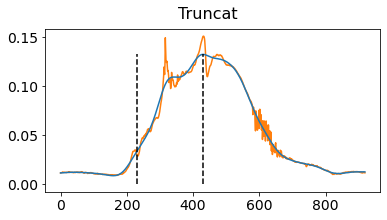


MLSi16F5mLHV7kV - Trial01 - Seg2
Avg. Pressure of zipping = 0.094 (bar), Max. P. = 0.151 (bar) in 0.109 (sec)

(921,)
0.13894217985661006
0.11403526063016356


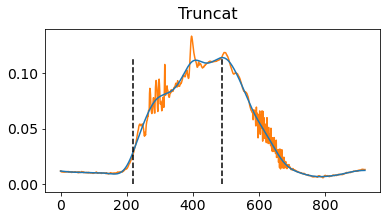


MLSi16F5mLHV7kV - Trial01 - Seg3
Avg. Pressure of zipping = 0.088 (bar), Max. P. = 0.133 (bar) in 0.147 (sec)

(920,)
0.13180533916757683
0.11562675769787949


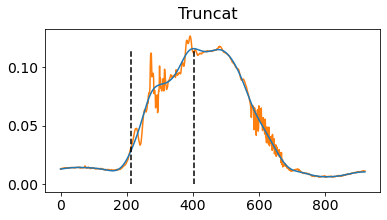


MLSi16F5mLHV7kV - Trial01 - Seg4
Avg. Pressure of zipping = 0.082 (bar), Max. P. = 0.126 (bar) in 0.102 (sec)

(920,)
0.13233458802766243
0.1138630397896099


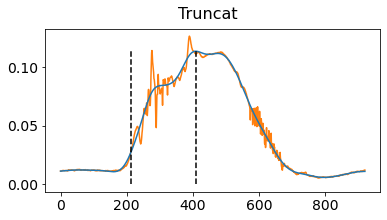


MLSi16F5mLHV7kV - Trial01 - Seg5
Avg. Pressure of zipping = 0.081 (bar), Max. P. = 0.127 (bar) in 0.105 (sec)

(920,)
0.13432328071404473
0.11529882640462166


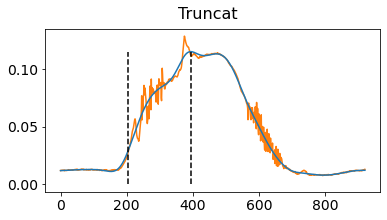


MLSi16F5mLHV7kV - Trial01 - Seg6
Avg. Pressure of zipping = 0.081 (bar), Max. P. = 0.129 (bar) in 0.103 (sec)

(920,)
0.13871765003717978
0.1144048373361087


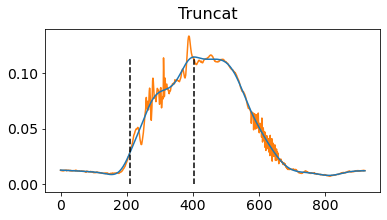


MLSi16F5mLHV7kV - Trial01 - Seg7
Avg. Pressure of zipping = 0.080 (bar), Max. P. = 0.133 (bar) in 0.105 (sec)

(920,)
0.13262326922407278
0.11477408514064147


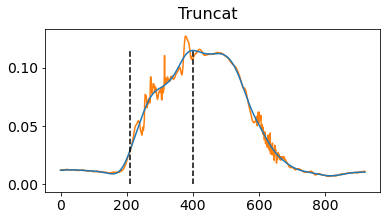


MLSi16F5mLHV7kV - Trial01 - Seg8
Avg. Pressure of zipping = 0.081 (bar), Max. P. = 0.127 (bar) in 0.103 (sec)

(920,)
0.13344119928056872
0.11427517015229477


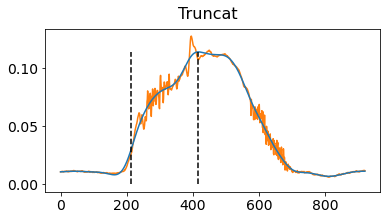


MLSi16F5mLHV7kV - Trial01 - Seg9
Avg. Pressure of zipping = 0.081 (bar), Max. P. = 0.128 (bar) in 0.111 (sec)

(920,)
0.13640820046589713
0.115676740502438


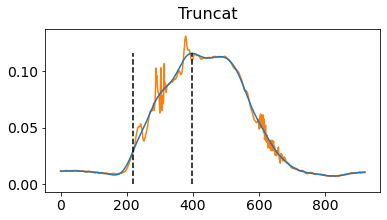


MLSi16F5mLHV7kV - Trial01 - Seg10
Avg. Pressure of zipping = 0.080 (bar), Max. P. = 0.131 (bar) in 0.097 (sec)

(920,)
0.13539781627846098
0.11387476478476811


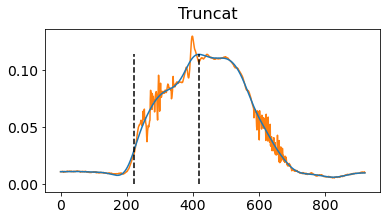


MLSi16F5mLHV7kV - Trial01 - Seg11
Avg. Pressure of zipping = 0.080 (bar), Max. P. = 0.130 (bar) in 0.107 (sec)

(920,)
0.13432328071404473
0.11416482341713304


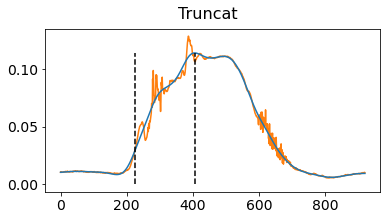


MLSi16F5mLHV7kV - Trial01 - Seg12
Avg. Pressure of zipping = 0.080 (bar), Max. P. = 0.129 (bar) in 0.098 (sec)

(920,)
0.1290949434901687
0.1130904781079105


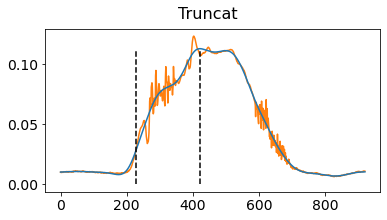


MLSi16F5mLHV7kV - Trial01 - Seg13
Avg. Pressure of zipping = 0.080 (bar), Max. P. = 0.124 (bar) in 0.105 (sec)

(920,)
0.12914305702290377
0.11572012052216205


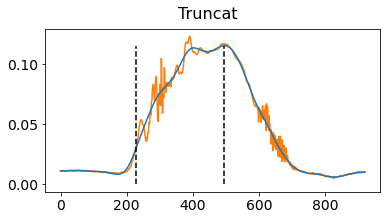


MLSi16F5mLHV7kV - Trial01 - Seg14
Avg. Pressure of zipping = 0.091 (bar), Max. P. = 0.124 (bar) in 0.146 (sec)

(920,)
0.1279722943930174
0.11584457188251725


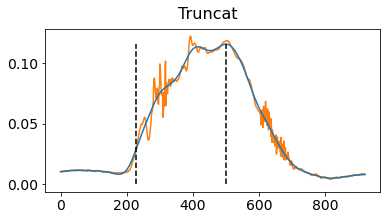


MLSi16F5mLHV7kV - Trial01 - Seg15
Avg. Pressure of zipping = 0.089 (bar), Max. P. = 0.122 (bar) in 0.148 (sec)

(920,)
0.12692983451709122
0.11617342659400728


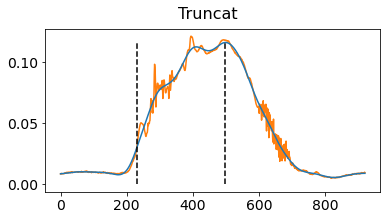


MLSi16F5mLHV7kV - Trial01 - Seg16
Avg. Pressure of zipping = 0.090 (bar), Max. P. = 0.121 (bar) in 0.146 (sec)

(920,)
0.12877418660526835
0.11297113288192051


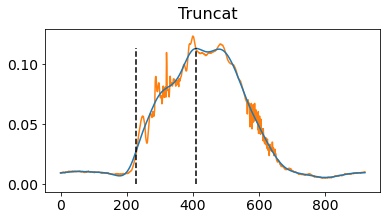


MLSi16F5mLHV7kV - Trial01 - Seg17
Avg. Pressure of zipping = 0.078 (bar), Max. P. = 0.123 (bar) in 0.098 (sec)

(920,)
0.12744304553293181
0.11787166972899164


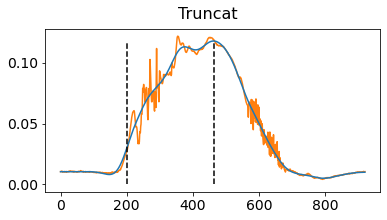


MLSi16F5mLHV7kV - Trial01 - Seg18
Avg. Pressure of zipping = 0.090 (bar), Max. P. = 0.122 (bar) in 0.142 (sec)

(920,)
0.12405906039723291
0.11667778012426723


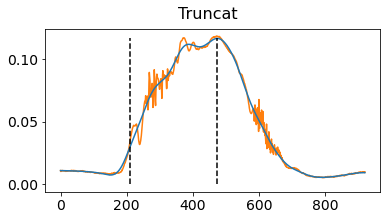


MLSi16F5mLHV7kV - Trial01 - Seg19
Avg. Pressure of zipping = 0.089 (bar), Max. P. = 0.119 (bar) in 0.143 (sec)

(920,)
0.12250338950546612
0.11257870445382538


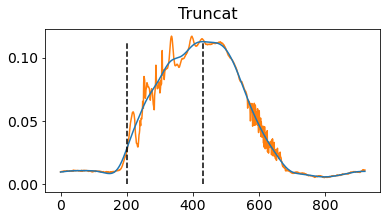


MLSi16F5mLHV7kV - Trial01 - Seg20
Avg. Pressure of zipping = 0.083 (bar), Max. P. = 0.117 (bar) in 0.124 (sec)

(919,)
0.14572618797225287
0.11440828711860053


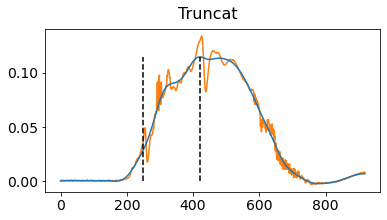


MLSi16F6mLHV7kV - Trial01 - Seg1
Avg. Pressure of zipping = 0.083 (bar), Max. P. = 0.133 (bar) in 0.092 (sec)

(919,)
0.1505375412457584
0.11241989915633037


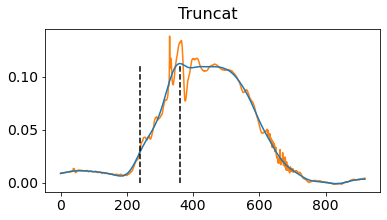


MLSi16F6mLHV7kV - Trial01 - Seg2
Avg. Pressure of zipping = 0.071 (bar), Max. P. = 0.138 (bar) in 0.066 (sec)

(921,)
0.13251100431435764
0.10326183269497312


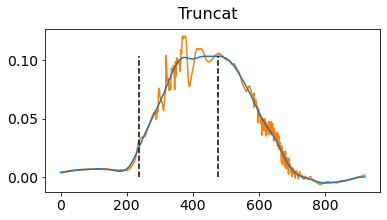


MLSi16F6mLHV7kV - Trial01 - Seg3
Avg. Pressure of zipping = 0.083 (bar), Max. P. = 0.120 (bar) in 0.129 (sec)

(920,)
0.14870922700182632
0.10870024154573261


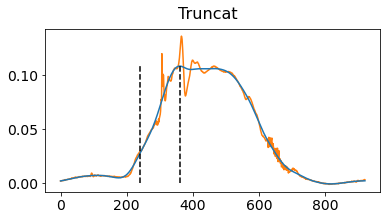


MLSi16F6mLHV7kV - Trial01 - Seg4
Avg. Pressure of zipping = 0.071 (bar), Max. P. = 0.136 (bar) in 0.066 (sec)

(920,)
0.13121193893051114
0.10776056257482121


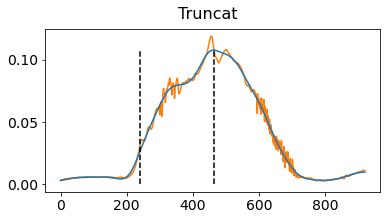


MLSi16F6mLHV7kV - Trial01 - Seg5
Avg. Pressure of zipping = 0.076 (bar), Max. P. = 0.119 (bar) in 0.120 (sec)

(920,)
0.14423466845746616
0.09871369652253464


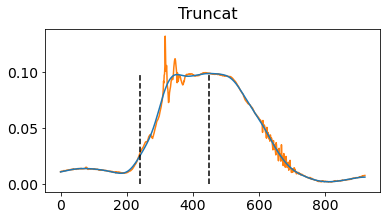


MLSi16F6mLHV7kV - Trial01 - Seg6
Avg. Pressure of zipping = 0.080 (bar), Max. P. = 0.132 (bar) in 0.114 (sec)

(920,)
0.12434774159364324
0.09599621419578779


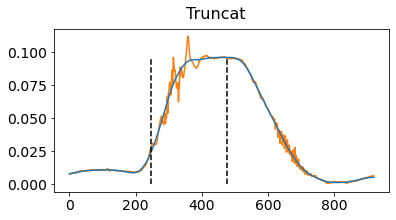


MLSi16F6mLHV7kV - Trial01 - Seg7
Avg. Pressure of zipping = 0.080 (bar), Max. P. = 0.112 (bar) in 0.126 (sec)

(920,)
0.13332893437085358
0.11295793536209515


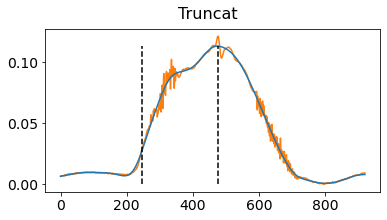


MLSi16F6mLHV7kV - Trial01 - Seg8
Avg. Pressure of zipping = 0.085 (bar), Max. P. = 0.121 (bar) in 0.123 (sec)

(920,)
0.13150062012692149
0.09439162435722355


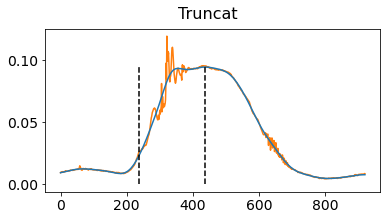


MLSi16F6mLHV7kV - Trial01 - Seg9
Avg. Pressure of zipping = 0.075 (bar), Max. P. = 0.119 (bar) in 0.108 (sec)

(920,)
0.13236666371615247
0.11245920945043578


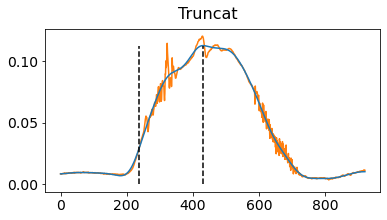


MLSi16F6mLHV7kV - Trial01 - Seg10
Avg. Pressure of zipping = 0.083 (bar), Max. P. = 0.120 (bar) in 0.106 (sec)

(920,)
0.13451573484498497
0.11070939799275893


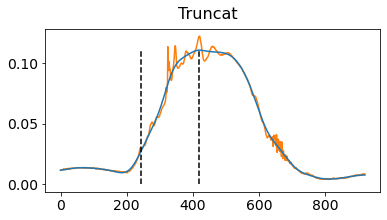


MLSi16F6mLHV7kV - Trial01 - Seg11
Avg. Pressure of zipping = 0.080 (bar), Max. P. = 0.122 (bar) in 0.095 (sec)

(920,)
0.13034589534128016
0.11042448749796409


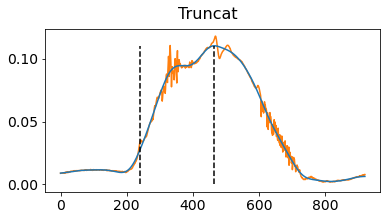


MLSi16F6mLHV7kV - Trial01 - Seg12
Avg. Pressure of zipping = 0.083 (bar), Max. P. = 0.118 (bar) in 0.122 (sec)

(920,)
0.1303940088740152
0.10982769585148995


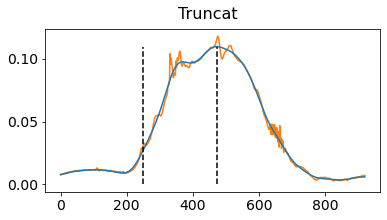


MLSi16F6mLHV7kV - Trial01 - Seg13
Avg. Pressure of zipping = 0.082 (bar), Max. P. = 0.118 (bar) in 0.120 (sec)

(920,)
0.12397887117600782
0.10311164477270204


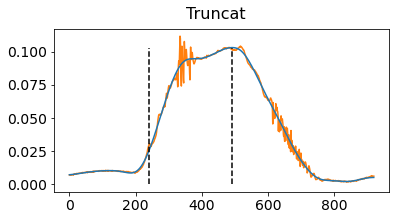


MLSi16F6mLHV7kV - Trial01 - Seg14
Avg. Pressure of zipping = 0.083 (bar), Max. P. = 0.112 (bar) in 0.136 (sec)

(920,)
0.12877418660526835
0.098465541064412


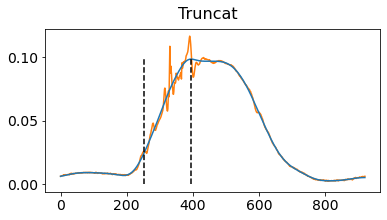


MLSi16F6mLHV7kV - Trial01 - Seg15
Avg. Pressure of zipping = 0.068 (bar), Max. P. = 0.117 (bar) in 0.077 (sec)

(920,)
0.11767599838771556
0.09802715734783427


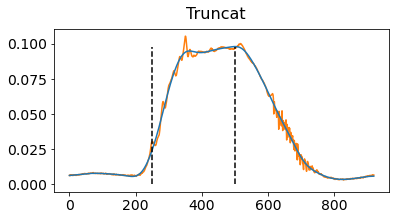


MLSi16F6mLHV7kV - Trial01 - Seg16
Avg. Pressure of zipping = 0.083 (bar), Max. P. = 0.105 (bar) in 0.136 (sec)

(920,)
0.12120432412161962
0.09439078623084994


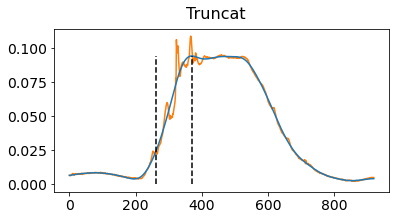


MLSi16F6mLHV7kV - Trial01 - Seg17
Avg. Pressure of zipping = 0.065 (bar), Max. P. = 0.109 (bar) in 0.060 (sec)

(920,)
0.11382691576891112
0.09405084128928308


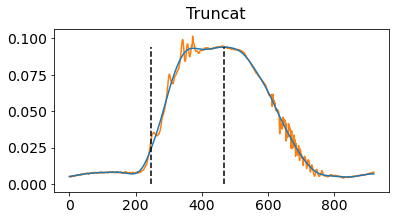


MLSi16F6mLHV7kV - Trial01 - Seg18
Avg. Pressure of zipping = 0.078 (bar), Max. P. = 0.102 (bar) in 0.120 (sec)

(920,)
0.11844581491147645
0.09605820080566926


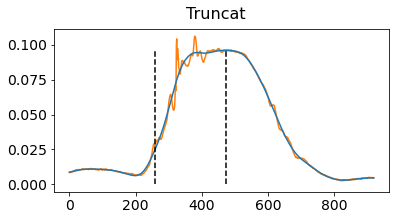


MLSi16F6mLHV7kV - Trial01 - Seg19
Avg. Pressure of zipping = 0.078 (bar), Max. P. = 0.106 (bar) in 0.117 (sec)

(920,)
0.11551088941463807
0.09883278291666504


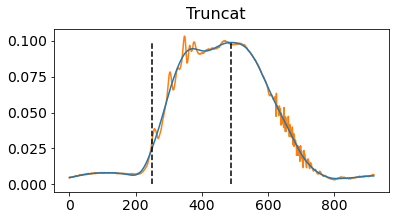


MLSi16F6mLHV7kV - Trial01 - Seg20
Avg. Pressure of zipping = 0.081 (bar), Max. P. = 0.103 (bar) in 0.130 (sec)

(919,)
0.1369855628587178
0.10139043102754661


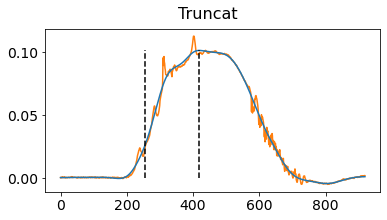


MLSi16F7mLHV7kV - Trial01 - Seg1
Avg. Pressure of zipping = 0.077 (bar), Max. P. = 0.113 (bar) in 0.090 (sec)

(919,)
0.14801959969929052
0.11269497381208776


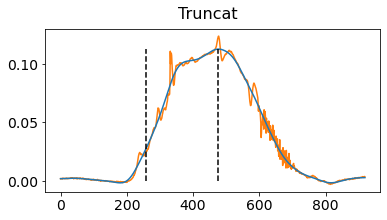


MLSi16F7mLHV7kV - Trial01 - Seg2
Avg. Pressure of zipping = 0.087 (bar), Max. P. = 0.124 (bar) in 0.118 (sec)

(921,)
0.14043369937139677
0.10230251648814911


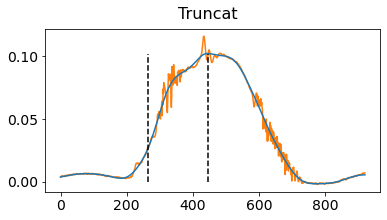


MLSi16F7mLHV7kV - Trial01 - Seg3
Avg. Pressure of zipping = 0.077 (bar), Max. P. = 0.116 (bar) in 0.099 (sec)

(920,)
0.1455818473740477
0.11594235645154935


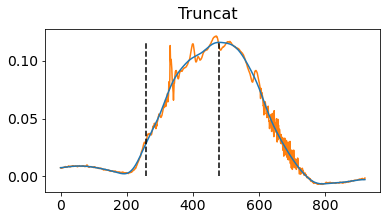


MLSi16F7mLHV7kV - Trial01 - Seg4
Avg. Pressure of zipping = 0.086 (bar), Max. P. = 0.121 (bar) in 0.120 (sec)

(920,)
0.1474903508392049
0.10886225025814122


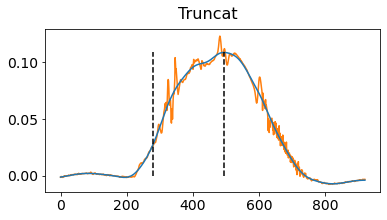


MLSi16F7mLHV7kV - Trial01 - Seg5
Avg. Pressure of zipping = 0.083 (bar), Max. P. = 0.123 (bar) in 0.116 (sec)

(920,)
0.1583319335488374
0.11728454874971767


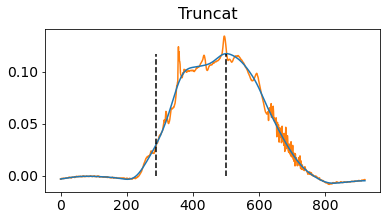


MLSi16F7mLHV7kV - Trial01 - Seg6
Avg. Pressure of zipping = 0.091 (bar), Max. P. = 0.134 (bar) in 0.116 (sec)

(920,)
0.13765915231700857
0.09897068794075883


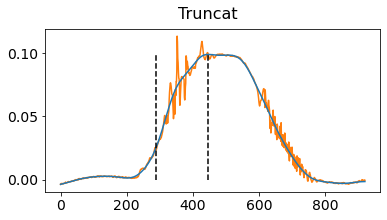


MLSi16F7mLHV7kV - Trial01 - Seg7
Avg. Pressure of zipping = 0.073 (bar), Max. P. = 0.113 (bar) in 0.085 (sec)

(920,)
0.14208559732863368
0.11159755340679278


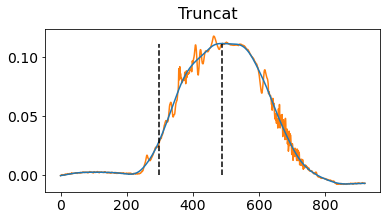


MLSi16F7mLHV7kV - Trial01 - Seg8
Avg. Pressure of zipping = 0.083 (bar), Max. P. = 0.118 (bar) in 0.103 (sec)

(920,)
0.13565442178638126
0.1045279588977123


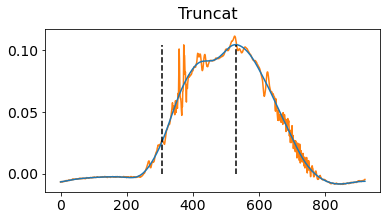


MLSi16F7mLHV7kV - Trial01 - Seg9
Avg. Pressure of zipping = 0.080 (bar), Max. P. = 0.111 (bar) in 0.121 (sec)

(920,)
0.15368095871778203
0.1079154127074407


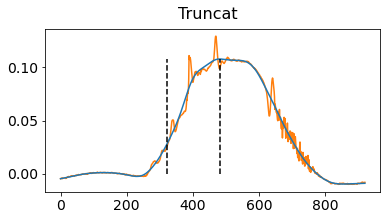


MLSi16F7mLHV7kV - Trial01 - Seg10
Avg. Pressure of zipping = 0.080 (bar), Max. P. = 0.129 (bar) in 0.087 (sec)

(920,)
0.1446356145635916
0.10818276742098748


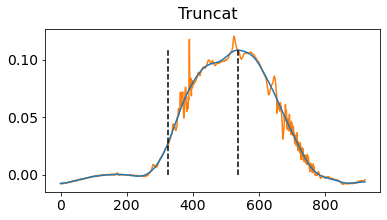


MLSi16F7mLHV7kV - Trial01 - Seg11
Avg. Pressure of zipping = 0.083 (bar), Max. P. = 0.120 (bar) in 0.115 (sec)

(920,)
0.13887802847963
0.10410503869723325


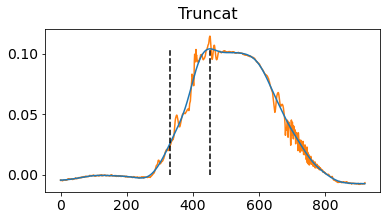


MLSi16F7mLHV7kV - Trial01 - Seg12
Avg. Pressure of zipping = 0.069 (bar), Max. P. = 0.115 (bar) in 0.065 (sec)

(920,)
0.13703367639145286
0.11057463061007397


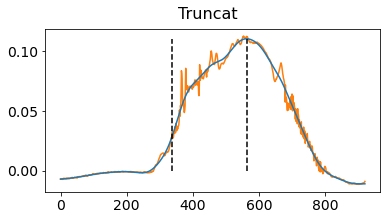


MLSi16F7mLHV7kV - Trial01 - Seg13
Avg. Pressure of zipping = 0.082 (bar), Max. P. = 0.113 (bar) in 0.123 (sec)

(920,)
0.1430478679833348
0.11090186074116976


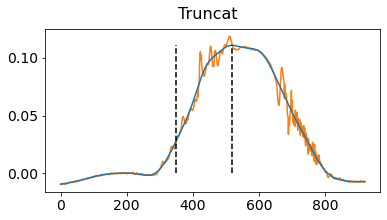


MLSi16F7mLHV7kV - Trial01 - Seg14
Avg. Pressure of zipping = 0.080 (bar), Max. P. = 0.119 (bar) in 0.091 (sec)

(920,)
0.14830828089570083
0.10815538590246518


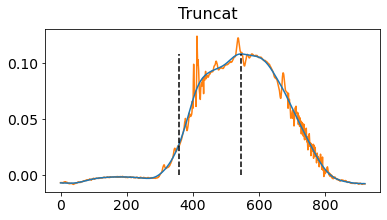


MLSi16F7mLHV7kV - Trial01 - Seg15
Avg. Pressure of zipping = 0.084 (bar), Max. P. = 0.124 (bar) in 0.102 (sec)

(920,)
0.1508743359749038
0.10877466225339386


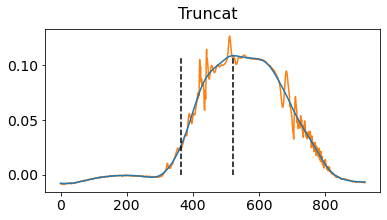


MLSi16F7mLHV7kV - Trial01 - Seg16
Avg. Pressure of zipping = 0.081 (bar), Max. P. = 0.127 (bar) in 0.085 (sec)

(920,)
0.12030620484389859
0.0912737743141353


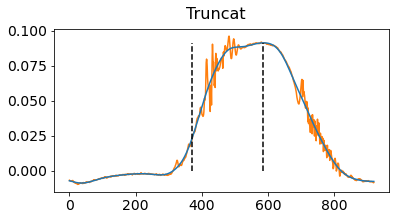


MLSi16F7mLHV7kV - Trial01 - Seg17
Avg. Pressure of zipping = 0.074 (bar), Max. P. = 0.096 (bar) in 0.117 (sec)

(920,)
0.1457582636607429
0.10699197100064758


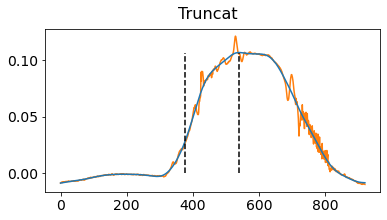


MLSi16F7mLHV7kV - Trial01 - Seg18
Avg. Pressure of zipping = 0.082 (bar), Max. P. = 0.122 (bar) in 0.089 (sec)

(920,)
0.12184583789142037
0.09288872821079489


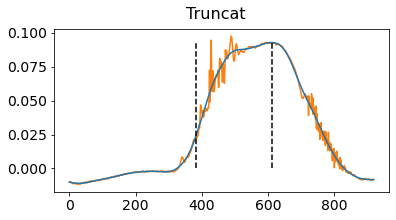


MLSi16F7mLHV7kV - Trial01 - Seg19
Avg. Pressure of zipping = 0.076 (bar), Max. P. = 0.098 (bar) in 0.124 (sec)

(920,)
0.14421863061322113
0.10766822630426273


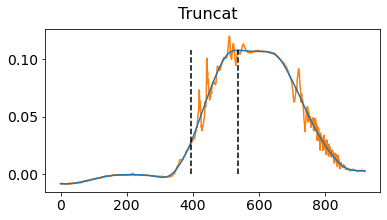


MLSi16F7mLHV7kV - Trial01 - Seg20
Avg. Pressure of zipping = 0.077 (bar), Max. P. = 0.120 (bar) in 0.078 (sec)

(919,)
0.15013659513963296
0.09160850075439547


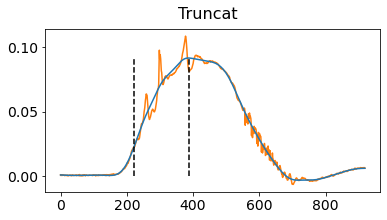


MLSi16F8mLHV7kV - Trial01 - Seg1
Avg. Pressure of zipping = 0.067 (bar), Max. P. = 0.109 (bar) in 0.089 (sec)

(919,)
0.14976772472199754
0.09954300327740767


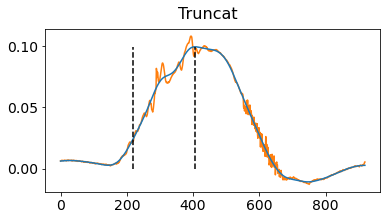


MLSi16F8mLHV7kV - Trial01 - Seg2
Avg. Pressure of zipping = 0.069 (bar), Max. P. = 0.108 (bar) in 0.101 (sec)

(921,)
0.14206955948438865
0.09151250476816108


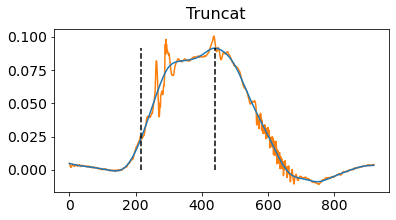


MLSi16F8mLHV7kV - Trial01 - Seg3
Avg. Pressure of zipping = 0.072 (bar), Max. P. = 0.101 (bar) in 0.122 (sec)

(920,)
0.13658461675259234
0.0876423903075185


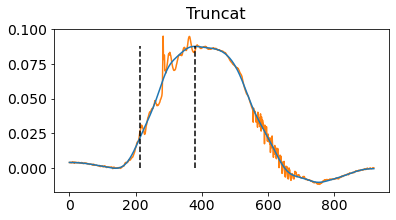


MLSi16F8mLHV7kV - Trial01 - Seg4
Avg. Pressure of zipping = 0.064 (bar), Max. P. = 0.095 (bar) in 0.090 (sec)

(920,)
0.13231855018341743
0.08361389215294415


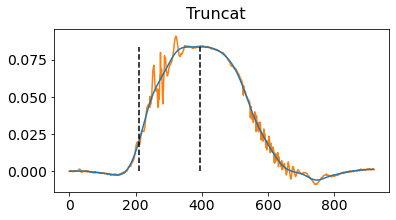


MLSi16F8mLHV7kV - Trial01 - Seg5
Avg. Pressure of zipping = 0.066 (bar), Max. P. = 0.091 (bar) in 0.100 (sec)

(920,)
0.14336862486823515
0.09174123292715758


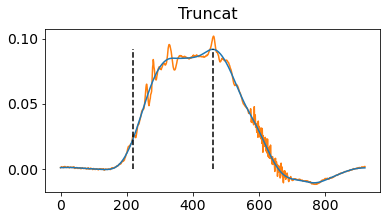


MLSi16F8mLHV7kV - Trial01 - Seg6
Avg. Pressure of zipping = 0.075 (bar), Max. P. = 0.102 (bar) in 0.131 (sec)

(920,)
0.14222993792683883
0.0840501806160773


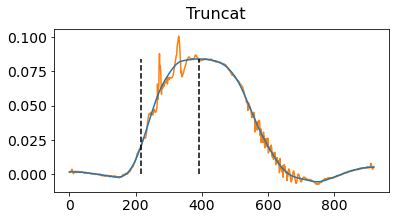


MLSi16F8mLHV7kV - Trial01 - Seg7
Avg. Pressure of zipping = 0.066 (bar), Max. P. = 0.101 (bar) in 0.094 (sec)

(920,)
0.1365685789083473
0.084623469305873


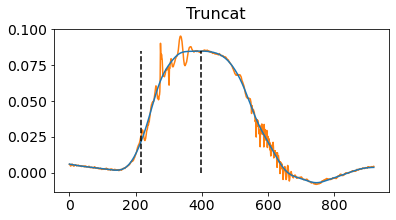


MLSi16F8mLHV7kV - Trial01 - Seg8
Avg. Pressure of zipping = 0.068 (bar), Max. P. = 0.095 (bar) in 0.098 (sec)

(920,)
0.1289826785804536
0.08352463646305444


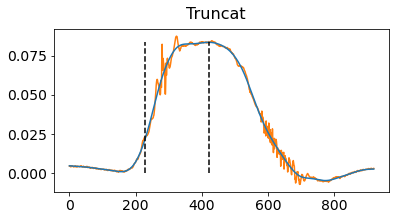


MLSi16F8mLHV7kV - Trial01 - Seg9
Avg. Pressure of zipping = 0.069 (bar), Max. P. = 0.087 (bar) in 0.105 (sec)

(920,)
0.1355100811881761
0.08439803374219887


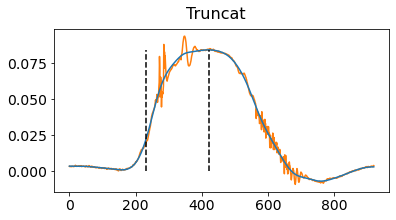


MLSi16F8mLHV7kV - Trial01 - Seg10
Avg. Pressure of zipping = 0.069 (bar), Max. P. = 0.094 (bar) in 0.103 (sec)

(920,)
0.14234220283655397
0.08332598054454673


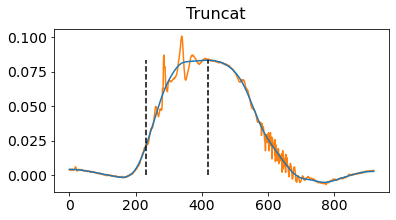


MLSi16F8mLHV7kV - Trial01 - Seg11
Avg. Pressure of zipping = 0.068 (bar), Max. P. = 0.101 (bar) in 0.101 (sec)

(920,)
0.1351732864590307
0.08364290991687612


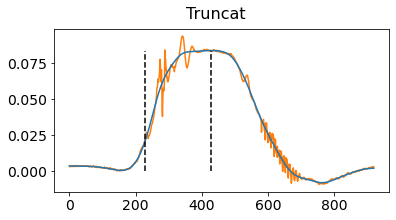


MLSi16F8mLHV7kV - Trial01 - Seg12
Avg. Pressure of zipping = 0.069 (bar), Max. P. = 0.094 (bar) in 0.107 (sec)

(920,)
0.1384770823735045
0.08268348609937443


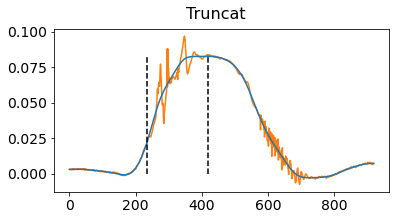


MLSi16F8mLHV7kV - Trial01 - Seg13
Avg. Pressure of zipping = 0.067 (bar), Max. P. = 0.097 (bar) in 0.101 (sec)

(920,)
0.13031381965279012
0.08429462937174709


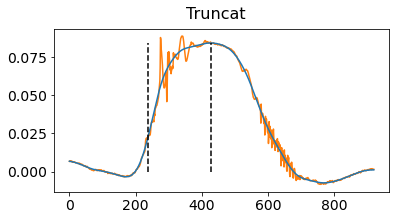


MLSi16F8mLHV7kV - Trial01 - Seg14
Avg. Pressure of zipping = 0.069 (bar), Max. P. = 0.089 (bar) in 0.103 (sec)

(920,)
0.13676103303928755
0.08577448492911668


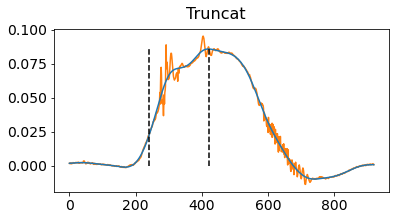


MLSi16F8mLHV7kV - Trial01 - Seg15
Avg. Pressure of zipping = 0.066 (bar), Max. P. = 0.095 (bar) in 0.098 (sec)

(920,)
0.14401013863803588
0.0929653578545408


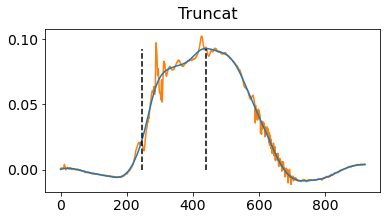


MLSi16F8mLHV7kV - Trial01 - Seg16
Avg. Pressure of zipping = 0.073 (bar), Max. P. = 0.102 (bar) in 0.104 (sec)

(920,)
0.142358240680799
0.0834896413083305


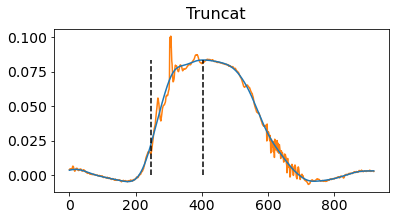


MLSi16F8mLHV7kV - Trial01 - Seg17
Avg. Pressure of zipping = 0.068 (bar), Max. P. = 0.101 (bar) in 0.086 (sec)

(920,)
0.14200540810740858
0.09189118144241348


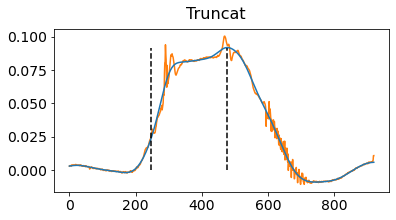


MLSi16F8mLHV7kV - Trial01 - Seg18
Avg. Pressure of zipping = 0.075 (bar), Max. P. = 0.100 (bar) in 0.126 (sec)

(920,)
0.14256673265598424
0.08992553254957547


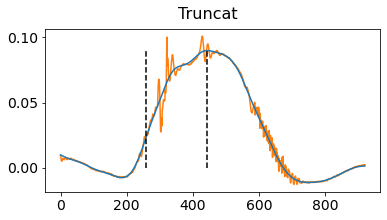


MLSi16F8mLHV7kV - Trial01 - Seg19
Avg. Pressure of zipping = 0.069 (bar), Max. P. = 0.101 (bar) in 0.101 (sec)

(920,)
0.143240322114275
0.08999887879297891


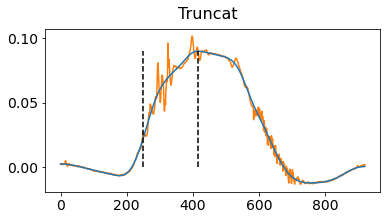


MLSi16F8mLHV7kV - Trial01 - Seg20
Avg. Pressure of zipping = 0.068 (bar), Max. P. = 0.102 (bar) in 0.090 (sec)

(919,)
0.15966307462117393
0.0747440907626988


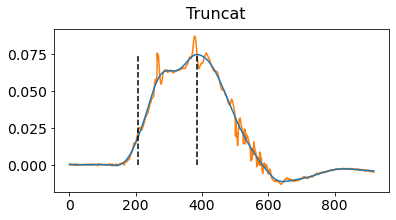


MLSi16F9mLHV7kV - Trial01 - Seg1
Avg. Pressure of zipping = 0.058 (bar), Max. P. = 0.087 (bar) in 0.097 (sec)

(919,)
0.16036873976795474
0.07307527697740984


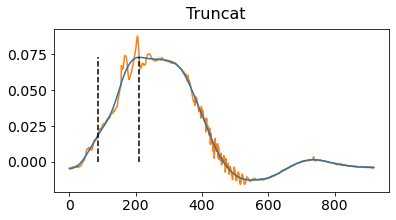


MLSi16F9mLHV7kV - Trial01 - Seg2
Avg. Pressure of zipping = 0.049 (bar), Max. P. = 0.088 (bar) in 0.068 (sec)

(921,)
0.15762626840205657
0.07153485696911199


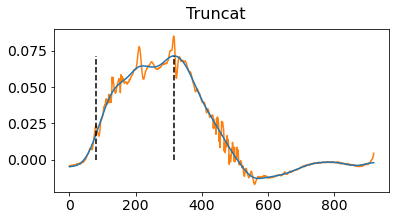


MLSi16F9mLHV7kV - Trial01 - Seg3
Avg. Pressure of zipping = 0.056 (bar), Max. P. = 0.085 (bar) in 0.128 (sec)

(920,)
0.14814790245325066
0.067443527349236


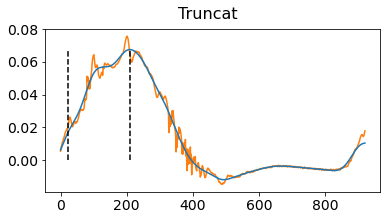


MLSi16F9mLHV7kV - Trial01 - Seg4
Avg. Pressure of zipping = 0.049 (bar), Max. P. = 0.076 (bar) in 0.101 (sec)

(920,)
0.16044892898917984
0.07331630475557979


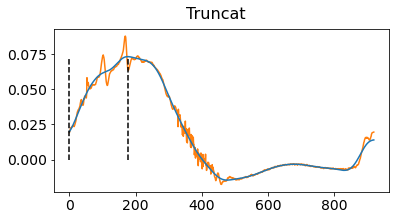


MLSi16F9mLHV7kV - Trial01 - Seg5
Avg. Pressure of zipping = 0.055 (bar), Max. P. = 0.088 (bar) in 0.096 (sec)

(920,)
0.1537451100947621
0.06864419791596665


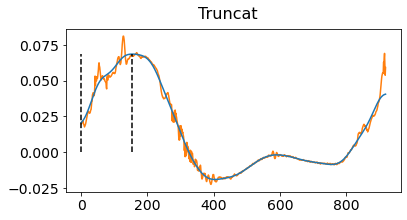


MLSi16F9mLHV7kV - Trial01 - Seg6
Avg. Pressure of zipping = 0.051 (bar), Max. P. = 0.081 (bar) in 0.084 (sec)

(920,)
0.15005640591840785
0.07025315884303546


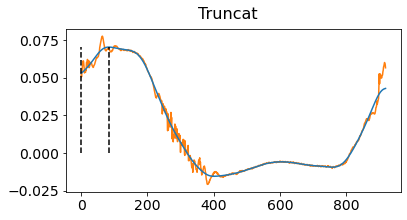


MLSi16F9mLHV7kV - Trial01 - Seg7
Avg. Pressure of zipping = 0.063 (bar), Max. P. = 0.078 (bar) in 0.046 (sec)

(920,)
0.1487894162230514
0.06567953848122765


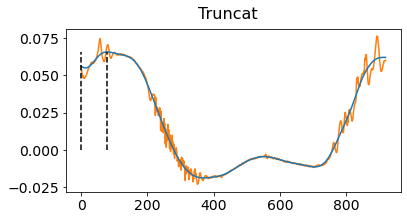


MLSi16F9mLHV7kV - Trial01 - Seg8
Avg. Pressure of zipping = 0.059 (bar), Max. P. = 0.076 (bar) in 0.043 (sec)

(920,)
0.13666480597381744
0.06166511020859697


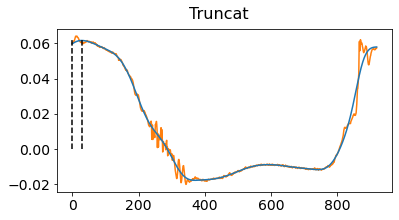


MLSi16F9mLHV7kV - Trial01 - Seg9
Avg. Pressure of zipping = 0.062 (bar), Max. P. = 0.064 (bar) in 0.016 (sec)

(920,)
0.1534724667425968
0.06535280093975779


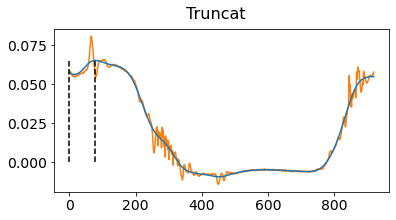


MLSi16F9mLHV7kV - Trial01 - Seg10
Avg. Pressure of zipping = 0.061 (bar), Max. P. = 0.081 (bar) in 0.042 (sec)

(920,)
0.1506979196882086
0.06584247531057119


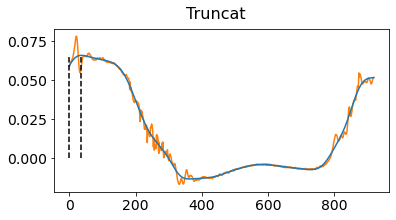


MLSi16F9mLHV7kV - Trial01 - Seg11
Avg. Pressure of zipping = 0.065 (bar), Max. P. = 0.078 (bar) in 0.020 (sec)

(920,)
0.14692902629062926
0.06142756732435872


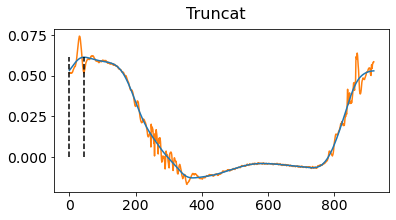


MLSi16F9mLHV7kV - Trial01 - Seg12
Avg. Pressure of zipping = 0.059 (bar), Max. P. = 0.074 (bar) in 0.024 (sec)

(920,)
0.1479233726338204
0.06303358144674528


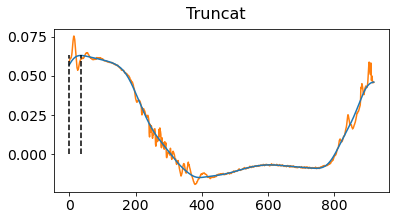


MLSi16F9mLHV7kV - Trial01 - Seg13
Avg. Pressure of zipping = 0.063 (bar), Max. P. = 0.075 (bar) in 0.018 (sec)

(920,)
0.14664034509421892
0.060453725318526885


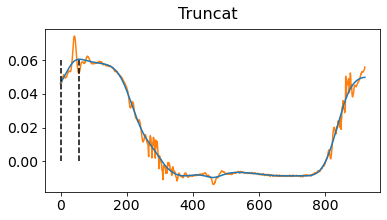


MLSi16F9mLHV7kV - Trial01 - Seg14
Avg. Pressure of zipping = 0.056 (bar), Max. P. = 0.074 (bar) in 0.031 (sec)

(920,)
0.14336862486823515
0.06114964238452483


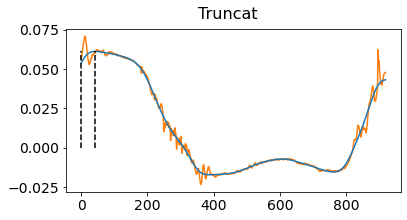


MLSi16F9mLHV7kV - Trial01 - Seg15
Avg. Pressure of zipping = 0.061 (bar), Max. P. = 0.071 (bar) in 0.023 (sec)

(920,)
0.14821205383023073
0.05818075961745145


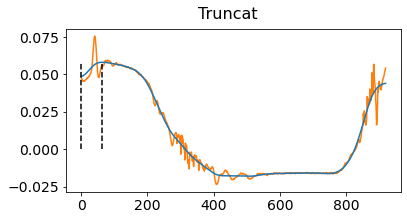


MLSi16F9mLHV7kV - Trial01 - Seg16
Avg. Pressure of zipping = 0.054 (bar), Max. P. = 0.076 (bar) in 0.035 (sec)

(920,)
0.13456384837772
0.05416136547295655


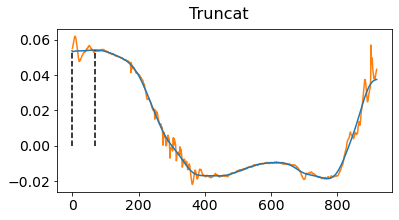


MLSi16F9mLHV7kV - Trial01 - Seg17
Avg. Pressure of zipping = 0.054 (bar), Max. P. = 0.062 (bar) in 0.037 (sec)

(920,)
0.14299975445059973
0.05607657155172635


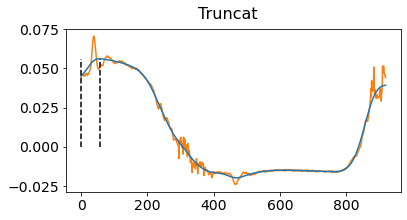


MLSi16F9mLHV7kV - Trial01 - Seg18
Avg. Pressure of zipping = 0.052 (bar), Max. P. = 0.070 (bar) in 0.030 (sec)

(920,)
0.1365685789083473
0.052600405411372675


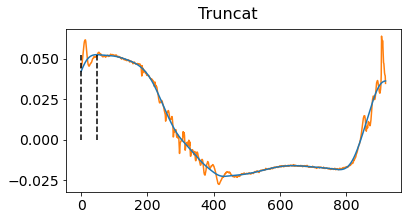


MLSi16F9mLHV7kV - Trial01 - Seg19
Avg. Pressure of zipping = 0.051 (bar), Max. P. = 0.064 (bar) in 0.026 (sec)

(920,)
0.14562996090678276
0.05777912517353376


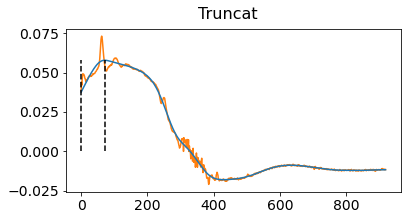


MLSi16F9mLHV7kV - Trial01 - Seg20
Avg. Pressure of zipping = 0.052 (bar), Max. P. = 0.073 (bar) in 0.039 (sec)

(919,)
0.16426593591949423
0.06562490683997156


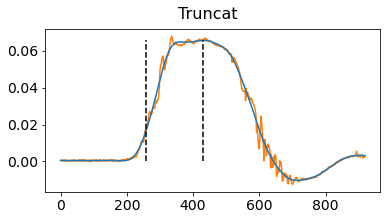


MLSi16F10mLHV7kV - Trial01 - Seg1
Avg. Pressure of zipping = 0.054 (bar), Max. P. = 0.068 (bar) in 0.093 (sec)

(919,)
0.14720166964279457
0.04958269530121061


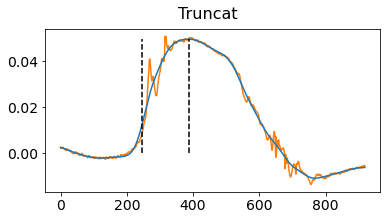


MLSi16F10mLHV7kV - Trial01 - Seg2
Avg. Pressure of zipping = 0.039 (bar), Max. P. = 0.051 (bar) in 0.076 (sec)

(921,)
0.14875734053456136
0.051495893933041145


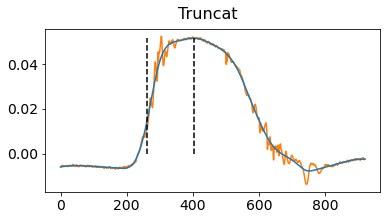


MLSi16F10mLHV7kV - Trial01 - Seg3
Avg. Pressure of zipping = 0.043 (bar), Max. P. = 0.052 (bar) in 0.077 (sec)

(920,)
0.1664150070483267
0.06356374562171478


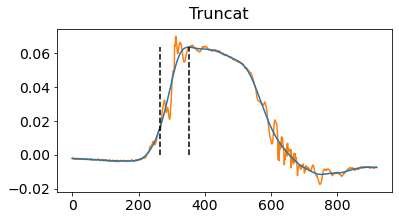


MLSi16F10mLHV7kV - Trial01 - Seg4
Avg. Pressure of zipping = 0.046 (bar), Max. P. = 0.070 (bar) in 0.047 (sec)

(920,)
0.16864426739838428
0.06220907587515977


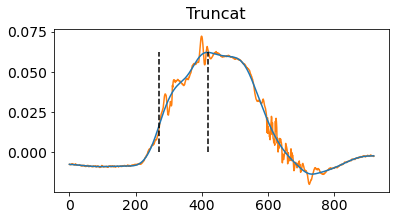


MLSi16F10mLHV7kV - Trial01 - Seg5
Avg. Pressure of zipping = 0.045 (bar), Max. P. = 0.072 (bar) in 0.080 (sec)

(920,)
0.13770726584974363
0.04039328603027491


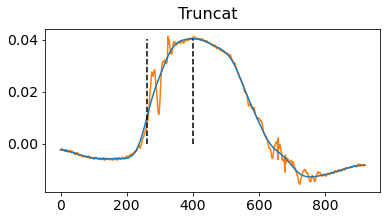


MLSi16F10mLHV7kV - Trial01 - Seg6
Avg. Pressure of zipping = 0.032 (bar), Max. P. = 0.041 (bar) in 0.076 (sec)

(920,)
0.14173276475524327
0.044633882764346336


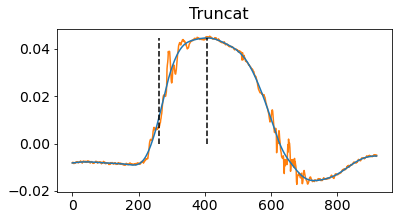


MLSi16F10mLHV7kV - Trial01 - Seg7
Avg. Pressure of zipping = 0.036 (bar), Max. P. = 0.045 (bar) in 0.079 (sec)

(920,)
0.1583479713930824
0.058938255064887854


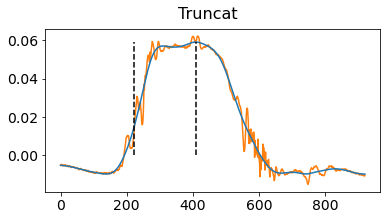


MLSi16F10mLHV7kV - Trial01 - Seg8
Avg. Pressure of zipping = 0.050 (bar), Max. P. = 0.062 (bar) in 0.101 (sec)

(920,)
0.1601442099485245
0.06091877914413725


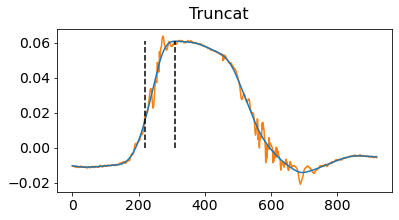


MLSi16F10mLHV7kV - Trial01 - Seg9
Avg. Pressure of zipping = 0.045 (bar), Max. P. = 0.064 (bar) in 0.050 (sec)

(920,)
0.13692141148173773
0.03927040793663848


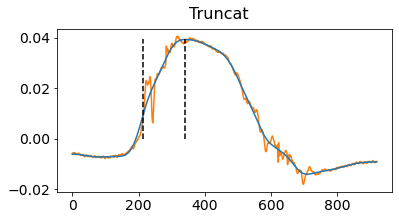


MLSi16F10mLHV7kV - Trial01 - Seg10
Avg. Pressure of zipping = 0.029 (bar), Max. P. = 0.041 (bar) in 0.068 (sec)

(920,)
0.14295164091786466
0.04220174098847686


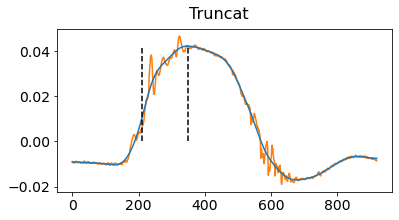


MLSi16F10mLHV7kV - Trial01 - Seg11
Avg. Pressure of zipping = 0.033 (bar), Max. P. = 0.047 (bar) in 0.074 (sec)

(920,)
0.15820363079487723
0.06027026332671985


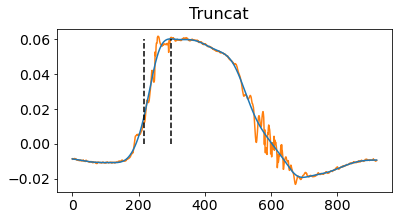


MLSi16F10mLHV7kV - Trial01 - Seg12
Avg. Pressure of zipping = 0.045 (bar), Max. P. = 0.062 (bar) in 0.044 (sec)

(920,)
0.15809136588516212
0.05976185449892803


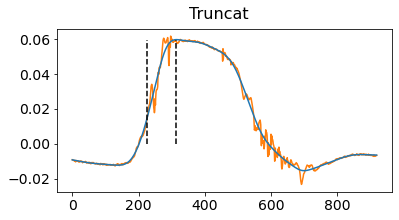


MLSi16F10mLHV7kV - Trial01 - Seg13
Avg. Pressure of zipping = 0.044 (bar), Max. P. = 0.062 (bar) in 0.047 (sec)

(920,)
0.15289510434977613
0.05442714387102253


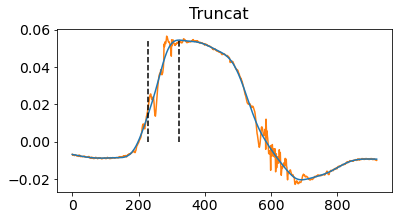


MLSi16F10mLHV7kV - Trial01 - Seg14
Avg. Pressure of zipping = 0.039 (bar), Max. P. = 0.057 (bar) in 0.051 (sec)

(920,)
0.1629508326914027
0.05098291214486976


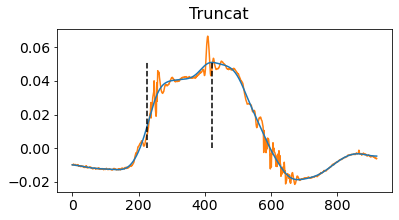


MLSi16F10mLHV7kV - Trial01 - Seg15
Avg. Pressure of zipping = 0.040 (bar), Max. P. = 0.067 (bar) in 0.107 (sec)

(920,)
0.1398402991343311
0.039685922305204055


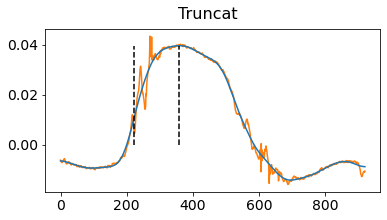


MLSi16F10mLHV7kV - Trial01 - Seg16
Avg. Pressure of zipping = 0.032 (bar), Max. P. = 0.044 (bar) in 0.075 (sec)

(920,)
0.15334416398863665
0.0549368839047507


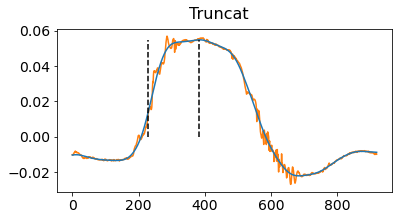


MLSi16F10mLHV7kV - Trial01 - Seg17
Avg. Pressure of zipping = 0.047 (bar), Max. P. = 0.057 (bar) in 0.084 (sec)

(920,)
0.16534047148391046
0.0598042503463352


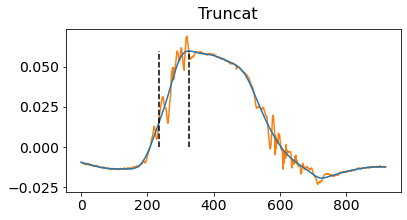


MLSi16F10mLHV7kV - Trial01 - Seg18
Avg. Pressure of zipping = 0.043 (bar), Max. P. = 0.069 (bar) in 0.049 (sec)

(920,)
0.16306309760111784
0.05821201361677007


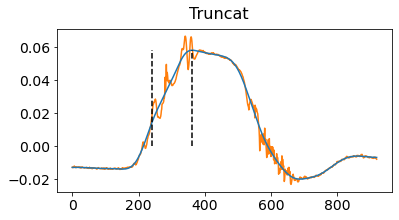


MLSi16F10mLHV7kV - Trial01 - Seg19
Avg. Pressure of zipping = 0.041 (bar), Max. P. = 0.067 (bar) in 0.066 (sec)

(920,)
0.1368091465720226
0.03685132655101801


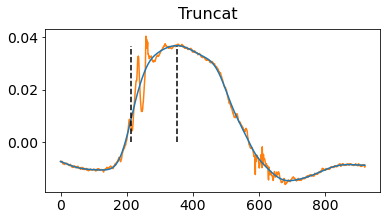


MLSi16F10mLHV7kV - Trial01 - Seg20
Avg. Pressure of zipping = 0.030 (bar), Max. P. = 0.040 (bar) in 0.074 (sec)

(919,)
0.17730470329069425
0.04147720285191989


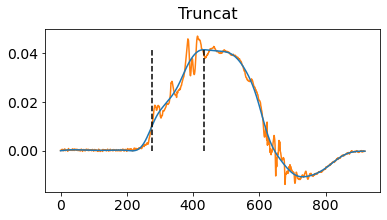


MLSi16F11mLHV7kV - Trial01 - Seg1
Avg. Pressure of zipping = 0.028 (bar), Max. P. = 0.047 (bar) in 0.084 (sec)

(919,)
0.1744178913265909
0.040574567274107826


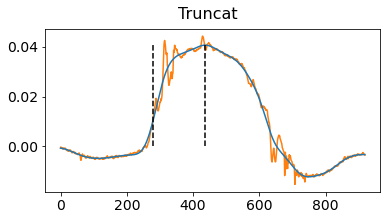


MLSi16F11mLHV7kV - Trial01 - Seg2
Avg. Pressure of zipping = 0.033 (bar), Max. P. = 0.044 (bar) in 0.085 (sec)

(921,)
0.17991887190263225
0.03986600960086378


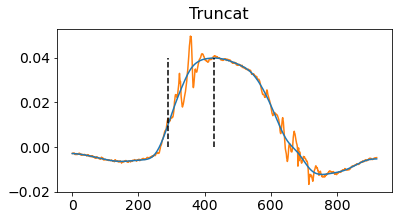


MLSi16F11mLHV7kV - Trial01 - Seg3
Avg. Pressure of zipping = 0.031 (bar), Max. P. = 0.050 (bar) in 0.076 (sec)

(920,)
0.1763905461687282
0.036861125297509206


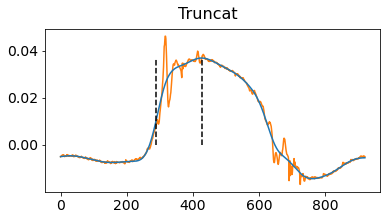


MLSi16F11mLHV7kV - Trial01 - Seg4
Avg. Pressure of zipping = 0.030 (bar), Max. P. = 0.046 (bar) in 0.076 (sec)

(920,)
0.17722451406946915
0.036062655097574864


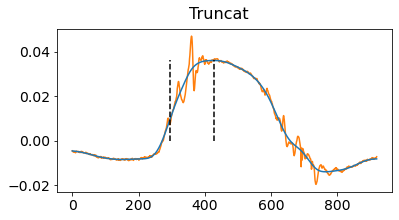


MLSi16F11mLHV7kV - Trial01 - Seg5
Avg. Pressure of zipping = 0.028 (bar), Max. P. = 0.047 (bar) in 0.072 (sec)

(920,)
0.16729708848180272
0.03266593767013887


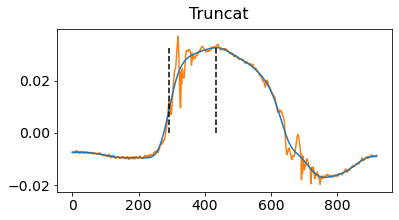


MLSi16F11mLHV7kV - Trial01 - Seg6
Avg. Pressure of zipping = 0.027 (bar), Max. P. = 0.037 (bar) in 0.077 (sec)

(920,)
0.17459430761328612
0.03266556882027022


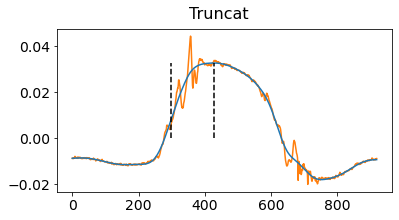


MLSi16F11mLHV7kV - Trial01 - Seg7
Avg. Pressure of zipping = 0.026 (bar), Max. P. = 0.044 (bar) in 0.070 (sec)

(920,)
0.16479518477957983
0.030539616347969922


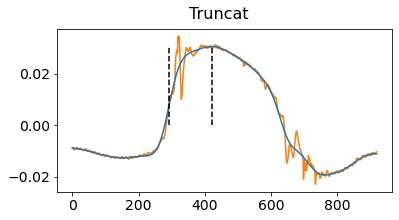


MLSi16F11mLHV7kV - Trial01 - Seg8
Avg. Pressure of zipping = 0.026 (bar), Max. P. = 0.035 (bar) in 0.070 (sec)

(920,)
0.1657093419015459
0.030981638983111126


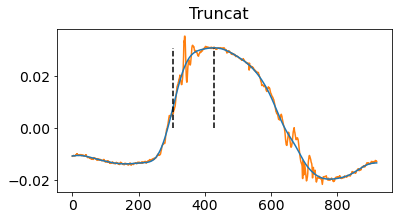


MLSi16F11mLHV7kV - Trial01 - Seg9
Avg. Pressure of zipping = 0.026 (bar), Max. P. = 0.035 (bar) in 0.067 (sec)

(920,)
0.1683235105134839
0.028376968524384066


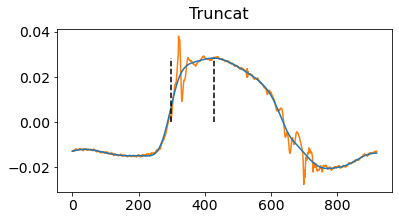


MLSi16F11mLHV7kV - Trial01 - Seg10
Avg. Pressure of zipping = 0.024 (bar), Max. P. = 0.038 (bar) in 0.070 (sec)

(920,)
0.1654527363936256
0.028124115732317656


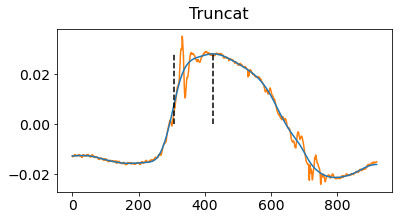


MLSi16F11mLHV7kV - Trial01 - Seg11
Avg. Pressure of zipping = 0.024 (bar), Max. P. = 0.035 (bar) in 0.065 (sec)

(920,)
0.16663953686775695
0.02657722142178634


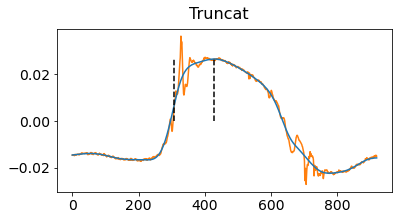


MLSi16F11mLHV7kV - Trial01 - Seg12
Avg. Pressure of zipping = 0.023 (bar), Max. P. = 0.036 (bar) in 0.066 (sec)

(920,)
0.16330366526479312
0.02633139481157859


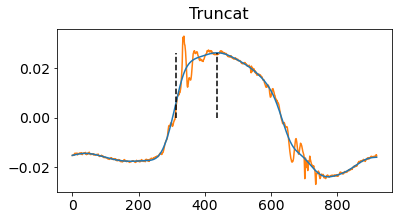


MLSi16F11mLHV7kV - Trial01 - Seg13
Avg. Pressure of zipping = 0.022 (bar), Max. P. = 0.033 (bar) in 0.067 (sec)

(920,)
0.16282252993744256
0.02540214965391191


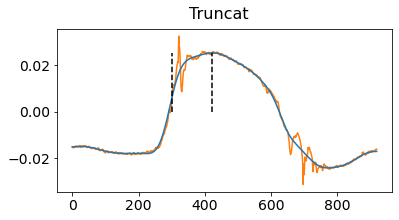


MLSi16F11mLHV7kV - Trial01 - Seg14
Avg. Pressure of zipping = 0.022 (bar), Max. P. = 0.033 (bar) in 0.066 (sec)

(920,)
0.1608659129395503
0.024156814238783297


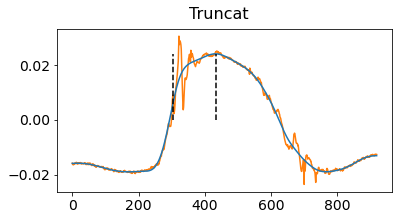


MLSi16F11mLHV7kV - Trial01 - Seg15
Avg. Pressure of zipping = 0.020 (bar), Max. P. = 0.031 (bar) in 0.070 (sec)

(920,)
0.15671211128009052
0.023456055064634884


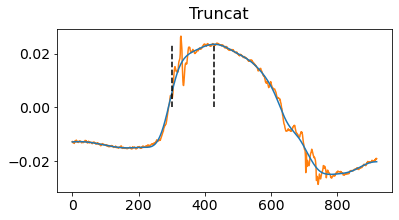


MLSi16F11mLHV7kV - Trial01 - Seg16
Avg. Pressure of zipping = 0.019 (bar), Max. P. = 0.026 (bar) in 0.069 (sec)

(920,)
0.16567726621305584
0.030339110923079782


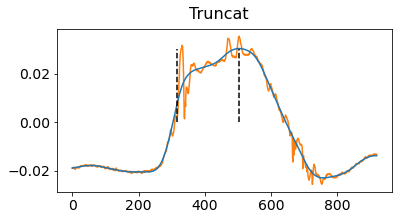


MLSi16F11mLHV7kV - Trial01 - Seg17
Avg. Pressure of zipping = 0.024 (bar), Max. P. = 0.035 (bar) in 0.102 (sec)

(920,)
0.17159523073946767
0.03258205709043918


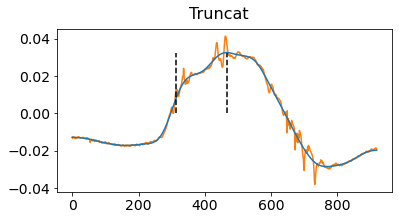


MLSi16F11mLHV7kV - Trial01 - Seg18
Avg. Pressure of zipping = 0.023 (bar), Max. P. = 0.041 (bar) in 0.083 (sec)

(920,)
0.17358392342584997
0.03394020555028632


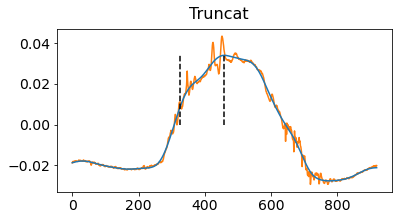


MLSi16F11mLHV7kV - Trial01 - Seg19
Avg. Pressure of zipping = 0.024 (bar), Max. P. = 0.043 (bar) in 0.072 (sec)

(920,)
0.17467449683451122
0.034571038677102345


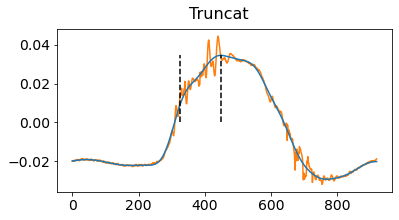


MLSi16F11mLHV7kV - Trial01 - Seg20
Avg. Pressure of zipping = 0.025 (bar), Max. P. = 0.044 (bar) in 0.067 (sec)

(919,)
0.17659903814391342
0.03606779487748324


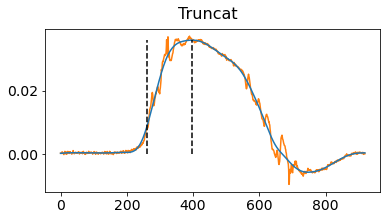


MLSi16F12mLHV7kV - Trial01 - Seg1
Avg. Pressure of zipping = 0.029 (bar), Max. P. = 0.037 (bar) in 0.073 (sec)

(919,)
0.17384052893377025
0.033529869957717784


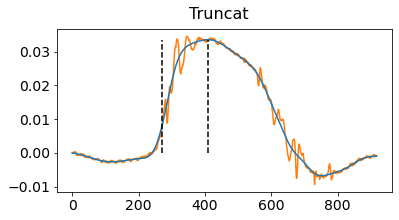


MLSi16F12mLHV7kV - Trial01 - Seg2
Avg. Pressure of zipping = 0.027 (bar), Max. P. = 0.035 (bar) in 0.074 (sec)

(921,)
0.17987075836989722
0.033003322580837546


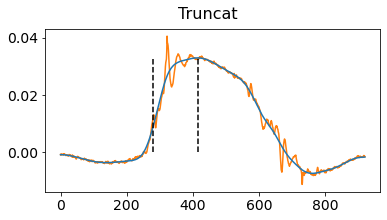


MLSi16F12mLHV7kV - Trial01 - Seg3
Avg. Pressure of zipping = 0.027 (bar), Max. P. = 0.041 (bar) in 0.073 (sec)

(920,)
0.17914905537887138
0.03206518893364832


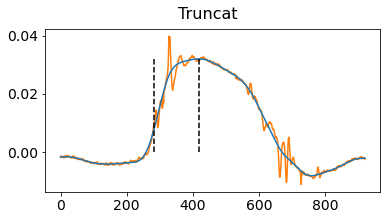


MLSi16F12mLHV7kV - Trial01 - Seg4
Avg. Pressure of zipping = 0.026 (bar), Max. P. = 0.040 (bar) in 0.073 (sec)

(920,)
0.1768396058075887
0.03174310230069291


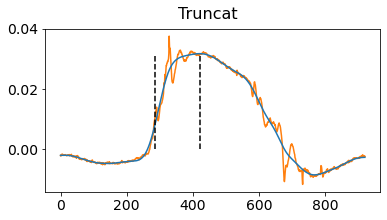


MLSi16F12mLHV7kV - Trial01 - Seg5
Avg. Pressure of zipping = 0.026 (bar), Max. P. = 0.038 (bar) in 0.073 (sec)

(920,)
0.1780424441259651
0.031371629781718396


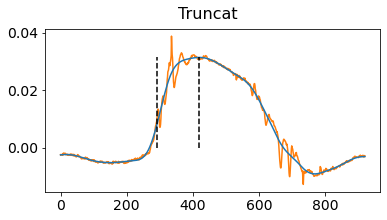


MLSi16F12mLHV7kV - Trial01 - Seg6
Avg. Pressure of zipping = 0.026 (bar), Max. P. = 0.039 (bar) in 0.070 (sec)

(920,)
0.17356788558160494
0.031000256059622283


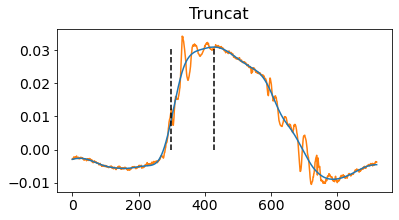


MLSi16F12mLHV7kV - Trial01 - Seg7
Avg. Pressure of zipping = 0.026 (bar), Max. P. = 0.034 (bar) in 0.071 (sec)

(920,)
0.17297448534453927
0.03051982692944638


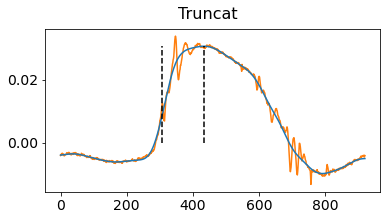


MLSi16F12mLHV7kV - Trial01 - Seg8
Avg. Pressure of zipping = 0.025 (bar), Max. P. = 0.034 (bar) in 0.070 (sec)

(920,)
0.1755405404237422
0.030070041516123136


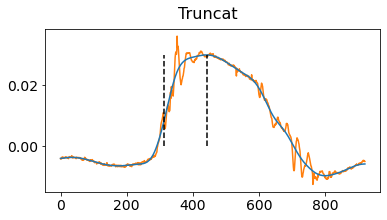


MLSi16F12mLHV7kV - Trial01 - Seg9
Avg. Pressure of zipping = 0.025 (bar), Max. P. = 0.036 (bar) in 0.071 (sec)

(920,)
0.1714508901412625
0.02971061161632438


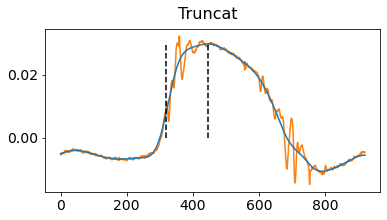


MLSi16F12mLHV7kV - Trial01 - Seg10
Avg. Pressure of zipping = 0.025 (bar), Max. P. = 0.032 (bar) in 0.068 (sec)

(920,)
0.17626224341476804
0.029309978699758127


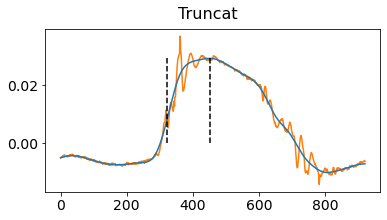


MLSi16F12mLHV7kV - Trial01 - Seg11
Avg. Pressure of zipping = 0.024 (bar), Max. P. = 0.037 (bar) in 0.071 (sec)

(920,)
0.17494714018667654
0.028707441844140258


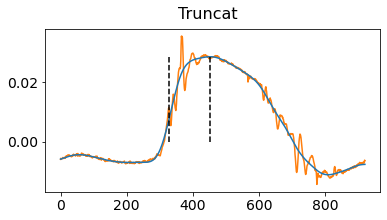


MLSi16F12mLHV7kV - Trial01 - Seg12
Avg. Pressure of zipping = 0.024 (bar), Max. P. = 0.036 (bar) in 0.068 (sec)

(920,)
0.1690291756602647
0.028555524192422438


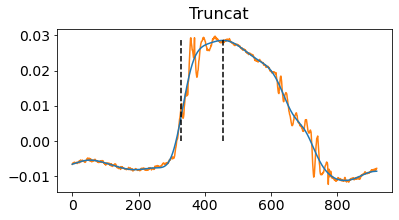


MLSi16F12mLHV7kV - Trial01 - Seg13
Avg. Pressure of zipping = 0.024 (bar), Max. P. = 0.030 (bar) in 0.068 (sec)

(920,)
0.17584525946439758
0.02807721279235978


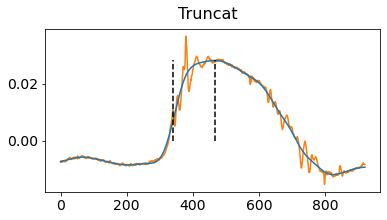


MLSi16F12mLHV7kV - Trial01 - Seg14
Avg. Pressure of zipping = 0.023 (bar), Max. P. = 0.037 (bar) in 0.068 (sec)

(920,)
0.17244523648445365
0.027852304663138178


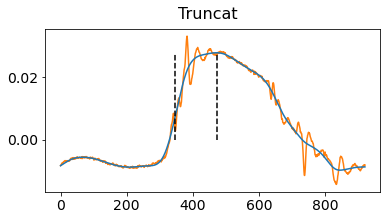


MLSi16F12mLHV7kV - Trial01 - Seg15
Avg. Pressure of zipping = 0.023 (bar), Max. P. = 0.033 (bar) in 0.068 (sec)

(920,)
0.17467449683451122
0.027156866608883556


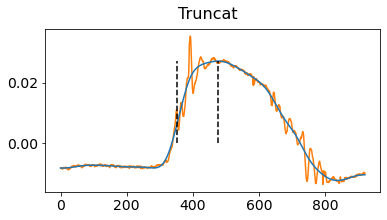


MLSi16F12mLHV7kV - Trial01 - Seg16
Avg. Pressure of zipping = 0.022 (bar), Max. P. = 0.035 (bar) in 0.067 (sec)

(920,)
0.1722367445092684
0.0268857227147678


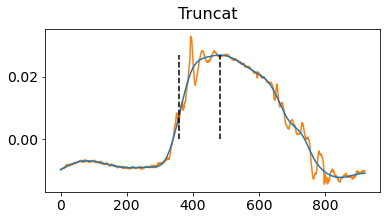


MLSi16F12mLHV7kV - Trial01 - Seg17
Avg. Pressure of zipping = 0.022 (bar), Max. P. = 0.033 (bar) in 0.067 (sec)

(920,)
0.17258957708265882
0.02654605609233568


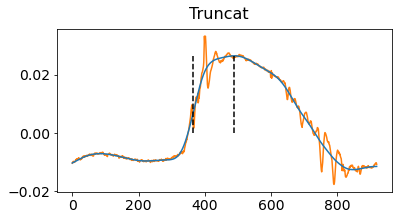


MLSi16F12mLHV7kV - Trial01 - Seg18
Avg. Pressure of zipping = 0.022 (bar), Max. P. = 0.033 (bar) in 0.067 (sec)

(920,)
0.17281410690208907
0.026489484195215796


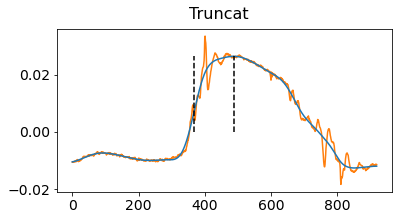


MLSi16F12mLHV7kV - Trial01 - Seg19
Avg. Pressure of zipping = 0.022 (bar), Max. P. = 0.034 (bar) in 0.066 (sec)

(920,)
0.17331128007368465
0.026043330972572443


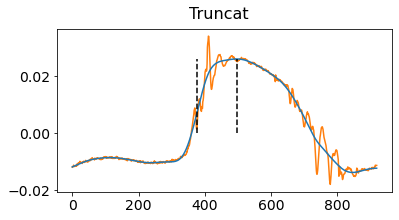


MLSi16F12mLHV7kV - Trial01 - Seg20
Avg. Pressure of zipping = 0.022 (bar), Max. P. = 0.034 (bar) in 0.065 (sec)

(919,)
0.1135542724167458
0.10728970475319648


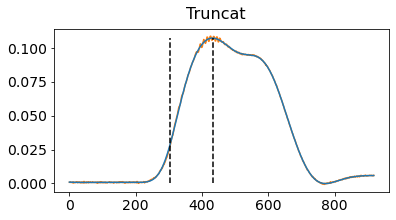


MLSi16F4mLHV7kV - Trial02 - Seg1
Avg. Pressure of zipping = 0.079 (bar), Max. P. = 0.109 (bar) in 0.071 (sec)

(919,)
0.10928820584757089
0.10349915329304726


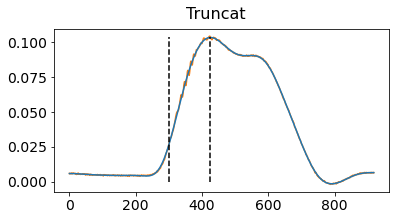


MLSi16F4mLHV7kV - Trial02 - Seg2
Avg. Pressure of zipping = 0.075 (bar), Max. P. = 0.104 (bar) in 0.068 (sec)

(921,)
0.1098174547076565
0.10423713020620044


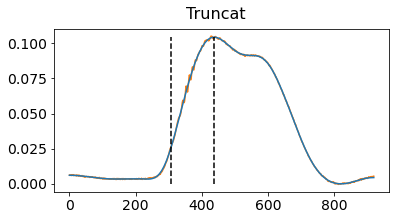


MLSi16F4mLHV7kV - Trial02 - Seg3
Avg. Pressure of zipping = 0.075 (bar), Max. P. = 0.105 (bar) in 0.070 (sec)

(920,)
0.11162973110734359
0.10598961974284386


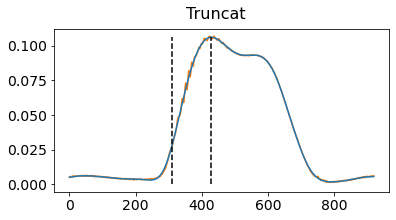


MLSi16F4mLHV7kV - Trial02 - Seg4
Avg. Pressure of zipping = 0.078 (bar), Max. P. = 0.107 (bar) in 0.065 (sec)

(920,)
0.10954481135549118
0.10395924125860227


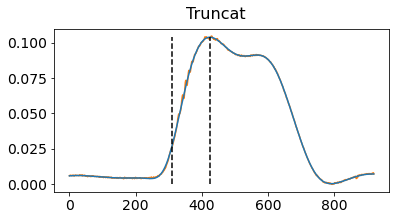


MLSi16F4mLHV7kV - Trial02 - Seg5
Avg. Pressure of zipping = 0.076 (bar), Max. P. = 0.105 (bar) in 0.062 (sec)

(920,)
0.11169388248432366
0.10549706514936802


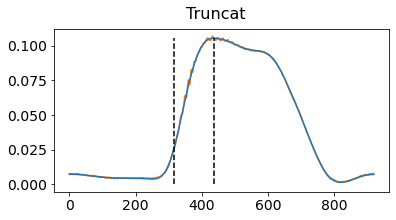


MLSi16F4mLHV7kV - Trial02 - Seg6
Avg. Pressure of zipping = 0.079 (bar), Max. P. = 0.107 (bar) in 0.065 (sec)

(920,)
0.1167618412657495
0.10847822241415654


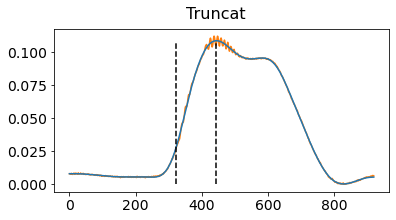


MLSi16F4mLHV7kV - Trial02 - Seg7
Avg. Pressure of zipping = 0.079 (bar), Max. P. = 0.112 (bar) in 0.066 (sec)

(920,)
0.11802883096110596
0.10986868062243141


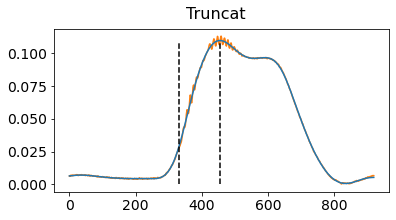


MLSi16F4mLHV7kV - Trial02 - Seg8
Avg. Pressure of zipping = 0.080 (bar), Max. P. = 0.113 (bar) in 0.068 (sec)

(920,)
0.11876657179637681
0.11065515655099635


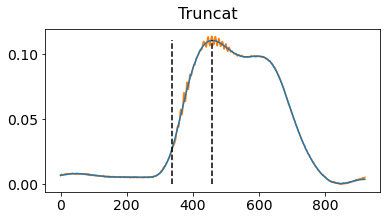


MLSi16F4mLHV7kV - Trial02 - Seg9
Avg. Pressure of zipping = 0.081 (bar), Max. P. = 0.114 (bar) in 0.065 (sec)

(920,)
0.11907129083703216
0.11049594987188062


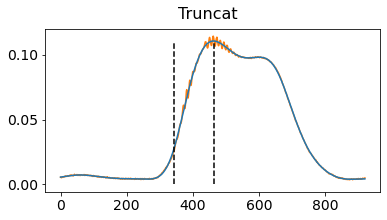


MLSi16F4mLHV7kV - Trial02 - Seg10
Avg. Pressure of zipping = 0.081 (bar), Max. P. = 0.114 (bar) in 0.065 (sec)

(920,)
0.11772411192045061
0.10931195320021982


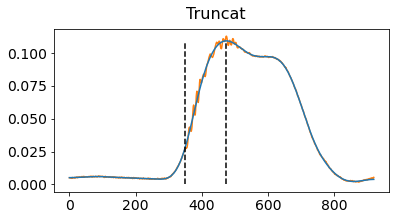


MLSi16F4mLHV7kV - Trial02 - Seg11
Avg. Pressure of zipping = 0.080 (bar), Max. P. = 0.113 (bar) in 0.068 (sec)

(920,)
0.1147571107351222
0.10750305137786602


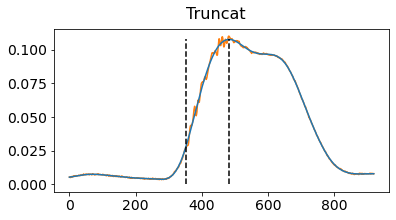


MLSi16F4mLHV7kV - Trial02 - Seg12
Avg. Pressure of zipping = 0.078 (bar), Max. P. = 0.110 (bar) in 0.071 (sec)

(920,)
0.10393156586973472
0.09739255898593425


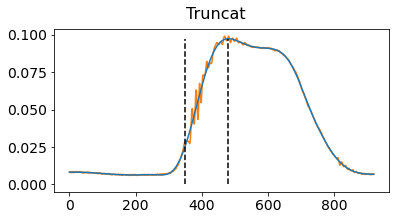


MLSi16F4mLHV7kV - Trial02 - Seg13
Avg. Pressure of zipping = 0.070 (bar), Max. P. = 0.099 (bar) in 0.072 (sec)

(920,)
0.1115495418861185
0.1056993034238436


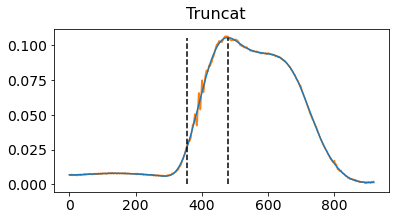


MLSi16F4mLHV7kV - Trial02 - Seg14
Avg. Pressure of zipping = 0.075 (bar), Max. P. = 0.107 (bar) in 0.067 (sec)

(920,)
0.1079089512424993
0.10169000746991898


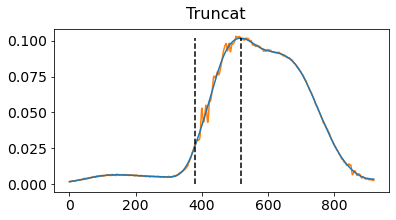


MLSi16F4mLHV7kV - Trial02 - Seg15
Avg. Pressure of zipping = 0.073 (bar), Max. P. = 0.103 (bar) in 0.076 (sec)

(920,)
0.10915990309361075
0.10218628040648466


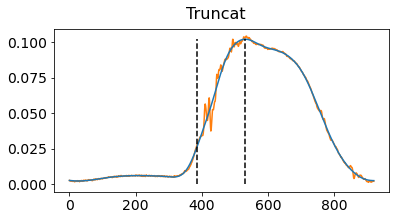


MLSi16F4mLHV7kV - Trial02 - Seg16
Avg. Pressure of zipping = 0.073 (bar), Max. P. = 0.104 (bar) in 0.080 (sec)

(920,)
0.11175803386130374
0.10197880836784427


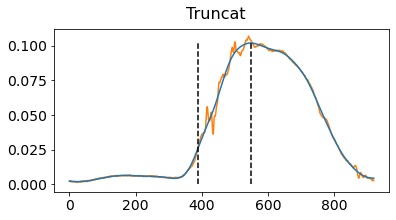


MLSi16F4mLHV7kV - Trial02 - Seg17
Avg. Pressure of zipping = 0.073 (bar), Max. P. = 0.107 (bar) in 0.086 (sec)

(920,)
0.11000990883859672
0.10094104462104199


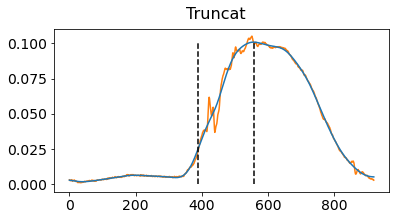


MLSi16F4mLHV7kV - Trial02 - Seg18
Avg. Pressure of zipping = 0.072 (bar), Max. P. = 0.105 (bar) in 0.091 (sec)

(920,)
0.11031462787925207
0.10045442356321867


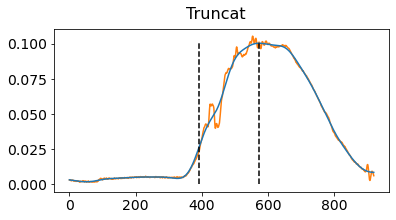


MLSi16F4mLHV7kV - Trial02 - Seg19
Avg. Pressure of zipping = 0.073 (bar), Max. P. = 0.105 (bar) in 0.099 (sec)

(920,)
0.10848631363531996
0.10125310703089226


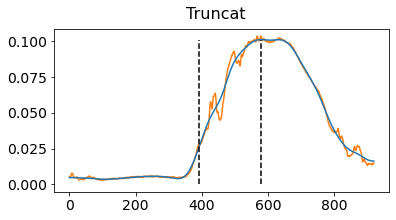


MLSi16F4mLHV7kV - Trial02 - Seg20
Avg. Pressure of zipping = 0.073 (bar), Max. P. = 0.104 (bar) in 0.102 (sec)

(919,)
0.13252704215860267
0.11489989738952723


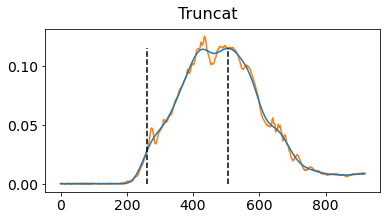


MLSi16F5mLHV7kV - Trial02 - Seg1
Avg. Pressure of zipping = 0.085 (bar), Max. P. = 0.125 (bar) in 0.132 (sec)

(919,)
0.11586372198802847
0.10340872693891533


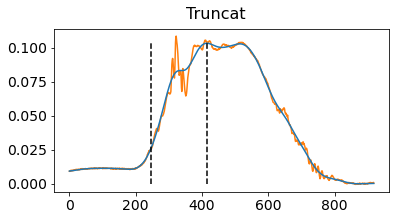


MLSi16F5mLHV7kV - Trial02 - Seg2
Avg. Pressure of zipping = 0.076 (bar), Max. P. = 0.109 (bar) in 0.092 (sec)

(921,)
0.11836562569025134
0.10742858537648613


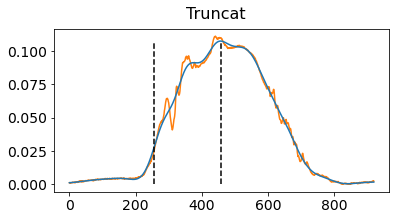


MLSi16F5mLHV7kV - Trial02 - Seg3
Avg. Pressure of zipping = 0.078 (bar), Max. P. = 0.111 (bar) in 0.110 (sec)

(920,)
0.1156391921685982
0.10629284668054022


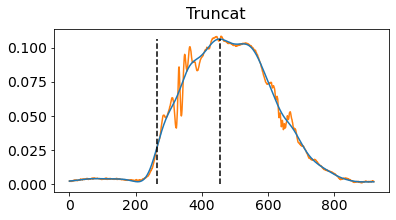


MLSi16F5mLHV7kV - Trial02 - Seg4
Avg. Pressure of zipping = 0.078 (bar), Max. P. = 0.108 (bar) in 0.103 (sec)

(920,)
0.13233458802766243
0.1075155587058239


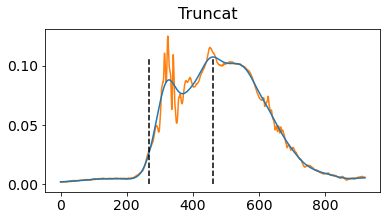


MLSi16F5mLHV7kV - Trial02 - Seg5
Avg. Pressure of zipping = 0.081 (bar), Max. P. = 0.125 (bar) in 0.104 (sec)

(920,)
0.1330723288629333
0.10547937130996493


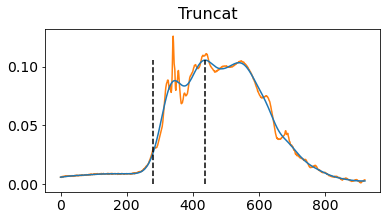


MLSi16F5mLHV7kV - Trial02 - Seg6
Avg. Pressure of zipping = 0.079 (bar), Max. P. = 0.126 (bar) in 0.086 (sec)

(920,)
0.1268977588286012
0.10712767183454137


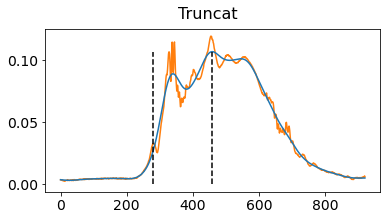


MLSi16F5mLHV7kV - Trial02 - Seg7
Avg. Pressure of zipping = 0.080 (bar), Max. P. = 0.120 (bar) in 0.097 (sec)

(920,)
0.13041004671826023
0.1040458678693303


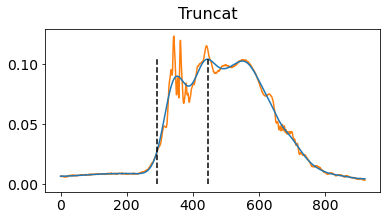


MLSi16F5mLHV7kV - Trial02 - Seg8
Avg. Pressure of zipping = 0.080 (bar), Max. P. = 0.123 (bar) in 0.084 (sec)

(920,)
0.13751481171880342
0.10569064627031241


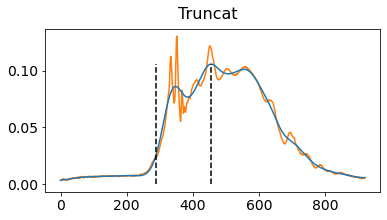


MLSi16F5mLHV7kV - Trial02 - Seg9
Avg. Pressure of zipping = 0.079 (bar), Max. P. = 0.130 (bar) in 0.090 (sec)

(920,)
0.13084306851287572
0.1054038964716606


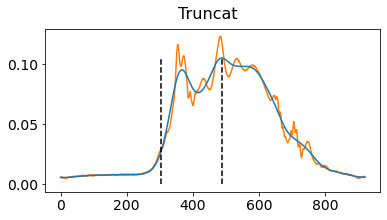


MLSi16F5mLHV7kV - Trial02 - Seg10
Avg. Pressure of zipping = 0.081 (bar), Max. P. = 0.124 (bar) in 0.100 (sec)

(920,)
0.13804406057888902
0.11134081384341699


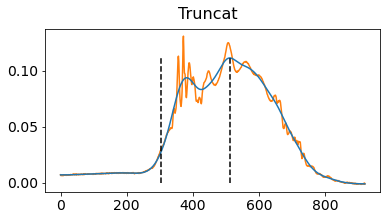


MLSi16F5mLHV7kV - Trial02 - Seg11
Avg. Pressure of zipping = 0.083 (bar), Max. P. = 0.131 (bar) in 0.113 (sec)

(920,)
0.1289987164246986
0.11328409560033137


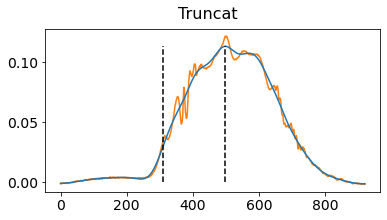


MLSi16F5mLHV7kV - Trial02 - Seg12
Avg. Pressure of zipping = 0.081 (bar), Max. P. = 0.122 (bar) in 0.103 (sec)

(920,)
0.1259675638623901
0.1138740544387347


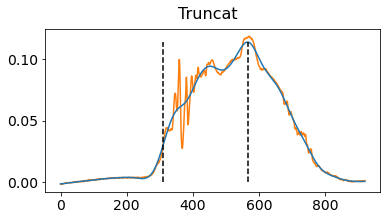


MLSi16F5mLHV7kV - Trial02 - Seg13
Avg. Pressure of zipping = 0.081 (bar), Max. P. = 0.119 (bar) in 0.140 (sec)

(920,)
0.12017790208993843
0.1069631019674892


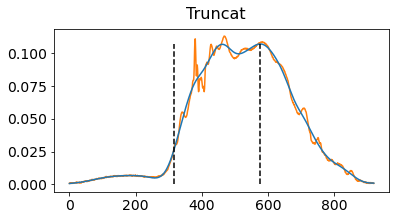


MLSi16F5mLHV7kV - Trial02 - Seg14
Avg. Pressure of zipping = 0.088 (bar), Max. P. = 0.113 (bar) in 0.141 (sec)

(920,)
0.1259675638623901
0.11249453622359373


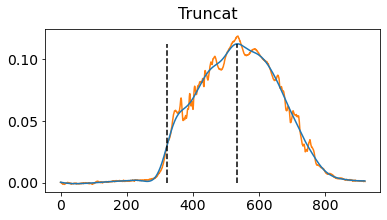


MLSi16F5mLHV7kV - Trial02 - Seg15
Avg. Pressure of zipping = 0.079 (bar), Max. P. = 0.119 (bar) in 0.116 (sec)

(920,)
0.12232697321877091
0.10458891140961264


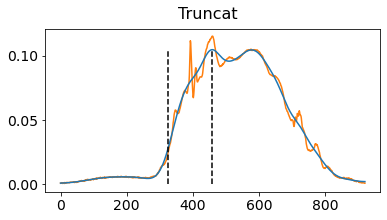


MLSi16F5mLHV7kV - Trial02 - Seg16
Avg. Pressure of zipping = 0.075 (bar), Max. P. = 0.115 (bar) in 0.073 (sec)

(920,)
0.12211848124358568
0.10479939478048125


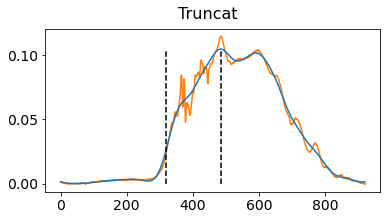


MLSi16F5mLHV7kV - Trial02 - Seg17
Avg. Pressure of zipping = 0.074 (bar), Max. P. = 0.115 (bar) in 0.089 (sec)

(920,)
0.12486095260948384
0.10520800655163076


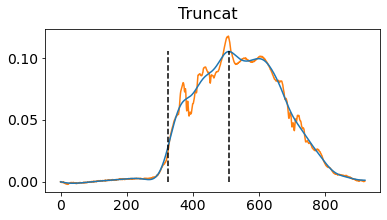


MLSi16F5mLHV7kV - Trial02 - Seg18
Avg. Pressure of zipping = 0.076 (bar), Max. P. = 0.118 (bar) in 0.101 (sec)

(920,)
0.12029016699965357
0.10471006500436122


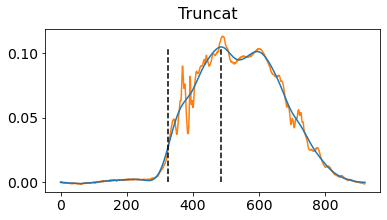


MLSi16F5mLHV7kV - Trial02 - Seg19
Avg. Pressure of zipping = 0.074 (bar), Max. P. = 0.113 (bar) in 0.087 (sec)

(920,)
0.12259961657093622
0.10566363146934311


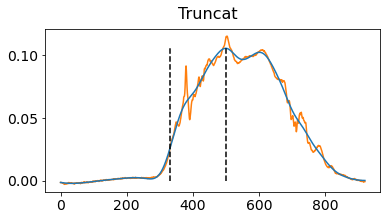


MLSi16F5mLHV7kV - Trial02 - Seg20
Avg. Pressure of zipping = 0.075 (bar), Max. P. = 0.115 (bar) in 0.091 (sec)

(919,)
0.1353497027457259
0.10309045879696634


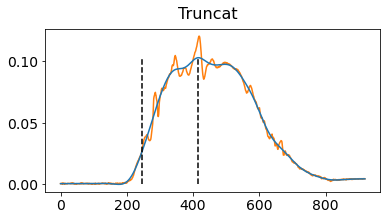


MLSi16F6mLHV7kV - Trial02 - Seg1
Avg. Pressure of zipping = 0.079 (bar), Max. P. = 0.121 (bar) in 0.093 (sec)

(919,)
0.1402893587731916
0.11713215455455928


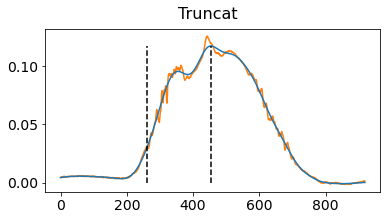


MLSi16F6mLHV7kV - Trial02 - Seg2
Avg. Pressure of zipping = 0.086 (bar), Max. P. = 0.126 (bar) in 0.105 (sec)

(921,)
0.1621489404791518
0.1372305357506251


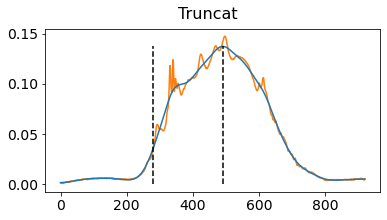


MLSi16F6mLHV7kV - Trial02 - Seg3
Avg. Pressure of zipping = 0.100 (bar), Max. P. = 0.147 (bar) in 0.115 (sec)

(920,)
0.15493191056889347
0.13466581935975375


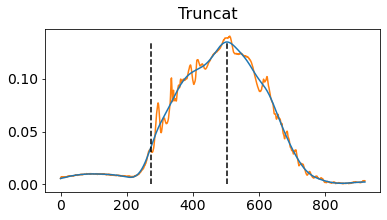


MLSi16F6mLHV7kV - Trial02 - Seg4
Avg. Pressure of zipping = 0.096 (bar), Max. P. = 0.140 (bar) in 0.125 (sec)

(920,)
0.14410636570350602
0.12651339719309518


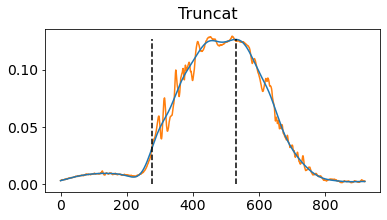


MLSi16F6mLHV7kV - Trial02 - Seg5
Avg. Pressure of zipping = 0.098 (bar), Max. P. = 0.129 (bar) in 0.138 (sec)

(920,)
0.15796306313120195
0.13636329390501062


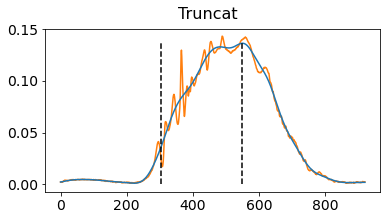


MLSi16F6mLHV7kV - Trial02 - Seg6
Avg. Pressure of zipping = 0.104 (bar), Max. P. = 0.143 (bar) in 0.134 (sec)

(920,)
0.1374185846533333
0.11926400676154084


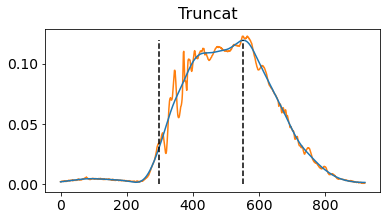


MLSi16F6mLHV7kV - Trial02 - Seg7
Avg. Pressure of zipping = 0.094 (bar), Max. P. = 0.123 (bar) in 0.139 (sec)

(920,)
0.15153188758894956
0.12713842069580478


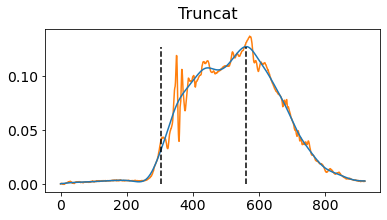


MLSi16F6mLHV7kV - Trial02 - Seg8
Avg. Pressure of zipping = 0.095 (bar), Max. P. = 0.137 (bar) in 0.140 (sec)

(920,)
0.16202063772519165
0.11158227926698566


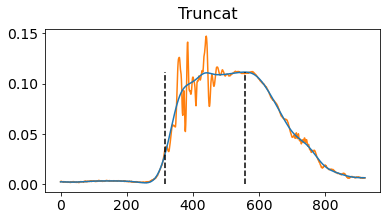


MLSi16F6mLHV7kV - Trial02 - Seg9
Avg. Pressure of zipping = 0.098 (bar), Max. P. = 0.147 (bar) in 0.132 (sec)

(920,)
0.13721009267814807
0.10541155255091102


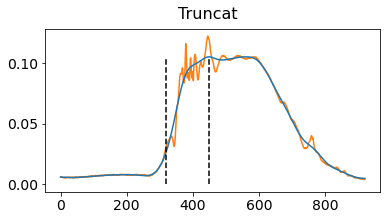


MLSi16F6mLHV7kV - Trial02 - Seg10
Avg. Pressure of zipping = 0.082 (bar), Max. P. = 0.122 (bar) in 0.070 (sec)

(920,)
0.1415884241570381
0.11516918378345714


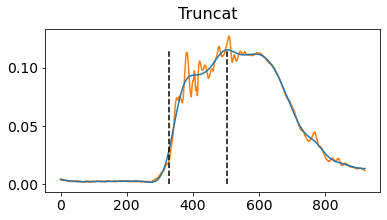


MLSi16F6mLHV7kV - Trial02 - Seg11
Avg. Pressure of zipping = 0.090 (bar), Max. P. = 0.127 (bar) in 0.096 (sec)

(920,)
0.139760109913106
0.11056441849004009


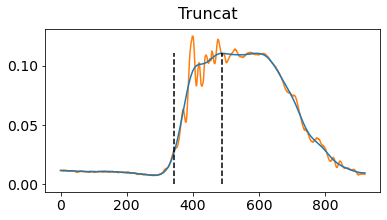


MLSi16F6mLHV7kV - Trial02 - Seg12
Avg. Pressure of zipping = 0.089 (bar), Max. P. = 0.125 (bar) in 0.078 (sec)

(920,)
0.13636008693316207
0.11085743250646385


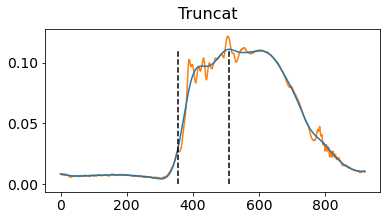


MLSi16F6mLHV7kV - Trial02 - Seg13
Avg. Pressure of zipping = 0.089 (bar), Max. P. = 0.122 (bar) in 0.084 (sec)

(920,)
0.15866872827798278
0.11061292727608216


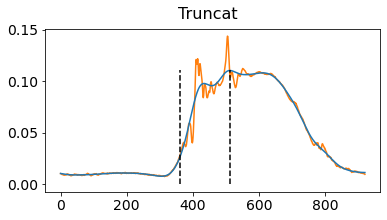


MLSi16F6mLHV7kV - Trial02 - Seg14
Avg. Pressure of zipping = 0.086 (bar), Max. P. = 0.144 (bar) in 0.081 (sec)

(920,)
0.15158000112168463
0.10216752251621046


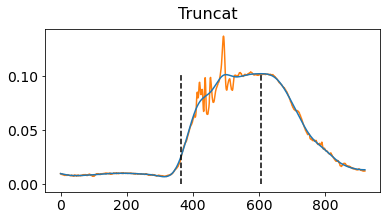


MLSi16F6mLHV7kV - Trial02 - Seg15
Avg. Pressure of zipping = 0.086 (bar), Max. P. = 0.137 (bar) in 0.132 (sec)

(920,)
0.1389742555451001
0.11250341527177599


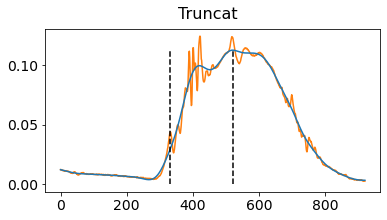


MLSi16F6mLHV7kV - Trial02 - Seg16
Avg. Pressure of zipping = 0.087 (bar), Max. P. = 0.124 (bar) in 0.103 (sec)

(920,)
0.17019993829015106
0.12080469581991582


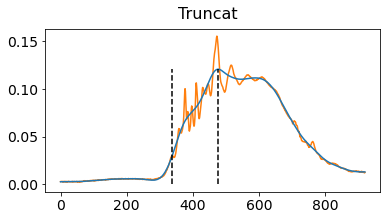


MLSi16F6mLHV7kV - Trial02 - Seg17
Avg. Pressure of zipping = 0.083 (bar), Max. P. = 0.155 (bar) in 0.075 (sec)

(920,)
0.15259038530912078
0.10772886646086484


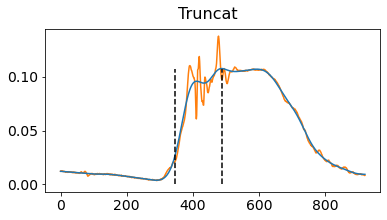


MLSi16F6mLHV7kV - Trial02 - Seg18
Avg. Pressure of zipping = 0.086 (bar), Max. P. = 0.138 (bar) in 0.076 (sec)

(920,)
0.15329605045590158
0.10996011714912686


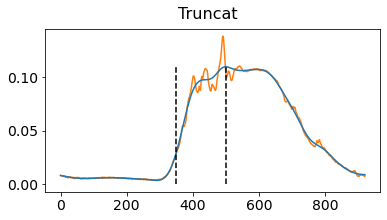


MLSi16F6mLHV7kV - Trial02 - Seg19
Avg. Pressure of zipping = 0.087 (bar), Max. P. = 0.139 (bar) in 0.082 (sec)

(920,)
0.13485252957413035
0.10646023968424756


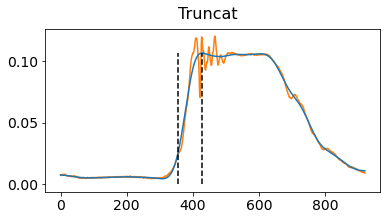


MLSi16F6mLHV7kV - Trial02 - Seg20
Avg. Pressure of zipping = 0.077 (bar), Max. P. = 0.120 (bar) in 0.039 (sec)

(919,)
0.17517167000610678
0.12807097740836143


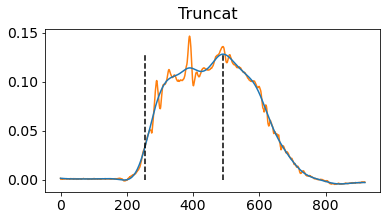


MLSi16F7mLHV7kV - Trial02 - Seg1
Avg. Pressure of zipping = 0.102 (bar), Max. P. = 0.146 (bar) in 0.128 (sec)

(919,)
0.16750558045698796
0.12744604407013183


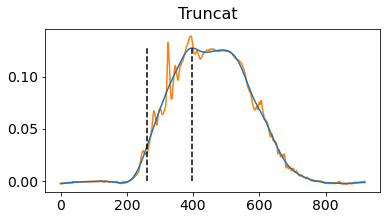


MLSi16F7mLHV7kV - Trial02 - Seg2
Avg. Pressure of zipping = 0.089 (bar), Max. P. = 0.139 (bar) in 0.074 (sec)

(921,)
0.20155392378916218
0.1358012645827382


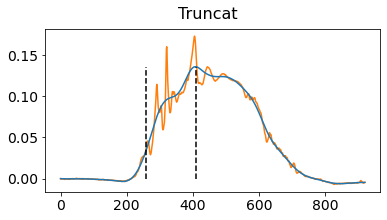


MLSi16F7mLHV7kV - Trial02 - Seg3
Avg. Pressure of zipping = 0.097 (bar), Max. P. = 0.173 (bar) in 0.081 (sec)

(920,)
0.1834311597922913
0.1282206861001279


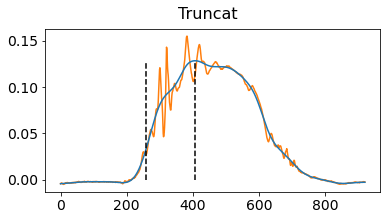


MLSi16F7mLHV7kV - Trial02 - Seg4
Avg. Pressure of zipping = 0.093 (bar), Max. P. = 0.155 (bar) in 0.080 (sec)

(920,)
0.18468211164340276
0.12477087437852998


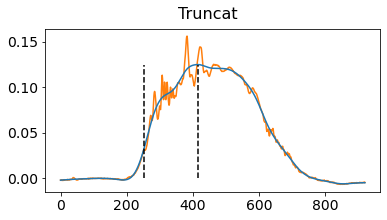


MLSi16F7mLHV7kV - Trial02 - Seg5
Avg. Pressure of zipping = 0.092 (bar), Max. P. = 0.156 (bar) in 0.089 (sec)

(920,)
0.18447361966821751
0.1273858540465534


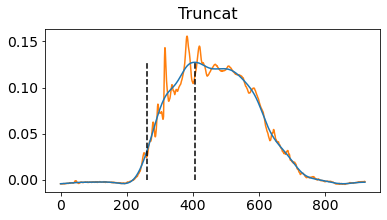


MLSi16F7mLHV7kV - Trial02 - Seg6
Avg. Pressure of zipping = 0.093 (bar), Max. P. = 0.156 (bar) in 0.078 (sec)

(920,)
0.1832547435055961
0.12308145926437712


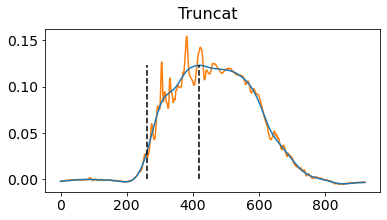


MLSi16F7mLHV7kV - Trial02 - Seg7
Avg. Pressure of zipping = 0.093 (bar), Max. P. = 0.155 (bar) in 0.085 (sec)

(920,)
0.19459349938682416
0.13014101436489153


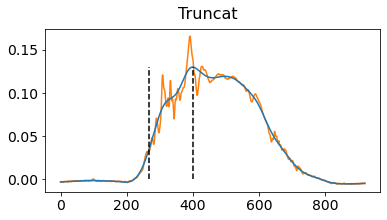


MLSi16F7mLHV7kV - Trial02 - Seg8
Avg. Pressure of zipping = 0.093 (bar), Max. P. = 0.166 (bar) in 0.072 (sec)

(920,)
0.1915944225130057
0.12203536084550755


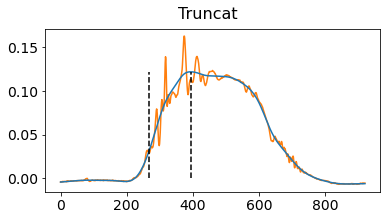


MLSi16F7mLHV7kV - Trial02 - Seg9
Avg. Pressure of zipping = 0.090 (bar), Max. P. = 0.163 (bar) in 0.068 (sec)

(920,)
0.18909251881078282
0.1249565087255964


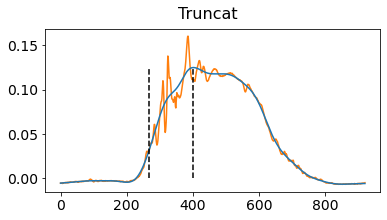


MLSi16F7mLHV7kV - Trial02 - Seg10
Avg. Pressure of zipping = 0.091 (bar), Max. P. = 0.160 (bar) in 0.072 (sec)

(920,)
0.17871603358425586
0.11189893211931963


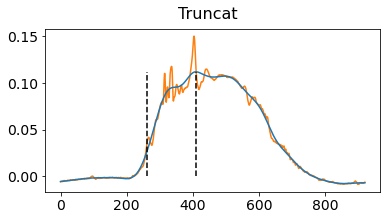


MLSi16F7mLHV7kV - Trial02 - Seg11
Avg. Pressure of zipping = 0.086 (bar), Max. P. = 0.150 (bar) in 0.080 (sec)

(920,)
0.17784998999502488
0.11332158634522284


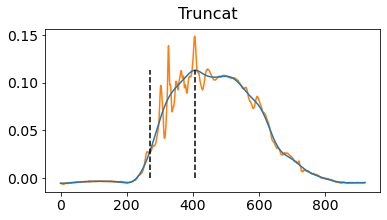


MLSi16F7mLHV7kV - Trial02 - Seg12
Avg. Pressure of zipping = 0.084 (bar), Max. P. = 0.149 (bar) in 0.074 (sec)

(920,)
0.17279806905784406
0.11076548542560773


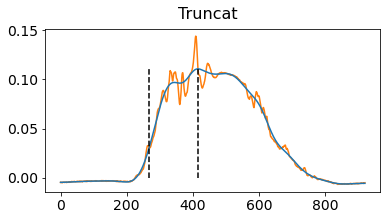


MLSi16F7mLHV7kV - Trial02 - Seg13
Avg. Pressure of zipping = 0.087 (bar), Max. P. = 0.144 (bar) in 0.081 (sec)

(920,)
0.1969029489581068
0.11242597663930569


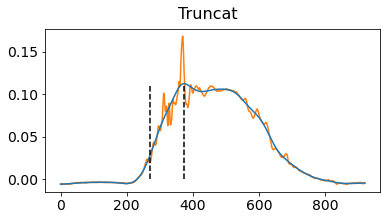


MLSi16F7mLHV7kV - Trial02 - Seg14
Avg. Pressure of zipping = 0.080 (bar), Max. P. = 0.168 (bar) in 0.055 (sec)

(920,)
0.19157838466876068
0.11307774132042679


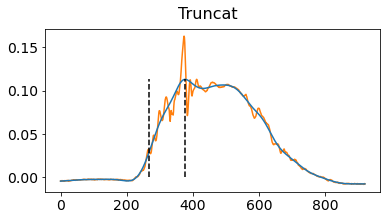


MLSi16F7mLHV7kV - Trial02 - Seg15
Avg. Pressure of zipping = 0.080 (bar), Max. P. = 0.163 (bar) in 0.059 (sec)

(920,)
0.17738489251191933
0.113107541528625


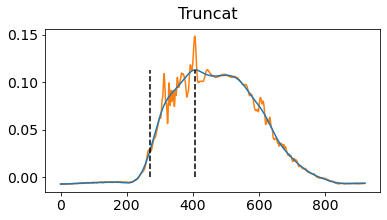


MLSi16F7mLHV7kV - Trial02 - Seg16
Avg. Pressure of zipping = 0.085 (bar), Max. P. = 0.149 (bar) in 0.074 (sec)

(920,)
0.17879622280548096
0.10895909439130234


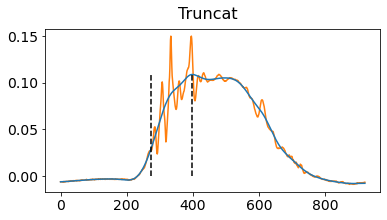


MLSi16F7mLHV7kV - Trial02 - Seg17
Avg. Pressure of zipping = 0.082 (bar), Max. P. = 0.150 (bar) in 0.068 (sec)

(920,)
0.1733593936064197
0.11048786177243401


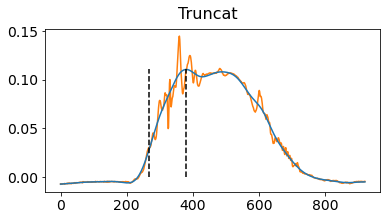


MLSi16F7mLHV7kV - Trial02 - Seg18
Avg. Pressure of zipping = 0.078 (bar), Max. P. = 0.145 (bar) in 0.061 (sec)

(920,)
0.19446519663286402
0.11553322057989897


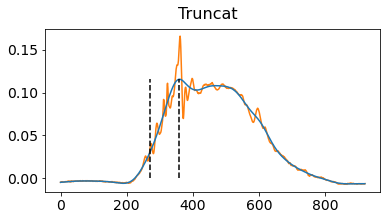


MLSi16F7mLHV7kV - Trial02 - Seg19
Avg. Pressure of zipping = 0.078 (bar), Max. P. = 0.166 (bar) in 0.049 (sec)

(920,)
0.16933389470092006
0.11289184886845456


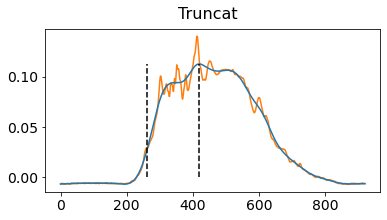


MLSi16F7mLHV7kV - Trial02 - Seg20
Avg. Pressure of zipping = 0.087 (bar), Max. P. = 0.141 (bar) in 0.085 (sec)

(919,)
0.20732754771736883
0.12290651325316561


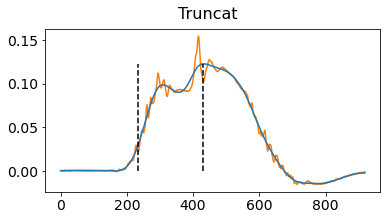


MLSi16F8mLHV7kV - Trial02 - Seg1
Avg. Pressure of zipping = 0.091 (bar), Max. P. = 0.155 (bar) in 0.107 (sec)

(919,)
0.18731231809958576
0.10646267141407124


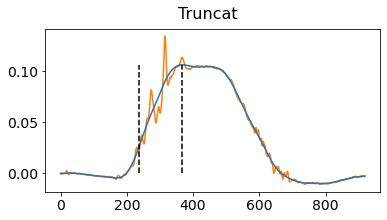


MLSi16F8mLHV7kV - Trial02 - Seg2
Avg. Pressure of zipping = 0.077 (bar), Max. P. = 0.135 (bar) in 0.070 (sec)

(921,)
0.1637366870594086
0.10404450387640492


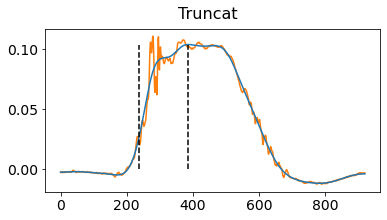


MLSi16F8mLHV7kV - Trial02 - Seg3
Avg. Pressure of zipping = 0.084 (bar), Max. P. = 0.111 (bar) in 0.081 (sec)

(920,)
0.1920114064633762
0.10352204931097599


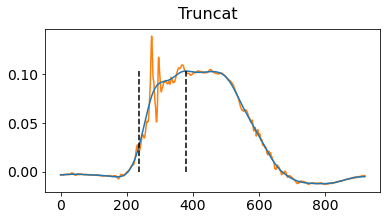


MLSi16F8mLHV7kV - Trial02 - Seg4
Avg. Pressure of zipping = 0.083 (bar), Max. P. = 0.139 (bar) in 0.077 (sec)

(920,)
0.1639772547230839
0.10404716685978478


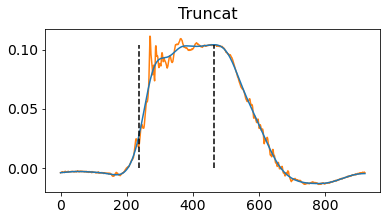


MLSi16F8mLHV7kV - Trial02 - Seg5
Avg. Pressure of zipping = 0.090 (bar), Max. P. = 0.111 (bar) in 0.123 (sec)

(920,)
0.17576507024317248
0.10380954728904003


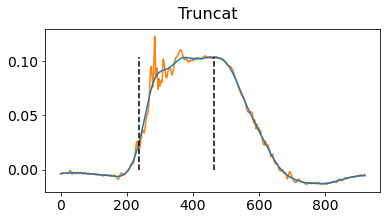


MLSi16F8mLHV7kV - Trial02 - Seg6
Avg. Pressure of zipping = 0.090 (bar), Max. P. = 0.123 (bar) in 0.122 (sec)

(920,)
0.1804000072299828
0.11818887111919714


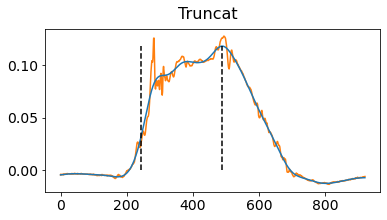


MLSi16F8mLHV7kV - Trial02 - Seg7
Avg. Pressure of zipping = 0.094 (bar), Max. P. = 0.128 (bar) in 0.134 (sec)

(920,)
0.18426512769303227
0.12240405292991187


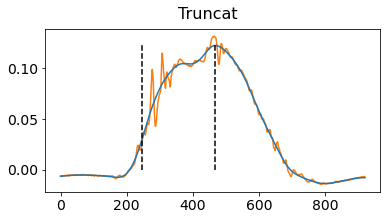


MLSi16F8mLHV7kV - Trial02 - Seg8
Avg. Pressure of zipping = 0.094 (bar), Max. P. = 0.132 (bar) in 0.120 (sec)

(920,)
0.18445758182397248
0.12101345161278697


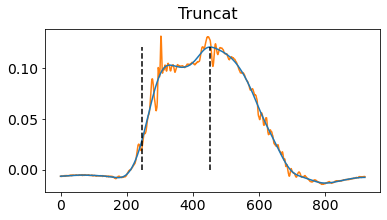


MLSi16F8mLHV7kV - Trial02 - Seg9
Avg. Pressure of zipping = 0.096 (bar), Max. P. = 0.132 (bar) in 0.111 (sec)

(920,)
0.18389625727539685
0.12006000081548694


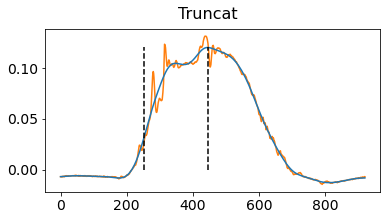


MLSi16F8mLHV7kV - Trial02 - Seg10
Avg. Pressure of zipping = 0.094 (bar), Max. P. = 0.131 (bar) in 0.105 (sec)

(920,)
0.18319059212861602
0.11959505587573395


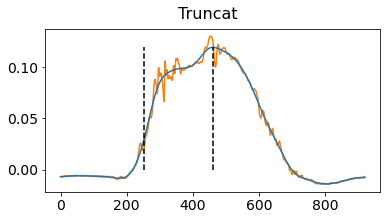


MLSi16F8mLHV7kV - Trial02 - Seg11
Avg. Pressure of zipping = 0.093 (bar), Max. P. = 0.131 (bar) in 0.113 (sec)

(920,)
0.19324632047024262
0.1203693643197913


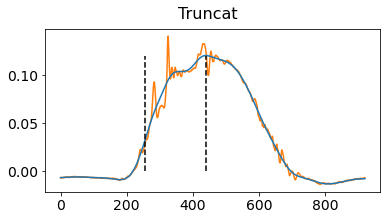


MLSi16F8mLHV7kV - Trial02 - Seg12
Avg. Pressure of zipping = 0.092 (bar), Max. P. = 0.141 (bar) in 0.101 (sec)

(920,)
0.1976727654818677
0.11818255715018063


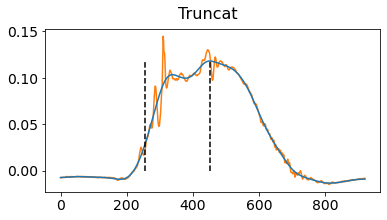


MLSi16F8mLHV7kV - Trial02 - Seg13
Avg. Pressure of zipping = 0.094 (bar), Max. P. = 0.145 (bar) in 0.106 (sec)

(920,)
0.18349531116927137
0.1190537065790095


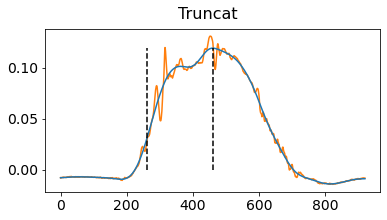


MLSi16F8mLHV7kV - Trial02 - Seg14
Avg. Pressure of zipping = 0.093 (bar), Max. P. = 0.131 (bar) in 0.108 (sec)

(920,)
0.19136989269357546
0.11736182034308064


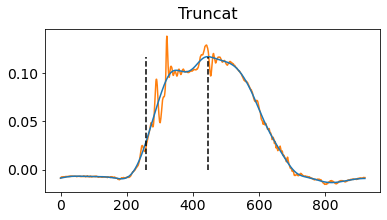


MLSi16F8mLHV7kV - Trial02 - Seg15
Avg. Pressure of zipping = 0.092 (bar), Max. P. = 0.139 (bar) in 0.101 (sec)

(920,)
0.18381606805417175
0.11794104536316828


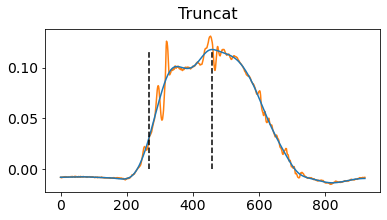


MLSi16F8mLHV7kV - Trial02 - Seg16
Avg. Pressure of zipping = 0.093 (bar), Max. P. = 0.131 (bar) in 0.104 (sec)

(920,)
0.18248492698183522
0.11729159887235598


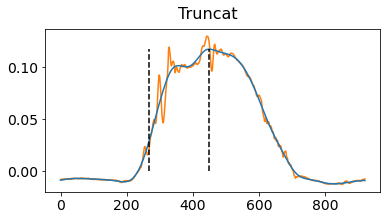


MLSi16F8mLHV7kV - Trial02 - Seg17
Avg. Pressure of zipping = 0.092 (bar), Max. P. = 0.130 (bar) in 0.098 (sec)

(920,)
0.18355946254625144
0.1173574044019244


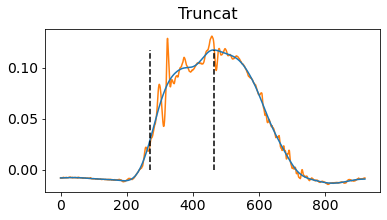


MLSi16F8mLHV7kV - Trial02 - Seg18
Avg. Pressure of zipping = 0.091 (bar), Max. P. = 0.131 (bar) in 0.104 (sec)

(920,)
0.18251700267032525
0.11632404033610418


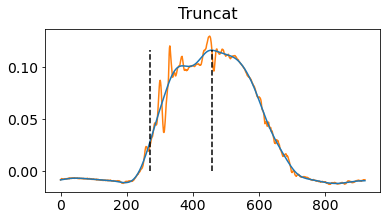


MLSi16F8mLHV7kV - Trial02 - Seg19
Avg. Pressure of zipping = 0.090 (bar), Max. P. = 0.130 (bar) in 0.101 (sec)

(920,)
0.18312644075163595
0.11602942878015583


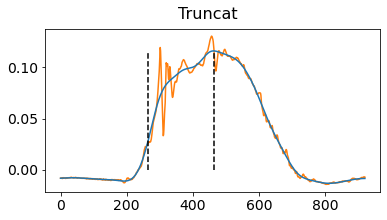


MLSi16F8mLHV7kV - Trial02 - Seg20
Avg. Pressure of zipping = 0.090 (bar), Max. P. = 0.130 (bar) in 0.107 (sec)

(919,)
0.19712747877753709
0.0981078123705227


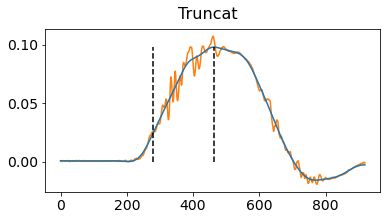


MLSi16F9mLHV7kV - Trial02 - Seg1
Avg. Pressure of zipping = 0.072 (bar), Max. P. = 0.107 (bar) in 0.099 (sec)

(919,)
0.1980095602110131
0.09505260677208895


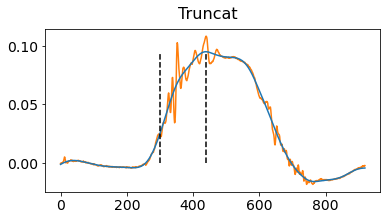


MLSi16F9mLHV7kV - Trial02 - Seg2
Avg. Pressure of zipping = 0.070 (bar), Max. P. = 0.108 (bar) in 0.076 (sec)

(921,)
0.19858692260383376
0.09455890953034098


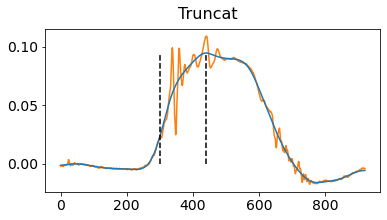


MLSi16F9mLHV7kV - Trial02 - Seg3
Avg. Pressure of zipping = 0.072 (bar), Max. P. = 0.109 (bar) in 0.076 (sec)

(920,)
0.19865107398081383
0.09453084146558037


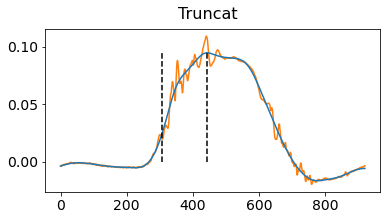


MLSi16F9mLHV7kV - Trial02 - Seg4
Avg. Pressure of zipping = 0.071 (bar), Max. P. = 0.109 (bar) in 0.074 (sec)

(920,)
0.20936435393648617
0.09366718467020642


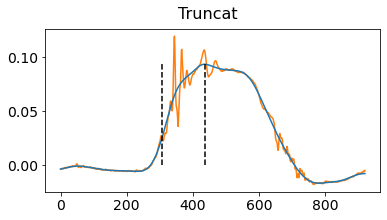


MLSi16F9mLHV7kV - Trial02 - Seg5
Avg. Pressure of zipping = 0.072 (bar), Max. P. = 0.120 (bar) in 0.071 (sec)

(920,)
0.19635766225377618
0.09186783797593333


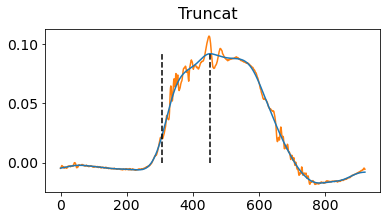


MLSi16F9mLHV7kV - Trial02 - Seg6
Avg. Pressure of zipping = 0.071 (bar), Max. P. = 0.107 (bar) in 0.079 (sec)

(920,)
0.19430481819041384
0.09191870349491042


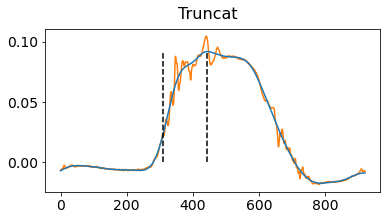


MLSi16F9mLHV7kV - Trial02 - Seg7
Avg. Pressure of zipping = 0.072 (bar), Max. P. = 0.105 (bar) in 0.072 (sec)

(920,)
0.1900227137769939
0.0900378787887443


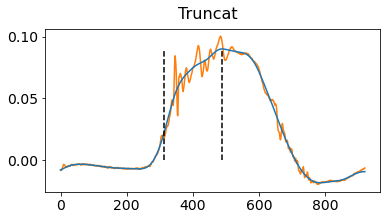


MLSi16F9mLHV7kV - Trial02 - Seg8
Avg. Pressure of zipping = 0.070 (bar), Max. P. = 0.100 (bar) in 0.095 (sec)

(920,)
0.19422462896918874
0.09180330845980349


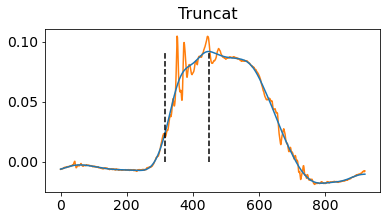


MLSi16F9mLHV7kV - Trial02 - Seg9
Avg. Pressure of zipping = 0.071 (bar), Max. P. = 0.105 (bar) in 0.072 (sec)

(920,)
0.1888038376143725
0.0892070494042838


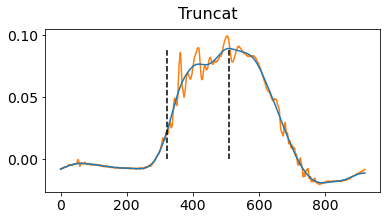


MLSi16F9mLHV7kV - Trial02 - Seg10
Avg. Pressure of zipping = 0.070 (bar), Max. P. = 0.099 (bar) in 0.101 (sec)

(920,)
0.19412840190371863
0.09121921267907583


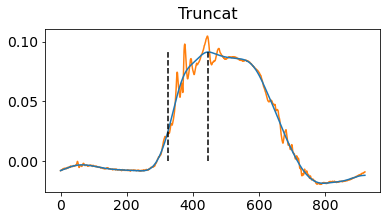


MLSi16F9mLHV7kV - Trial02 - Seg11
Avg. Pressure of zipping = 0.070 (bar), Max. P. = 0.104 (bar) in 0.067 (sec)

(920,)
0.19675860835990167
0.09156110067556701


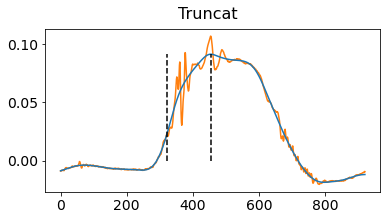


MLSi16F9mLHV7kV - Trial02 - Seg12
Avg. Pressure of zipping = 0.069 (bar), Max. P. = 0.107 (bar) in 0.072 (sec)

(920,)
0.19363122873212305
0.09112838694010712


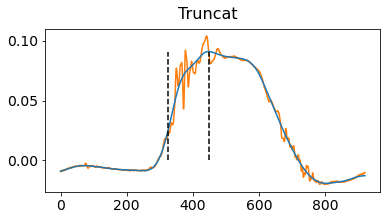


MLSi16F9mLHV7kV - Trial02 - Seg13
Avg. Pressure of zipping = 0.071 (bar), Max. P. = 0.104 (bar) in 0.067 (sec)

(920,)
0.188386853664002
0.08846683373318086


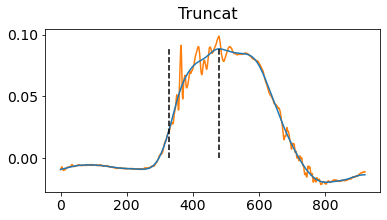


MLSi16F9mLHV7kV - Trial02 - Seg14
Avg. Pressure of zipping = 0.069 (bar), Max. P. = 0.099 (bar) in 0.083 (sec)

(920,)
0.19417651543645367
0.08997366471354105


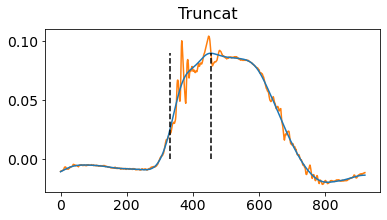


MLSi16F9mLHV7kV - Trial02 - Seg15
Avg. Pressure of zipping = 0.070 (bar), Max. P. = 0.105 (bar) in 0.068 (sec)

(920,)
0.18814628600032673
0.08891468539334398


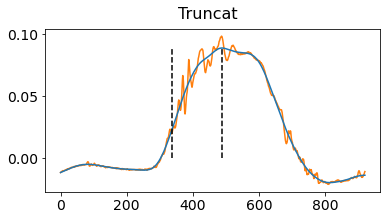


MLSi16F9mLHV7kV - Trial02 - Seg16
Avg. Pressure of zipping = 0.067 (bar), Max. P. = 0.099 (bar) in 0.082 (sec)

(920,)
0.19398406130551346
0.08999965706680334


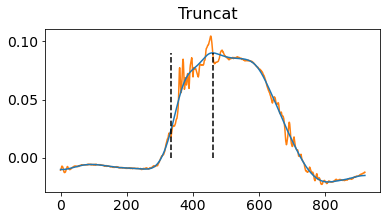


MLSi16F9mLHV7kV - Trial02 - Seg17
Avg. Pressure of zipping = 0.069 (bar), Max. P. = 0.104 (bar) in 0.068 (sec)

(920,)
0.19499444549294961
0.09054424194000081


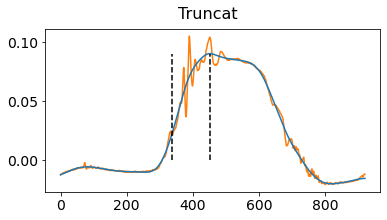


MLSi16F9mLHV7kV - Trial02 - Seg18
Avg. Pressure of zipping = 0.068 (bar), Max. P. = 0.105 (bar) in 0.062 (sec)

(920,)
0.18981422180180865
0.08838061735889229


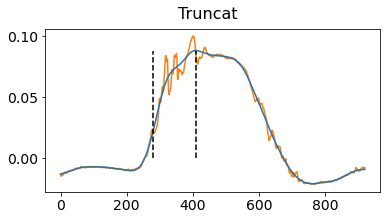


MLSi16F9mLHV7kV - Trial02 - Seg19
Avg. Pressure of zipping = 0.068 (bar), Max. P. = 0.100 (bar) in 0.070 (sec)

(920,)
0.19273310945440203
0.08894611856499161


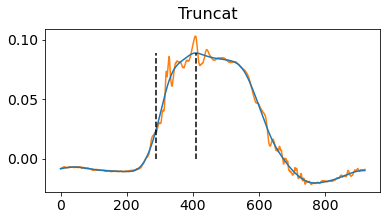


MLSi16F9mLHV7kV - Trial02 - Seg20
Avg. Pressure of zipping = 0.069 (bar), Max. P. = 0.103 (bar) in 0.066 (sec)

(919,)
0.1949784076487046
0.0501426256431394


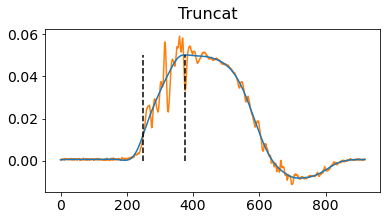


MLSi16F10mLHV7kV - Trial02 - Seg1
Avg. Pressure of zipping = 0.036 (bar), Max. P. = 0.059 (bar) in 0.068 (sec)

(919,)
0.19465765076380423
0.04805575576132454


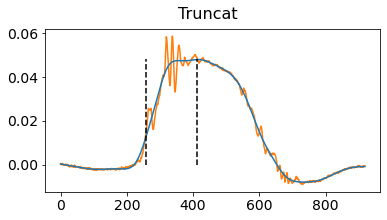


MLSi16F10mLHV7kV - Trial02 - Seg2
Avg. Pressure of zipping = 0.040 (bar), Max. P. = 0.059 (bar) in 0.085 (sec)

(921,)
0.20174637792010242
0.048417760701856105


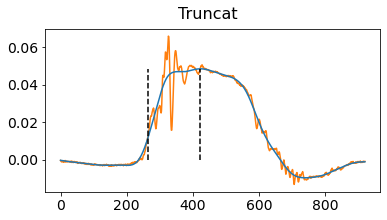


MLSi16F10mLHV7kV - Trial02 - Seg3
Avg. Pressure of zipping = 0.041 (bar), Max. P. = 0.066 (bar) in 0.086 (sec)

(920,)
0.19626143518830608
0.05558278297348787


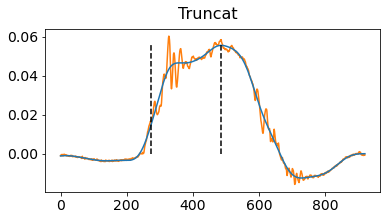


MLSi16F10mLHV7kV - Trial02 - Seg4
Avg. Pressure of zipping = 0.044 (bar), Max. P. = 0.060 (bar) in 0.116 (sec)

(920,)
0.19695106249084188
0.04689928548707581


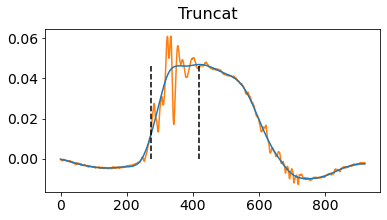


MLSi16F10mLHV7kV - Trial02 - Seg5
Avg. Pressure of zipping = 0.040 (bar), Max. P. = 0.061 (bar) in 0.079 (sec)

(920,)
0.19456142369833412
0.04621011689879506


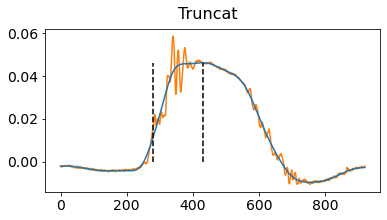


MLSi16F10mLHV7kV - Trial02 - Seg6
Avg. Pressure of zipping = 0.038 (bar), Max. P. = 0.059 (bar) in 0.082 (sec)

(920,)
0.20071995588842123
0.046134836533663875


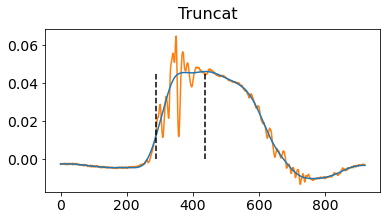


MLSi16F10mLHV7kV - Trial02 - Seg7
Avg. Pressure of zipping = 0.039 (bar), Max. P. = 0.065 (bar) in 0.081 (sec)

(920,)
0.19468972645229426
0.045471125901593246


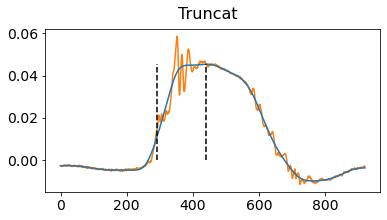


MLSi16F10mLHV7kV - Trial02 - Seg8
Avg. Pressure of zipping = 0.038 (bar), Max. P. = 0.059 (bar) in 0.080 (sec)

(920,)
0.1952189753123799
0.045636279143459385


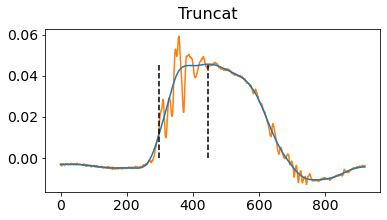


MLSi16F10mLHV7kV - Trial02 - Seg9
Avg. Pressure of zipping = 0.038 (bar), Max. P. = 0.059 (bar) in 0.080 (sec)

(920,)
0.19451331016559906
0.045164658499578264


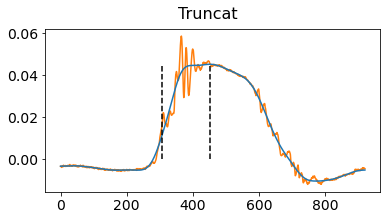


MLSi16F10mLHV7kV - Trial02 - Seg10
Avg. Pressure of zipping = 0.038 (bar), Max. P. = 0.059 (bar) in 0.078 (sec)

(920,)
0.19635766225377618
0.04510330411990124


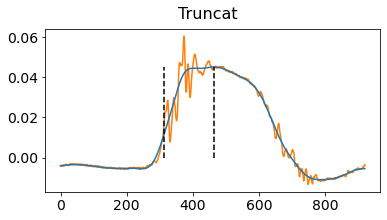


MLSi16F10mLHV7kV - Trial02 - Seg11
Avg. Pressure of zipping = 0.038 (bar), Max. P. = 0.060 (bar) in 0.082 (sec)

(920,)
0.1952350131566249
0.044681828880748536


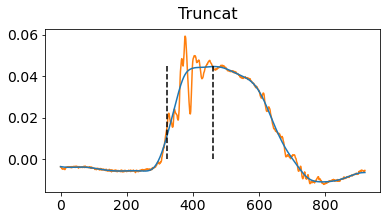


MLSi16F10mLHV7kV - Trial02 - Seg12
Avg. Pressure of zipping = 0.038 (bar), Max. P. = 0.059 (bar) in 0.076 (sec)

(920,)
0.19695106249084188
0.044647561722317014


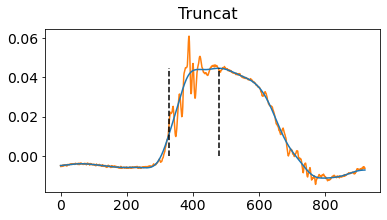


MLSi16F10mLHV7kV - Trial02 - Seg13
Avg. Pressure of zipping = 0.038 (bar), Max. P. = 0.061 (bar) in 0.081 (sec)

(920,)
0.19422462896918874
0.0443276312315814


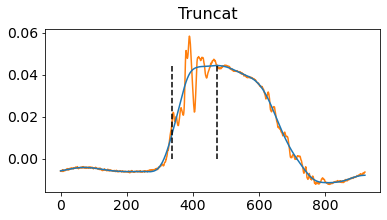


MLSi16F10mLHV7kV - Trial02 - Seg14
Avg. Pressure of zipping = 0.037 (bar), Max. P. = 0.058 (bar) in 0.073 (sec)

(920,)
0.19438500741163892
0.0442153167087424


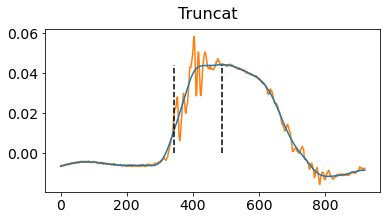


MLSi16F10mLHV7kV - Trial02 - Seg15
Avg. Pressure of zipping = 0.037 (bar), Max. P. = 0.058 (bar) in 0.079 (sec)

(920,)
0.20039919900352085
0.04402439648983347


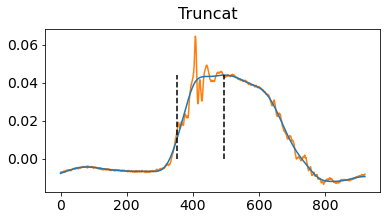


MLSi16F10mLHV7kV - Trial02 - Seg16
Avg. Pressure of zipping = 0.037 (bar), Max. P. = 0.064 (bar) in 0.077 (sec)

(920,)
0.19893975517722418
0.04401624884268421


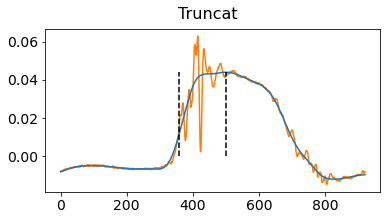


MLSi16F10mLHV7kV - Trial02 - Seg17
Avg. Pressure of zipping = 0.038 (bar), Max. P. = 0.063 (bar) in 0.077 (sec)

(920,)
0.1986189982923238
0.0437063095708175


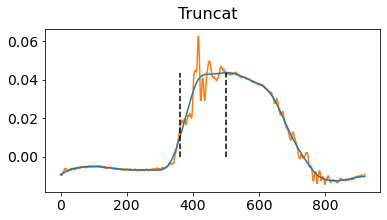


MLSi16F10mLHV7kV - Trial02 - Seg18
Avg. Pressure of zipping = 0.037 (bar), Max. P. = 0.063 (bar) in 0.076 (sec)

(920,)
0.19765672763762268
0.04739841726159352


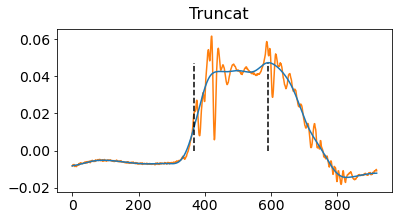


MLSi16F10mLHV7kV - Trial02 - Seg19
Avg. Pressure of zipping = 0.040 (bar), Max. P. = 0.062 (bar) in 0.122 (sec)

(920,)
0.19746427350668247
0.050222172766301115


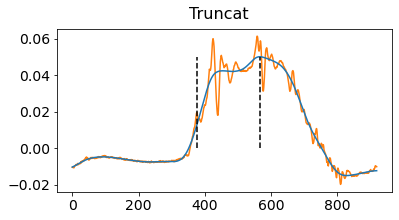


MLSi16F10mLHV7kV - Trial02 - Seg20
Avg. Pressure of zipping = 0.040 (bar), Max. P. = 0.062 (bar) in 0.103 (sec)

(919,)
0.1854198524786736
0.05016500053399159


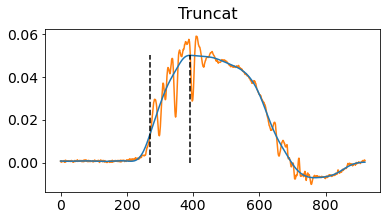


MLSi16F11mLHV7kV - Trial02 - Seg1
Avg. Pressure of zipping = 0.037 (bar), Max. P. = 0.059 (bar) in 0.066 (sec)

(919,)
0.19058403832556955
0.048616550782462964


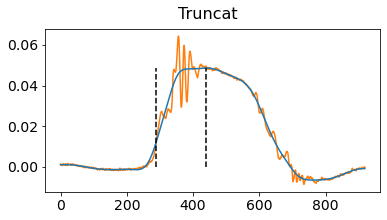


MLSi16F11mLHV7kV - Trial02 - Seg2
Avg. Pressure of zipping = 0.040 (bar), Max. P. = 0.064 (bar) in 0.082 (sec)

(921,)
0.19236423903676658
0.0487209530487388


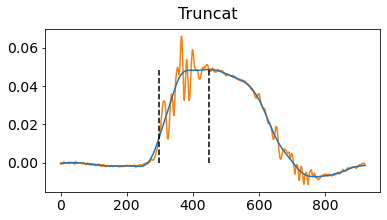


MLSi16F11mLHV7kV - Trial02 - Seg3
Avg. Pressure of zipping = 0.041 (bar), Max. P. = 0.066 (bar) in 0.083 (sec)

(920,)
0.18981422180180865
0.04832873010344277


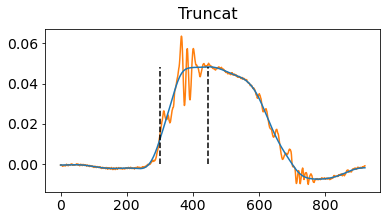


MLSi16F11mLHV7kV - Trial02 - Seg4
Avg. Pressure of zipping = 0.040 (bar), Max. P. = 0.064 (bar) in 0.079 (sec)

(920,)
0.19473783998502933
0.048422257051015716


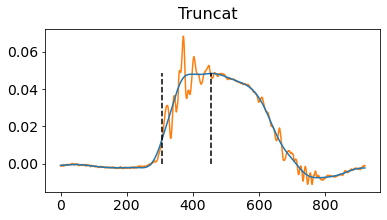


MLSi16F11mLHV7kV - Trial02 - Seg5
Avg. Pressure of zipping = 0.041 (bar), Max. P. = 0.068 (bar) in 0.082 (sec)

(920,)
0.19457746154257916
0.04813946353588888


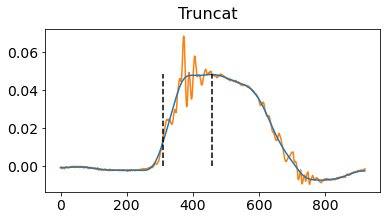


MLSi16F11mLHV7kV - Trial02 - Seg6
Avg. Pressure of zipping = 0.040 (bar), Max. P. = 0.068 (bar) in 0.080 (sec)

(920,)
0.1936793422648581
0.04811408962073993


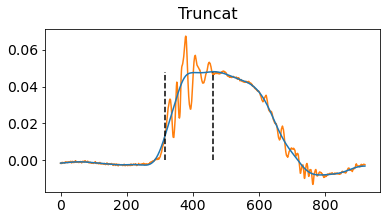


MLSi16F11mLHV7kV - Trial02 - Seg7
Avg. Pressure of zipping = 0.041 (bar), Max. P. = 0.067 (bar) in 0.080 (sec)

(920,)
0.19512274824690978
0.048052148255666255


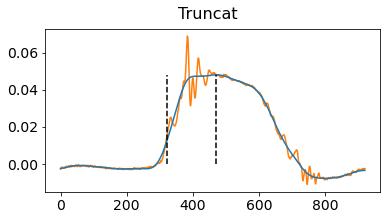


MLSi16F11mLHV7kV - Trial02 - Seg8
Avg. Pressure of zipping = 0.040 (bar), Max. P. = 0.069 (bar) in 0.080 (sec)

(920,)
0.19531520237785
0.047871443658946994


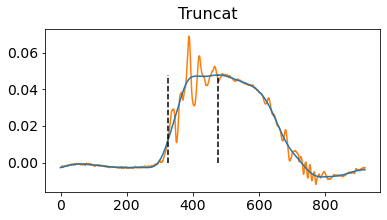


MLSi16F11mLHV7kV - Trial02 - Seg9
Avg. Pressure of zipping = 0.041 (bar), Max. P. = 0.069 (bar) in 0.082 (sec)

(920,)
0.1898462974902987
0.047693856531078854


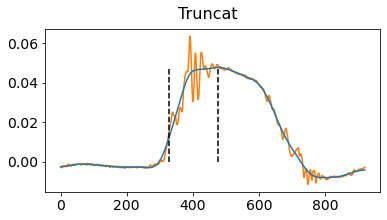


MLSi16F11mLHV7kV - Trial02 - Seg10
Avg. Pressure of zipping = 0.040 (bar), Max. P. = 0.064 (bar) in 0.080 (sec)

(920,)
0.1947057642965393
0.04776819102789437


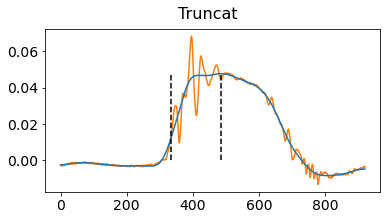


MLSi16F11mLHV7kV - Trial02 - Seg11
Avg. Pressure of zipping = 0.040 (bar), Max. P. = 0.068 (bar) in 0.082 (sec)

(920,)
0.19177083879970092
0.0474772467475825


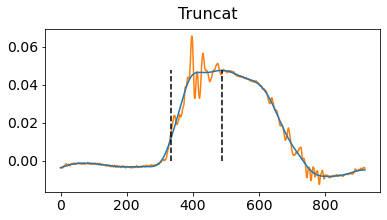


MLSi16F11mLHV7kV - Trial02 - Seg12
Avg. Pressure of zipping = 0.040 (bar), Max. P. = 0.065 (bar) in 0.083 (sec)

(920,)
0.19396802346126843
0.04748345381212926


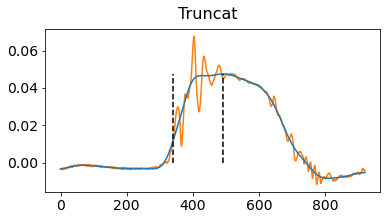


MLSi16F11mLHV7kV - Trial02 - Seg13
Avg. Pressure of zipping = 0.040 (bar), Max. P. = 0.068 (bar) in 0.082 (sec)

(920,)
0.19287745005260717
0.047169159444302666


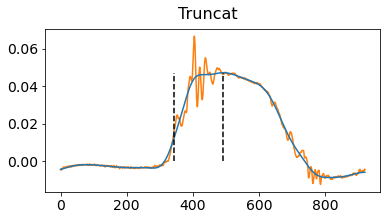


MLSi16F11mLHV7kV - Trial02 - Seg14
Avg. Pressure of zipping = 0.039 (bar), Max. P. = 0.067 (bar) in 0.081 (sec)

(920,)
0.1915142332917806
0.05184243151464488


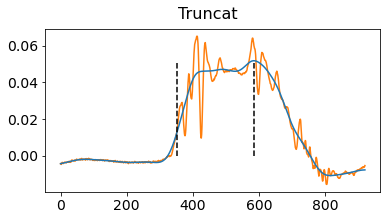


MLSi16F11mLHV7kV - Trial02 - Seg15
Avg. Pressure of zipping = 0.043 (bar), Max. P. = 0.065 (bar) in 0.126 (sec)

(920,)
0.19412840190371863
0.055455159362194695


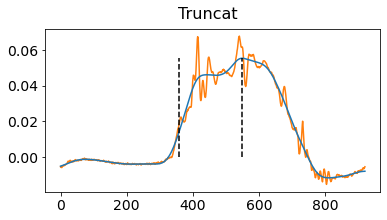


MLSi16F11mLHV7kV - Trial02 - Seg16
Avg. Pressure of zipping = 0.043 (bar), Max. P. = 0.068 (bar) in 0.103 (sec)

(920,)
0.19655011638471642
0.05731307480323447


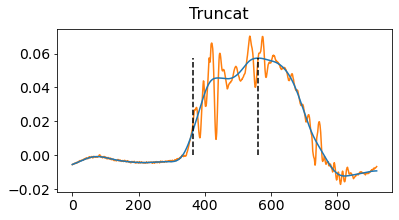


MLSi16F11mLHV7kV - Trial02 - Seg17
Avg. Pressure of zipping = 0.044 (bar), Max. P. = 0.070 (bar) in 0.107 (sec)

(920,)
0.1960208675246308
0.05834823034214506


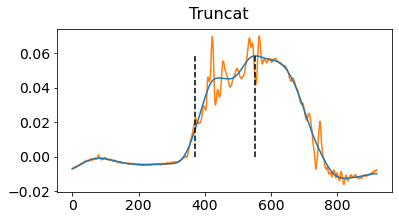


MLSi16F11mLHV7kV - Trial02 - Seg18
Avg. Pressure of zipping = 0.044 (bar), Max. P. = 0.070 (bar) in 0.100 (sec)

(920,)
0.19655011638471642
0.05878763725690406


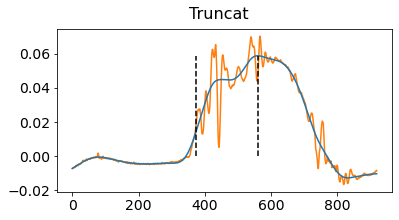


MLSi16F11mLHV7kV - Trial02 - Seg19
Avg. Pressure of zipping = 0.044 (bar), Max. P. = 0.070 (bar) in 0.101 (sec)

(920,)
0.19630954872104114
0.058637222743691736


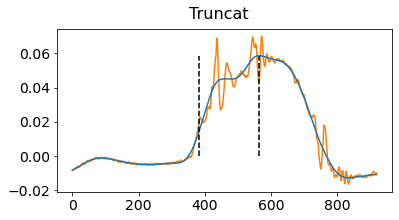


MLSi16F11mLHV7kV - Trial02 - Seg20
Avg. Pressure of zipping = 0.044 (bar), Max. P. = 0.070 (bar) in 0.098 (sec)

(919,)
0.0941805565687635
0.08718833347977478


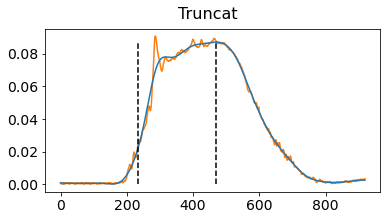


MLSi16F4mLHV7kV - Trial03 - Seg1
Avg. Pressure of zipping = 0.074 (bar), Max. P. = 0.091 (bar) in 0.128 (sec)

(919,)
0.0928013019636919
0.086919592992308


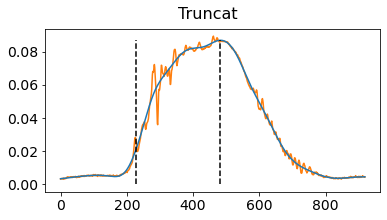


MLSi16F4mLHV7kV - Trial03 - Seg2
Avg. Pressure of zipping = 0.069 (bar), Max. P. = 0.089 (bar) in 0.138 (sec)

(921,)
0.09204752328417604
0.08811110285699253


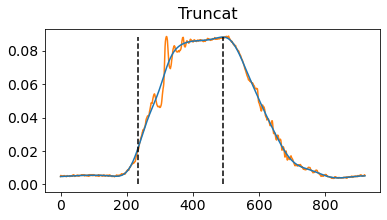


MLSi16F4mLHV7kV - Trial03 - Seg3
Avg. Pressure of zipping = 0.071 (bar), Max. P. = 0.089 (bar) in 0.139 (sec)

(920,)
0.09243243154605647
0.08751666642021669


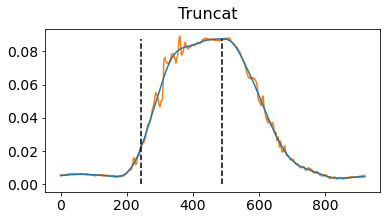


MLSi16F4mLHV7kV - Trial03 - Seg4
Avg. Pressure of zipping = 0.071 (bar), Max. P. = 0.089 (bar) in 0.133 (sec)

(920,)
0.09009090628628377
0.08572548598327517


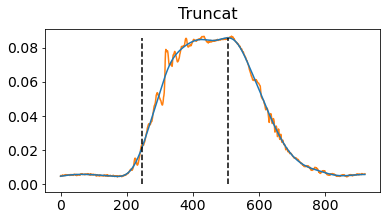


MLSi16F4mLHV7kV - Trial03 - Seg5
Avg. Pressure of zipping = 0.071 (bar), Max. P. = 0.087 (bar) in 0.141 (sec)

(920,)
0.09129374460466017
0.08633930980725127


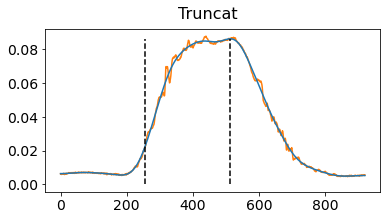


MLSi16F4mLHV7kV - Trial03 - Seg6
Avg. Pressure of zipping = 0.071 (bar), Max. P. = 0.088 (bar) in 0.140 (sec)

(920,)
0.09294564256189707
0.08828635731708084


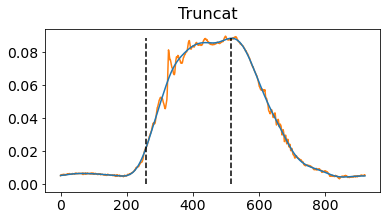


MLSi16F4mLHV7kV - Trial03 - Seg7
Avg. Pressure of zipping = 0.072 (bar), Max. P. = 0.090 (bar) in 0.140 (sec)

(920,)
0.09248054507879153
0.08768912859902506


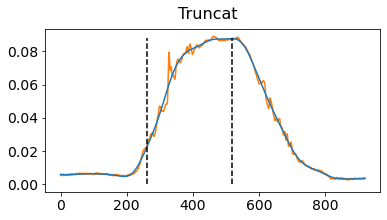


MLSi16F4mLHV7kV - Trial03 - Seg8
Avg. Pressure of zipping = 0.071 (bar), Max. P. = 0.089 (bar) in 0.140 (sec)

(920,)
0.09241639370181146
0.08775550723832856


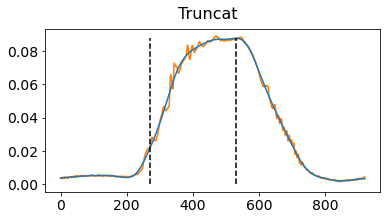


MLSi16F4mLHV7kV - Trial03 - Seg9
Avg. Pressure of zipping = 0.071 (bar), Max. P. = 0.089 (bar) in 0.141 (sec)

(920,)
0.09544754626411996
0.0869247138594258


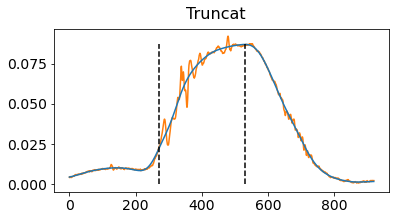


MLSi16F4mLHV7kV - Trial03 - Seg10
Avg. Pressure of zipping = 0.069 (bar), Max. P. = 0.092 (bar) in 0.141 (sec)

(920,)
0.09111732831796496
0.08743151516255568


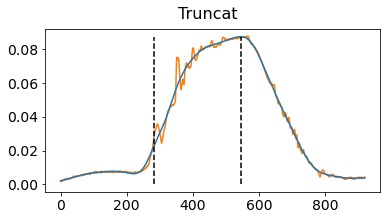


MLSi16F4mLHV7kV - Trial03 - Seg11
Avg. Pressure of zipping = 0.068 (bar), Max. P. = 0.088 (bar) in 0.143 (sec)

(920,)
0.09932870457141442
0.09357562457438001


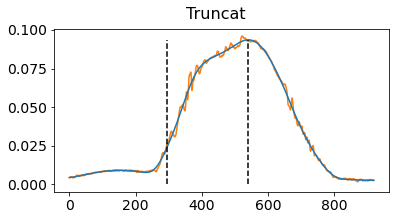


MLSi16F4mLHV7kV - Trial03 - Seg12
Avg. Pressure of zipping = 0.072 (bar), Max. P. = 0.096 (bar) in 0.134 (sec)

(920,)
0.10404383077944986
0.09346791398141135


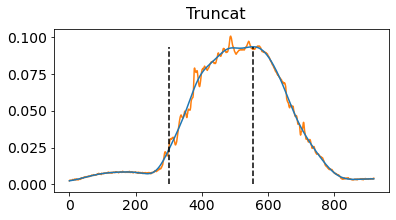


MLSi16F4mLHV7kV - Trial03 - Seg13
Avg. Pressure of zipping = 0.073 (bar), Max. P. = 0.101 (bar) in 0.138 (sec)

(920,)
0.1026164626416432
0.09300860373926448


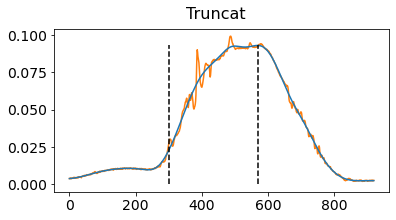


MLSi16F4mLHV7kV - Trial03 - Seg14
Avg. Pressure of zipping = 0.074 (bar), Max. P. = 0.099 (bar) in 0.145 (sec)

(920,)
0.10507025281113104
0.0949261479234143


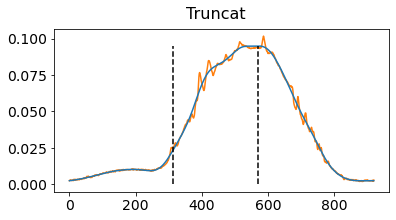


MLSi16F4mLHV7kV - Trial03 - Seg15
Avg. Pressure of zipping = 0.072 (bar), Max. P. = 0.102 (bar) in 0.139 (sec)

(920,)
0.10415609568916498
0.09573843282539282


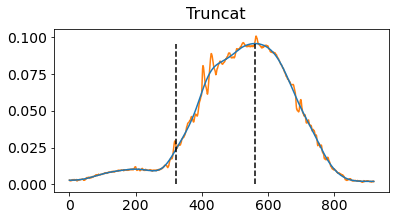


MLSi16F4mLHV7kV - Trial03 - Seg16
Avg. Pressure of zipping = 0.071 (bar), Max. P. = 0.101 (bar) in 0.129 (sec)

(920,)
0.10481364730321074
0.09548251782456807


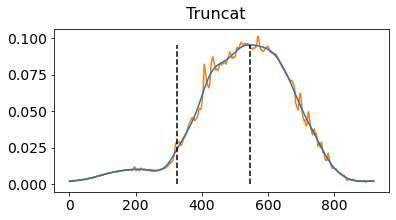


MLSi16F4mLHV7kV - Trial03 - Seg17
Avg. Pressure of zipping = 0.069 (bar), Max. P. = 0.101 (bar) in 0.119 (sec)

(920,)
0.10242400851070299
0.09399502399339771


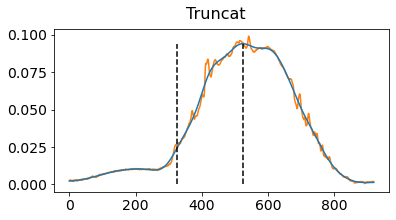


MLSi16F4mLHV7kV - Trial03 - Seg18
Avg. Pressure of zipping = 0.067 (bar), Max. P. = 0.099 (bar) in 0.109 (sec)

(920,)
0.10167022983118712
0.09356136273764631


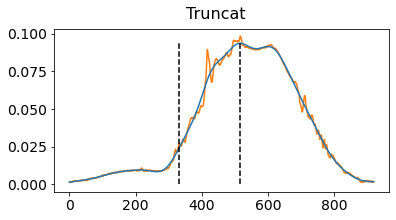


MLSi16F4mLHV7kV - Trial03 - Seg19
Avg. Pressure of zipping = 0.066 (bar), Max. P. = 0.098 (bar) in 0.101 (sec)

(920,)
0.10168626767543214
0.09291240570249831


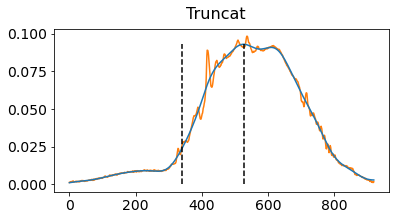


MLSi16F4mLHV7kV - Trial03 - Seg20
Avg. Pressure of zipping = 0.067 (bar), Max. P. = 0.098 (bar) in 0.102 (sec)

(919,)
0.10298533305927864
0.08817813006874294


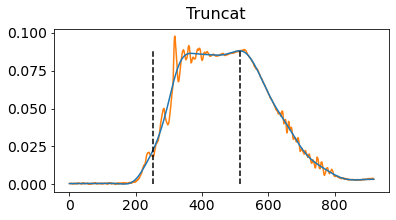


MLSi16F5mLHV7kV - Trial03 - Seg1
Avg. Pressure of zipping = 0.075 (bar), Max. P. = 0.098 (bar) in 0.142 (sec)

(919,)
0.09169469071078562
0.08335928145690452


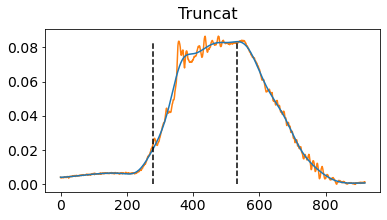


MLSi16F5mLHV7kV - Trial03 - Seg2
Avg. Pressure of zipping = 0.068 (bar), Max. P. = 0.087 (bar) in 0.138 (sec)

(921,)
0.09381168615112806
0.07899436566623029


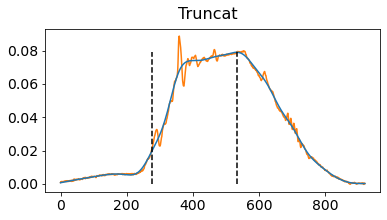


MLSi16F5mLHV7kV - Trial03 - Seg3
Avg. Pressure of zipping = 0.065 (bar), Max. P. = 0.089 (bar) in 0.139 (sec)

(920,)
0.11587975983227349
0.10494710755034577


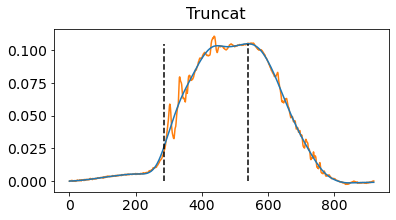


MLSi16F5mLHV7kV - Trial03 - Seg4
Avg. Pressure of zipping = 0.085 (bar), Max. P. = 0.111 (bar) in 0.138 (sec)

(920,)
0.11652127360207423
0.10969420064386107


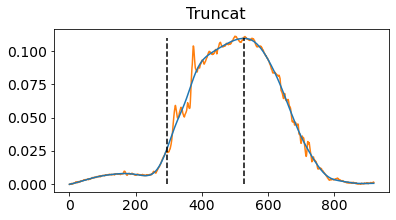


MLSi16F5mLHV7kV - Trial03 - Seg5
Avg. Pressure of zipping = 0.084 (bar), Max. P. = 0.111 (bar) in 0.126 (sec)

(920,)
0.1170184467736698
0.1094343363408107


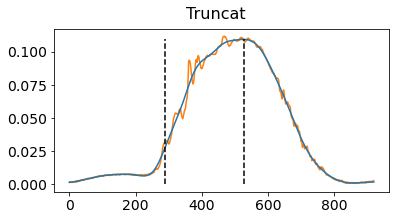


MLSi16F5mLHV7kV - Trial03 - Seg6
Avg. Pressure of zipping = 0.085 (bar), Max. P. = 0.112 (bar) in 0.129 (sec)

(920,)
0.11087595242782772
0.10339475569773872


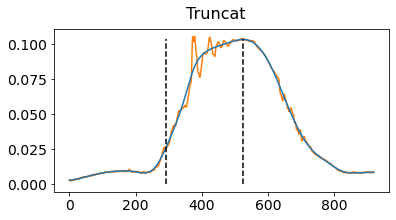


MLSi16F5mLHV7kV - Trial03 - Seg7
Avg. Pressure of zipping = 0.081 (bar), Max. P. = 0.106 (bar) in 0.127 (sec)

(920,)
0.11358634810523585
0.10769131039674948


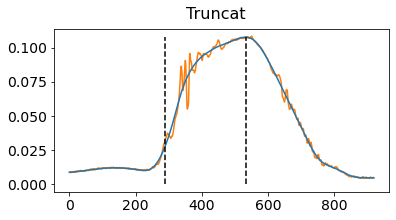


MLSi16F5mLHV7kV - Trial03 - Seg8
Avg. Pressure of zipping = 0.086 (bar), Max. P. = 0.108 (bar) in 0.133 (sec)

(920,)
0.12166942160472516
0.11019798478395793


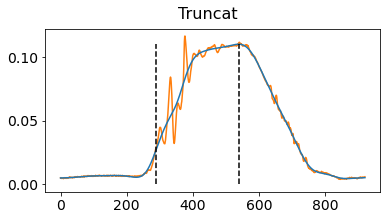


MLSi16F5mLHV7kV - Trial03 - Seg9
Avg. Pressure of zipping = 0.087 (bar), Max. P. = 0.117 (bar) in 0.135 (sec)

(920,)
0.1251015202731591
0.11661795080794002


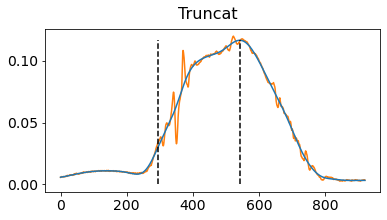


MLSi16F5mLHV7kV - Trial03 - Seg10
Avg. Pressure of zipping = 0.088 (bar), Max. P. = 0.120 (bar) in 0.135 (sec)

(920,)
0.12540623931381445
0.1173246320863224


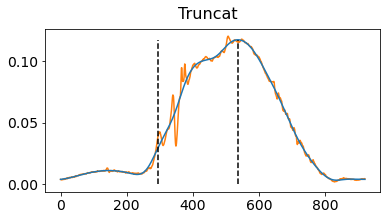


MLSi16F5mLHV7kV - Trial03 - Seg11
Avg. Pressure of zipping = 0.086 (bar), Max. P. = 0.120 (bar) in 0.131 (sec)

(920,)
0.12498925536344398
0.1168750184638343


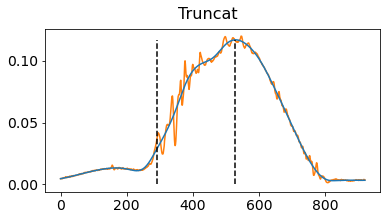


MLSi16F5mLHV7kV - Trial03 - Seg12
Avg. Pressure of zipping = 0.084 (bar), Max. P. = 0.120 (bar) in 0.128 (sec)

(920,)
0.1253581257810794
0.11708826082042881


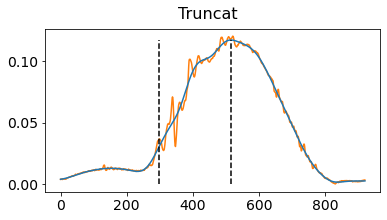


MLSi16F5mLHV7kV - Trial03 - Seg13
Avg. Pressure of zipping = 0.083 (bar), Max. P. = 0.120 (bar) in 0.118 (sec)

(920,)
0.12556661775626465
0.11747098970842285


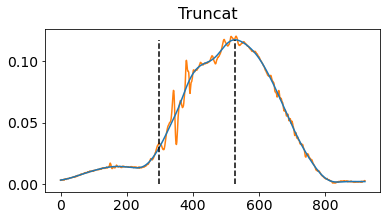


MLSi16F5mLHV7kV - Trial03 - Seg14
Avg. Pressure of zipping = 0.084 (bar), Max. P. = 0.120 (bar) in 0.125 (sec)

(920,)
0.12348169800441225
0.1163167594924881


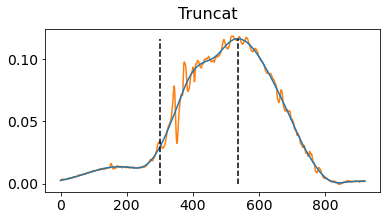


MLSi16F5mLHV7kV - Trial03 - Seg15
Avg. Pressure of zipping = 0.085 (bar), Max. P. = 0.118 (bar) in 0.128 (sec)

(920,)
0.12386660626629269
0.11599805045409306


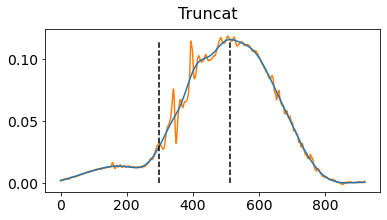


MLSi16F5mLHV7kV - Trial03 - Seg16
Avg. Pressure of zipping = 0.082 (bar), Max. P. = 0.119 (bar) in 0.117 (sec)

(920,)
0.12357792506988236
0.11519006604136313


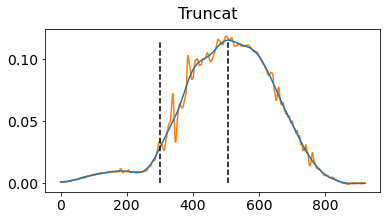


MLSi16F5mLHV7kV - Trial03 - Seg17
Avg. Pressure of zipping = 0.082 (bar), Max. P. = 0.118 (bar) in 0.111 (sec)

(920,)
0.12266376794791631
0.11282380177440077


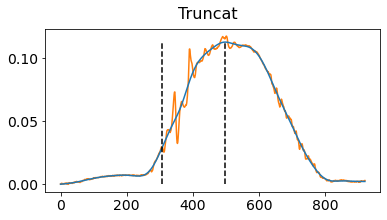


MLSi16F5mLHV7kV - Trial03 - Seg18
Avg. Pressure of zipping = 0.081 (bar), Max. P. = 0.118 (bar) in 0.104 (sec)

(920,)
0.12381849273355763
0.11564215450810807


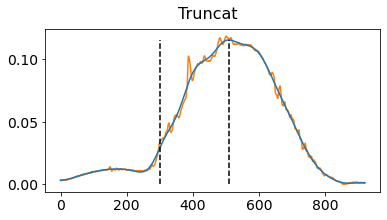


MLSi16F5mLHV7kV - Trial03 - Seg19
Avg. Pressure of zipping = 0.082 (bar), Max. P. = 0.119 (bar) in 0.113 (sec)

(920,)
0.12314490327526685
0.11364769456779035


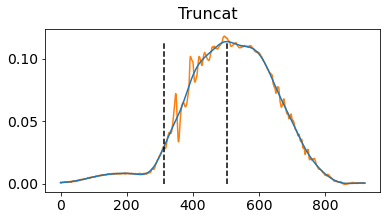


MLSi16F5mLHV7kV - Trial03 - Seg20
Avg. Pressure of zipping = 0.082 (bar), Max. P. = 0.118 (bar) in 0.104 (sec)

(919,)
0.15308755848071634
0.13670718636698262


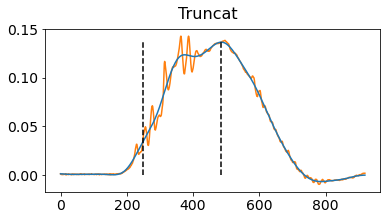


MLSi16F6mLHV7kV - Trial03 - Seg1
Avg. Pressure of zipping = 0.104 (bar), Max. P. = 0.143 (bar) in 0.128 (sec)

(919,)
0.16123478335718575
0.1291896798504496


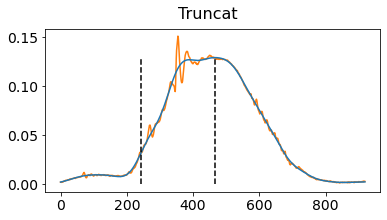


MLSi16F6mLHV7kV - Trial03 - Seg2
Avg. Pressure of zipping = 0.099 (bar), Max. P. = 0.151 (bar) in 0.121 (sec)

(921,)
0.14936677861587205
0.11215614002392552


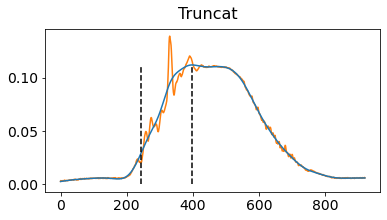


MLSi16F6mLHV7kV - Trial03 - Seg3
Avg. Pressure of zipping = 0.080 (bar), Max. P. = 0.139 (bar) in 0.085 (sec)

(920,)
0.13015344121033992
0.11069571215814245


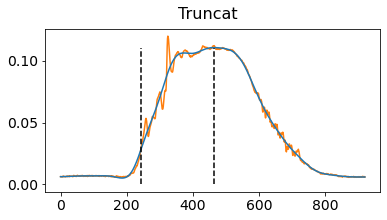


MLSi16F6mLHV7kV - Trial03 - Seg4
Avg. Pressure of zipping = 0.089 (bar), Max. P. = 0.120 (bar) in 0.120 (sec)

(920,)
0.14952715705832226
0.13013516990755028


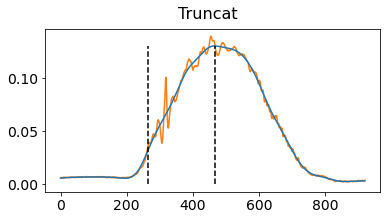


MLSi16F6mLHV7kV - Trial03 - Seg5
Avg. Pressure of zipping = 0.092 (bar), Max. P. = 0.139 (bar) in 0.109 (sec)

(920,)
0.14542146893159752
0.12630223003166136


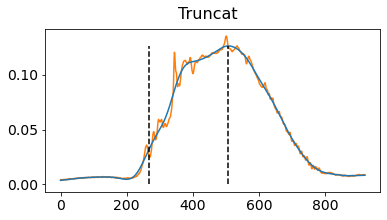


MLSi16F6mLHV7kV - Trial03 - Seg6
Avg. Pressure of zipping = 0.095 (bar), Max. P. = 0.135 (bar) in 0.130 (sec)

(920,)
0.13217420958521225
0.1168152418682504


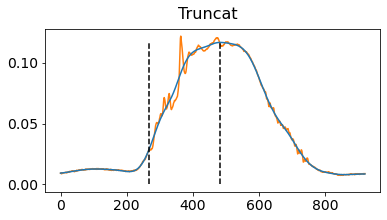


MLSi16F6mLHV7kV - Trial03 - Seg7
Avg. Pressure of zipping = 0.088 (bar), Max. P. = 0.122 (bar) in 0.116 (sec)

(920,)
0.12819682421244769
0.1097463396750813


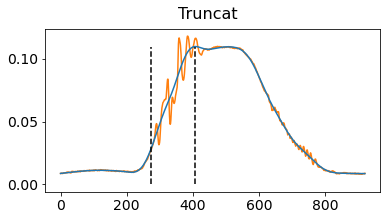


MLSi16F6mLHV7kV - Trial03 - Seg8
Avg. Pressure of zipping = 0.075 (bar), Max. P. = 0.118 (bar) in 0.073 (sec)

(920,)
0.12729870493472664
0.10987193077349434


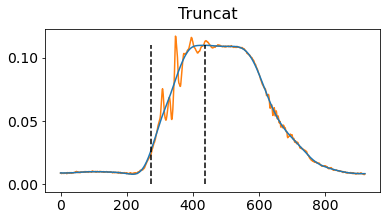


MLSi16F6mLHV7kV - Trial03 - Seg9
Avg. Pressure of zipping = 0.081 (bar), Max. P. = 0.117 (bar) in 0.087 (sec)

(920,)
0.12810059714697755
0.1123476895122525


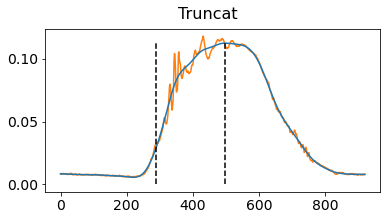


MLSi16F6mLHV7kV - Trial03 - Seg10
Avg. Pressure of zipping = 0.089 (bar), Max. P. = 0.118 (bar) in 0.114 (sec)

(920,)
0.13283176119925802
0.11433670232709893


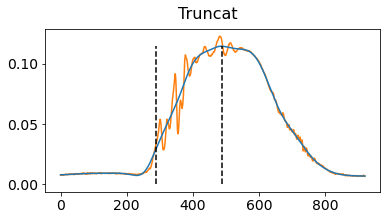


MLSi16F6mLHV7kV - Trial03 - Seg11
Avg. Pressure of zipping = 0.084 (bar), Max. P. = 0.123 (bar) in 0.108 (sec)

(920,)
0.1312760903074912
0.11343345408844649


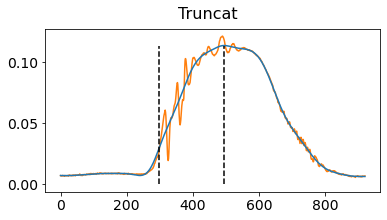


MLSi16F6mLHV7kV - Trial03 - Seg12
Avg. Pressure of zipping = 0.084 (bar), Max. P. = 0.121 (bar) in 0.108 (sec)

(920,)
0.13895821770085506
0.11016336002674694


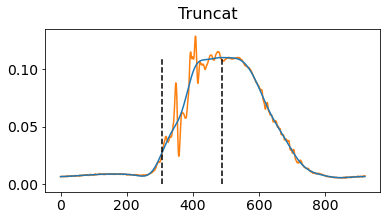


MLSi16F6mLHV7kV - Trial03 - Seg13
Avg. Pressure of zipping = 0.083 (bar), Max. P. = 0.129 (bar) in 0.098 (sec)

(920,)
0.15404982913541745
0.11071586002829814


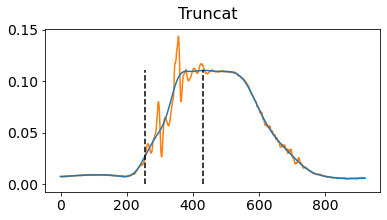


MLSi16F6mLHV7kV - Trial03 - Seg14
Avg. Pressure of zipping = 0.082 (bar), Max. P. = 0.144 (bar) in 0.095 (sec)

(920,)
0.153664920873537
0.11054781263370694


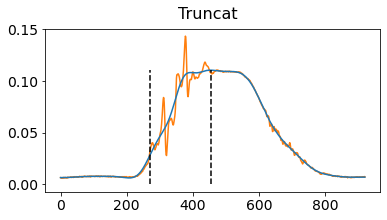


MLSi16F6mLHV7kV - Trial03 - Seg15
Avg. Pressure of zipping = 0.083 (bar), Max. P. = 0.143 (bar) in 0.100 (sec)

(920,)
0.1531356720134514
0.11003795681514447


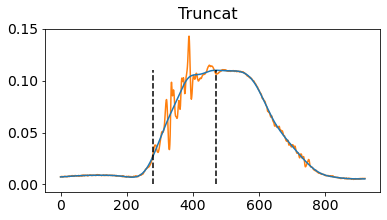


MLSi16F6mLHV7kV - Trial03 - Seg16
Avg. Pressure of zipping = 0.085 (bar), Max. P. = 0.143 (bar) in 0.103 (sec)

(920,)
0.15902156085137317
0.10992278503613853


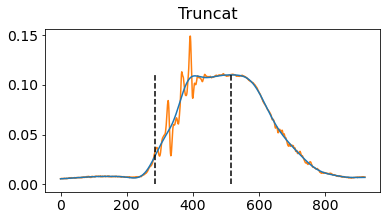


MLSi16F6mLHV7kV - Trial03 - Seg17
Avg. Pressure of zipping = 0.089 (bar), Max. P. = 0.149 (bar) in 0.126 (sec)

(920,)
0.1512271685482942
0.10897706379437522


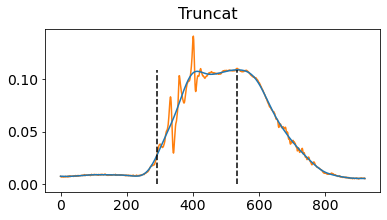


MLSi16F6mLHV7kV - Trial03 - Seg18
Avg. Pressure of zipping = 0.089 (bar), Max. P. = 0.141 (bar) in 0.132 (sec)

(920,)
0.15769041977903664
0.10898310676161987


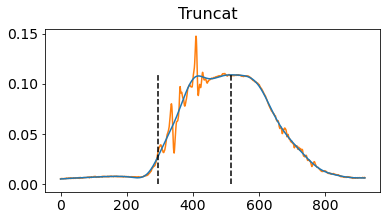


MLSi16F6mLHV7kV - Trial03 - Seg19
Avg. Pressure of zipping = 0.088 (bar), Max. P. = 0.148 (bar) in 0.121 (sec)

(920,)
0.14859696209211118
0.10988662719121645


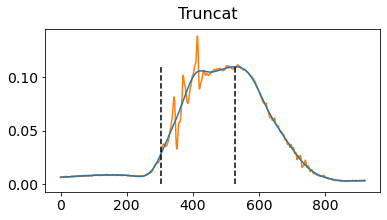


MLSi16F6mLHV7kV - Trial03 - Seg20
Avg. Pressure of zipping = 0.088 (bar), Max. P. = 0.138 (bar) in 0.123 (sec)

(919,)
0.1592942042035385
0.1268497897369407


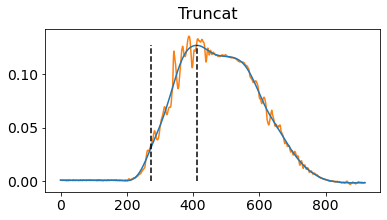


MLSi16F7mLHV7kV - Trial03 - Seg1
Avg. Pressure of zipping = 0.088 (bar), Max. P. = 0.135 (bar) in 0.074 (sec)

(919,)
0.1747546860557363
0.11681780591185623


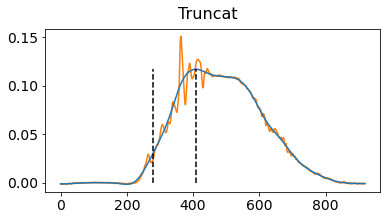


MLSi16F7mLHV7kV - Trial03 - Seg2
Avg. Pressure of zipping = 0.080 (bar), Max. P. = 0.151 (bar) in 0.071 (sec)

(921,)
0.15789891175422188
0.1116864926522807


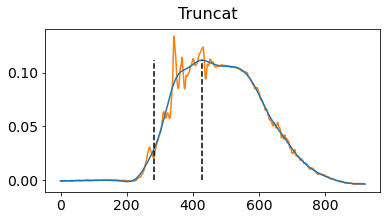


MLSi16F7mLHV7kV - Trial03 - Seg3
Avg. Pressure of zipping = 0.085 (bar), Max. P. = 0.134 (bar) in 0.079 (sec)

(920,)
0.1489658325097466
0.11669427315565942


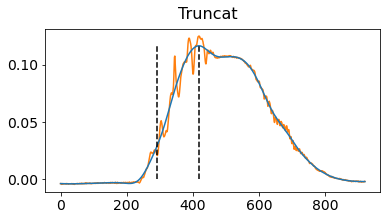


MLSi16F7mLHV7kV - Trial03 - Seg4
Avg. Pressure of zipping = 0.082 (bar), Max. P. = 0.125 (bar) in 0.068 (sec)

(920,)
0.14771488065863517
0.11168961938550515


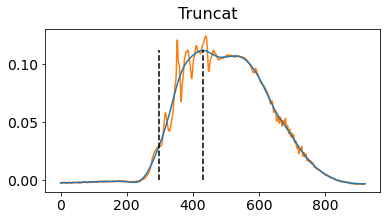


MLSi16F7mLHV7kV - Trial03 - Seg5
Avg. Pressure of zipping = 0.081 (bar), Max. P. = 0.124 (bar) in 0.072 (sec)

(920,)
0.17929339597707653
0.12225646307400795


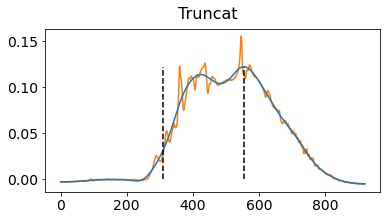


MLSi16F7mLHV7kV - Trial03 - Seg6
Avg. Pressure of zipping = 0.098 (bar), Max. P. = 0.155 (bar) in 0.133 (sec)

(920,)
0.18511513343801825
0.12403052881521215


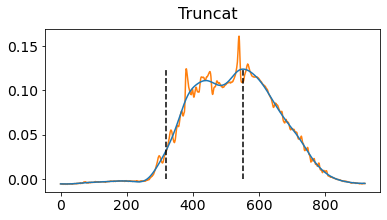


MLSi16F7mLHV7kV - Trial03 - Seg7
Avg. Pressure of zipping = 0.097 (bar), Max. P. = 0.161 (bar) in 0.127 (sec)

(920,)
0.18651042588733485
0.12393001211122723


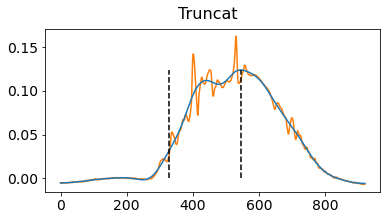


MLSi16F7mLHV7kV - Trial03 - Seg8
Avg. Pressure of zipping = 0.095 (bar), Max. P. = 0.163 (bar) in 0.118 (sec)

(920,)
0.1888038376143725
0.12554748713648303


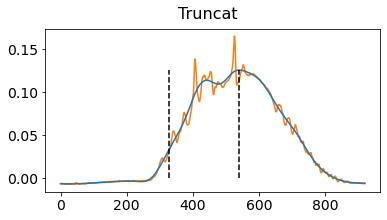


MLSi16F7mLHV7kV - Trial03 - Seg9
Avg. Pressure of zipping = 0.095 (bar), Max. P. = 0.165 (bar) in 0.116 (sec)

(920,)
0.18856326995069722
0.12539411643028164


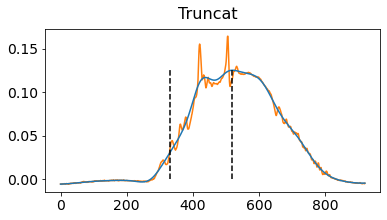


MLSi16F7mLHV7kV - Trial03 - Seg10
Avg. Pressure of zipping = 0.094 (bar), Max. P. = 0.165 (bar) in 0.102 (sec)

(920,)
0.18841892935249205
0.12550644377396541


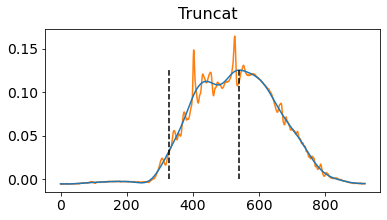


MLSi16F7mLHV7kV - Trial03 - Seg11
Avg. Pressure of zipping = 0.095 (bar), Max. P. = 0.165 (bar) in 0.116 (sec)

(920,)
0.1881943995330618
0.12563722613929998


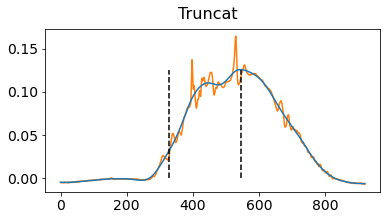


MLSi16F7mLHV7kV - Trial03 - Seg12
Avg. Pressure of zipping = 0.095 (bar), Max. P. = 0.164 (bar) in 0.117 (sec)

(920,)
0.17247731217294368
0.11180439414852325


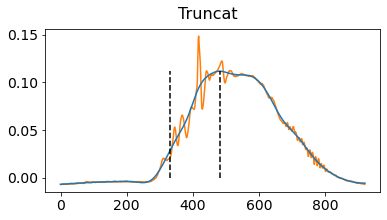


MLSi16F7mLHV7kV - Trial03 - Seg13
Avg. Pressure of zipping = 0.079 (bar), Max. P. = 0.149 (bar) in 0.082 (sec)

(920,)
0.17714432484824405
0.12355312526265577


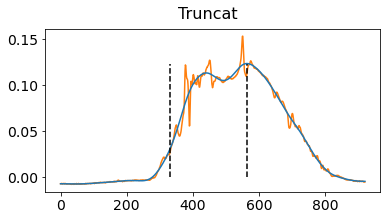


MLSi16F7mLHV7kV - Trial03 - Seg14
Avg. Pressure of zipping = 0.098 (bar), Max. P. = 0.153 (bar) in 0.126 (sec)

(920,)
0.18774533989420128
0.12541770006305292


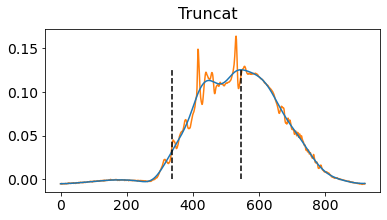


MLSi16F7mLHV7kV - Trial03 - Seg15
Avg. Pressure of zipping = 0.094 (bar), Max. P. = 0.164 (bar) in 0.114 (sec)

(920,)
0.18468211164340276
0.12417197047888481


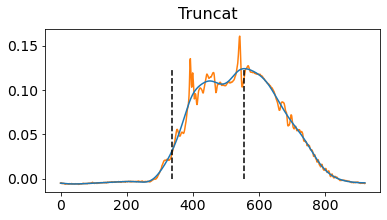


MLSi16F7mLHV7kV - Trial03 - Seg16
Avg. Pressure of zipping = 0.097 (bar), Max. P. = 0.161 (bar) in 0.118 (sec)

(920,)
0.18930101078596806
0.12644220525710922


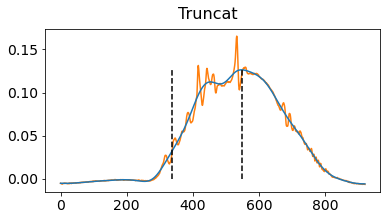


MLSi16F7mLHV7kV - Trial03 - Seg17
Avg. Pressure of zipping = 0.094 (bar), Max. P. = 0.165 (bar) in 0.115 (sec)

(920,)
0.18636608528912968
0.12440986016452238


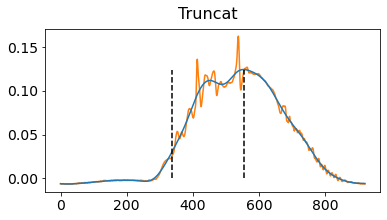


MLSi16F7mLHV7kV - Trial03 - Seg18
Avg. Pressure of zipping = 0.094 (bar), Max. P. = 0.163 (bar) in 0.117 (sec)

(920,)
0.18997460024425883
0.12551333163487302


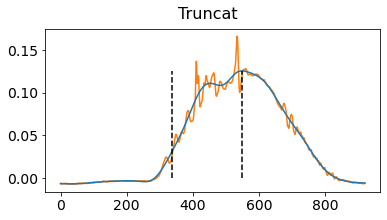


MLSi16F7mLHV7kV - Trial03 - Seg19
Avg. Pressure of zipping = 0.095 (bar), Max. P. = 0.166 (bar) in 0.115 (sec)

(920,)
0.18809817246759167
0.12402600754239118


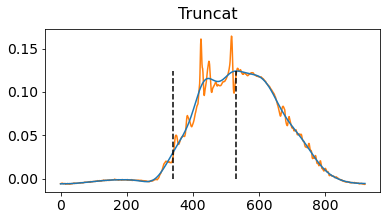


MLSi16F7mLHV7kV - Trial03 - Seg20
Avg. Pressure of zipping = 0.093 (bar), Max. P. = 0.164 (bar) in 0.103 (sec)

(919,)
0.17669526520938356
0.10742001100413881


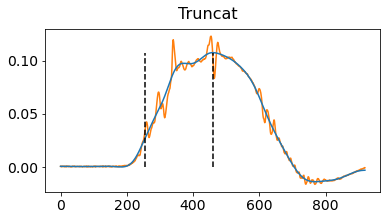


MLSi16F8mLHV7kV - Trial03 - Seg1
Avg. Pressure of zipping = 0.082 (bar), Max. P. = 0.123 (bar) in 0.111 (sec)

(919,)
0.18065661273790312
0.10563460262064595


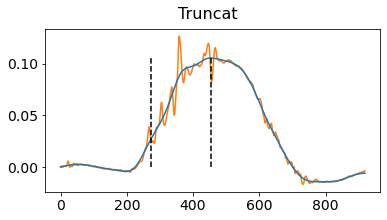


MLSi16F8mLHV7kV - Trial03 - Seg2
Avg. Pressure of zipping = 0.078 (bar), Max. P. = 0.127 (bar) in 0.098 (sec)

(921,)
0.18384814374266178
0.11433784461206384


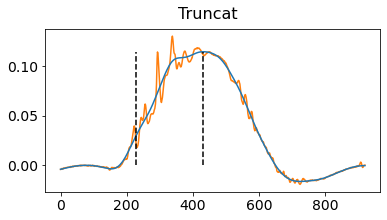


MLSi16F8mLHV7kV - Trial03 - Seg3
Avg. Pressure of zipping = 0.086 (bar), Max. P. = 0.130 (bar) in 0.111 (sec)

(920,)
0.19613313243434594
0.12307642028743415


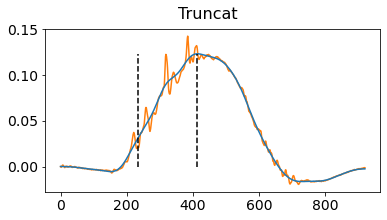


MLSi16F8mLHV7kV - Trial03 - Seg4
Avg. Pressure of zipping = 0.085 (bar), Max. P. = 0.142 (bar) in 0.097 (sec)

(920,)
0.1769999842500389
0.1088995056924052


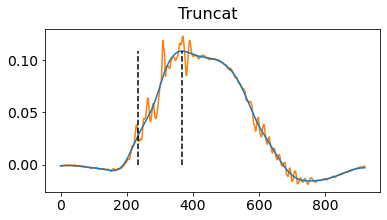


MLSi16F8mLHV7kV - Trial03 - Seg5
Avg. Pressure of zipping = 0.073 (bar), Max. P. = 0.123 (bar) in 0.072 (sec)

(920,)
0.18554815523263374
0.11807901292245834


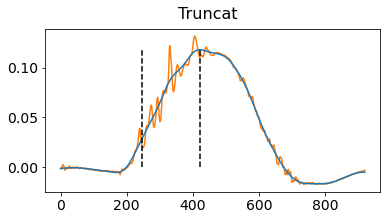


MLSi16F8mLHV7kV - Trial03 - Seg6
Avg. Pressure of zipping = 0.082 (bar), Max. P. = 0.132 (bar) in 0.094 (sec)

(920,)
0.19457746154257916
0.12305054391175166


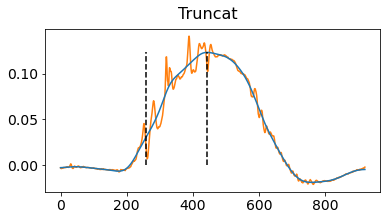


MLSi16F8mLHV7kV - Trial03 - Seg7
Avg. Pressure of zipping = 0.089 (bar), Max. P. = 0.141 (bar) in 0.100 (sec)

(920,)
0.19762465194913265
0.12622773210621388


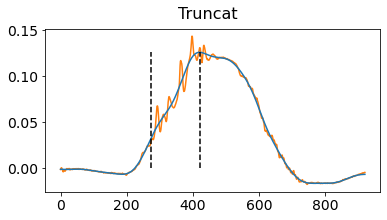


MLSi16F8mLHV7kV - Trial03 - Seg8
Avg. Pressure of zipping = 0.082 (bar), Max. P. = 0.144 (bar) in 0.080 (sec)

(920,)
0.20570772544862195
0.11912818963025495


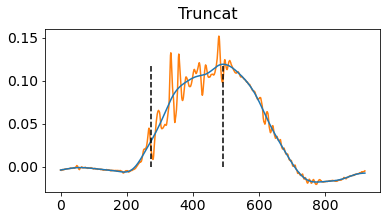


MLSi16F8mLHV7kV - Trial03 - Seg9
Avg. Pressure of zipping = 0.089 (bar), Max. P. = 0.152 (bar) in 0.118 (sec)

(920,)
0.19962938247975998
0.12330862703716797


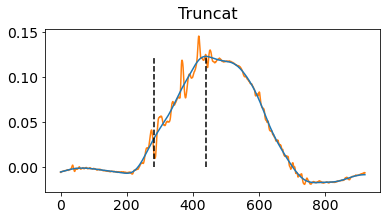


MLSi16F8mLHV7kV - Trial03 - Seg10
Avg. Pressure of zipping = 0.081 (bar), Max. P. = 0.146 (bar) in 0.086 (sec)

(920,)
0.20168222654312232
0.12327143447537572


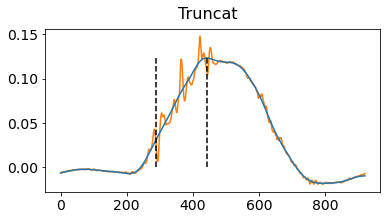


MLSi16F8mLHV7kV - Trial03 - Seg11
Avg. Pressure of zipping = 0.083 (bar), Max. P. = 0.148 (bar) in 0.083 (sec)

(920,)
0.1972237058430072
0.12310666011164784


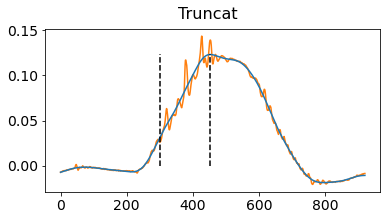


MLSi16F8mLHV7kV - Trial03 - Seg12
Avg. Pressure of zipping = 0.082 (bar), Max. P. = 0.143 (bar) in 0.083 (sec)

(920,)
0.2065096176608729
0.12533933256594282


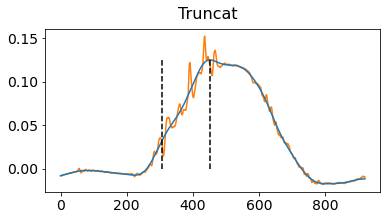


MLSi16F8mLHV7kV - Trial03 - Seg13
Avg. Pressure of zipping = 0.081 (bar), Max. P. = 0.153 (bar) in 0.079 (sec)

(920,)
0.20246808091112822
0.12288363823258941


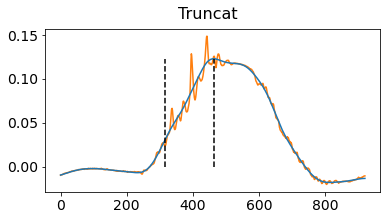


MLSi16F8mLHV7kV - Trial03 - Seg14
Avg. Pressure of zipping = 0.081 (bar), Max. P. = 0.149 (bar) in 0.079 (sec)

(920,)
0.20003032858588543
0.1224909032918601


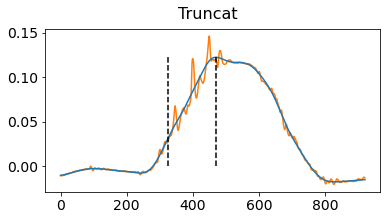


MLSi16F8mLHV7kV - Trial03 - Seg15
Avg. Pressure of zipping = 0.082 (bar), Max. P. = 0.146 (bar) in 0.079 (sec)

(920,)
0.20031900978229575
0.1231220021738263


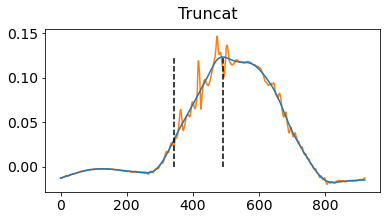


MLSi16F8mLHV7kV - Trial03 - Seg16
Avg. Pressure of zipping = 0.082 (bar), Max. P. = 0.147 (bar) in 0.079 (sec)

(920,)
0.19831427925166845
0.12257001878592866


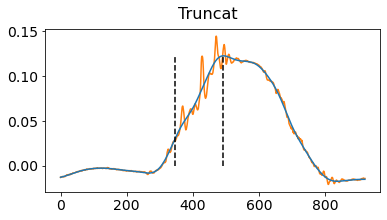


MLSi16F8mLHV7kV - Trial03 - Seg17
Avg. Pressure of zipping = 0.081 (bar), Max. P. = 0.145 (bar) in 0.079 (sec)

(920,)
0.19946900403730977
0.12178178899753825


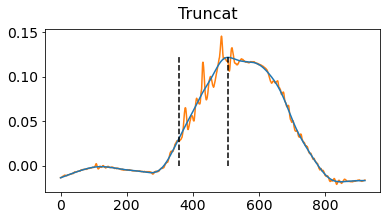


MLSi16F8mLHV7kV - Trial03 - Seg18
Avg. Pressure of zipping = 0.082 (bar), Max. P. = 0.146 (bar) in 0.081 (sec)

(920,)
0.2009605235520965
0.1224688043741178


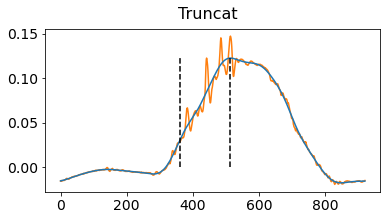


MLSi16F8mLHV7kV - Trial03 - Seg19
Avg. Pressure of zipping = 0.082 (bar), Max. P. = 0.147 (bar) in 0.083 (sec)

(920,)
0.19796144667827803
0.12090638939158826


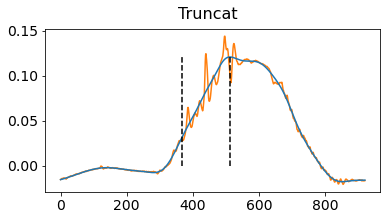


MLSi16F8mLHV7kV - Trial03 - Seg20
Avg. Pressure of zipping = 0.081 (bar), Max. P. = 0.144 (bar) in 0.079 (sec)

(919,)
0.20564357407164188
0.1035054338815699


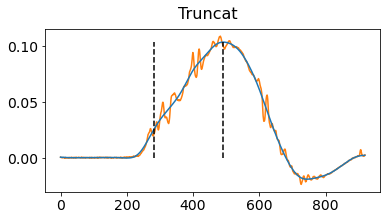


MLSi16F9mLHV7kV - Trial03 - Seg1
Avg. Pressure of zipping = 0.070 (bar), Max. P. = 0.109 (bar) in 0.114 (sec)

(919,)
0.19475387782927434
0.08882784911453463


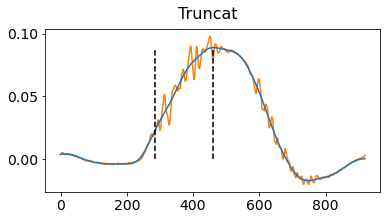


MLSi16F9mLHV7kV - Trial03 - Seg2
Avg. Pressure of zipping = 0.063 (bar), Max. P. = 0.098 (bar) in 0.096 (sec)

(921,)
0.1962774730325511
0.08974261688533365


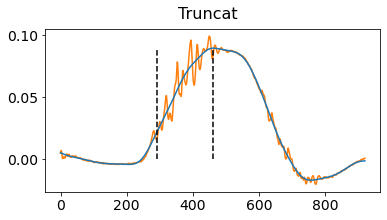


MLSi16F9mLHV7kV - Trial03 - Seg3
Avg. Pressure of zipping = 0.064 (bar), Max. P. = 0.099 (bar) in 0.092 (sec)

(920,)
0.19135385484933043
0.08720213450645518


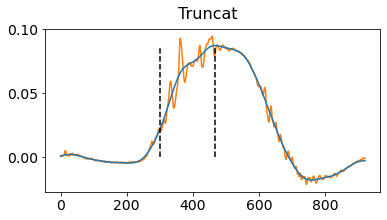


MLSi16F9mLHV7kV - Trial03 - Seg4
Avg. Pressure of zipping = 0.066 (bar), Max. P. = 0.095 (bar) in 0.090 (sec)

(920,)
0.19834635494015848
0.09817288855509547


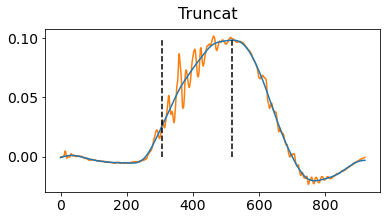


MLSi16F9mLHV7kV - Trial03 - Seg5
Avg. Pressure of zipping = 0.074 (bar), Max. P. = 0.102 (bar) in 0.116 (sec)

(920,)
0.2014737345679371
0.09906330628949424


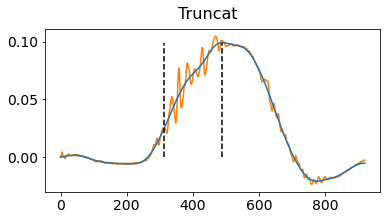


MLSi16F9mLHV7kV - Trial03 - Seg6
Avg. Pressure of zipping = 0.070 (bar), Max. P. = 0.105 (bar) in 0.095 (sec)

(920,)
0.2065096176608729
0.1008143117070076


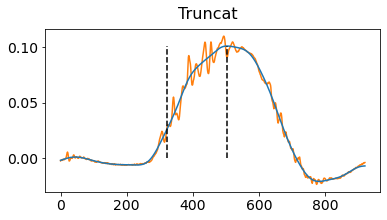


MLSi16F9mLHV7kV - Trial03 - Seg7
Avg. Pressure of zipping = 0.075 (bar), Max. P. = 0.110 (bar) in 0.099 (sec)

(920,)
0.2071190557421836
0.10017566437097171


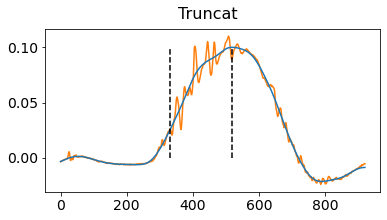


MLSi16F9mLHV7kV - Trial03 - Seg8
Avg. Pressure of zipping = 0.074 (bar), Max. P. = 0.110 (bar) in 0.102 (sec)

(920,)
0.20699075298822345
0.10121940847265805


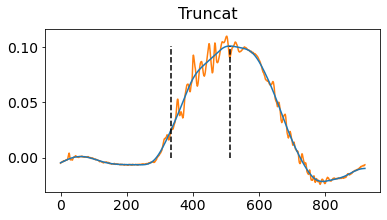


MLSi16F9mLHV7kV - Trial03 - Seg9
Avg. Pressure of zipping = 0.074 (bar), Max. P. = 0.110 (bar) in 0.096 (sec)

(920,)
0.2051945144327814
0.0995199559836883


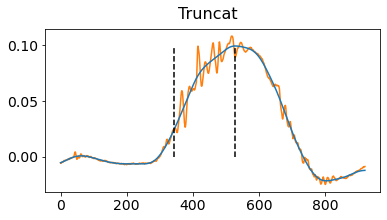


MLSi16F9mLHV7kV - Trial03 - Seg10
Avg. Pressure of zipping = 0.074 (bar), Max. P. = 0.108 (bar) in 0.100 (sec)

(920,)
0.20572376329286698
0.10027943106519556


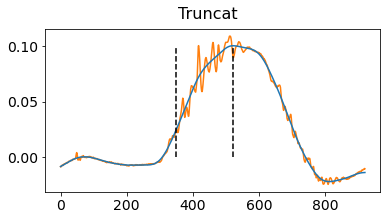


MLSi16F9mLHV7kV - Trial03 - Seg11
Avg. Pressure of zipping = 0.074 (bar), Max. P. = 0.109 (bar) in 0.093 (sec)

(920,)
0.20604452017776737
0.09897742566293692


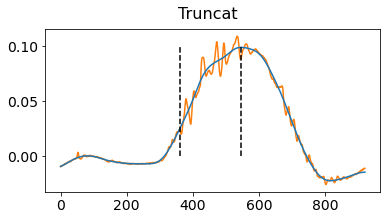


MLSi16F9mLHV7kV - Trial03 - Seg12
Avg. Pressure of zipping = 0.074 (bar), Max. P. = 0.109 (bar) in 0.101 (sec)

(920,)
0.20654169334936293
0.10028464088971532


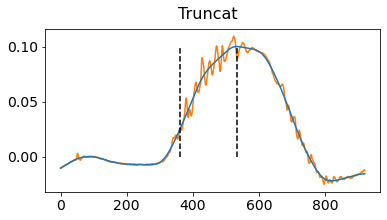


MLSi16F9mLHV7kV - Trial03 - Seg13
Avg. Pressure of zipping = 0.074 (bar), Max. P. = 0.110 (bar) in 0.093 (sec)

(920,)
0.20160203732189724
0.09831496089901172


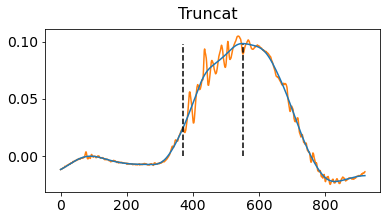


MLSi16F9mLHV7kV - Trial03 - Seg14
Avg. Pressure of zipping = 0.073 (bar), Max. P. = 0.105 (bar) in 0.098 (sec)

(920,)
0.2065096176608729
0.1002670809282502


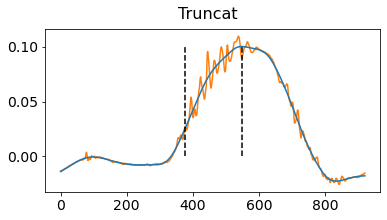


MLSi16F9mLHV7kV - Trial03 - Seg15
Avg. Pressure of zipping = 0.074 (bar), Max. P. = 0.110 (bar) in 0.093 (sec)

(920,)
0.20250015659961826
0.09842946934892248


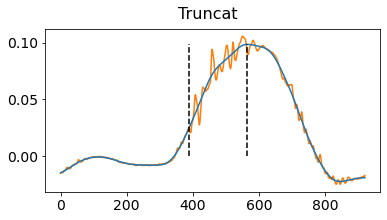


MLSi16F9mLHV7kV - Trial03 - Seg16
Avg. Pressure of zipping = 0.073 (bar), Max. P. = 0.106 (bar) in 0.095 (sec)

(920,)
0.2045048871302456
0.09896983536179844


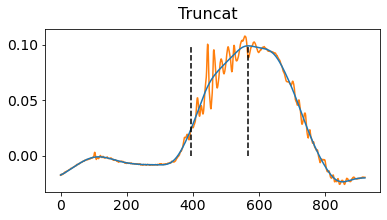


MLSi16F9mLHV7kV - Trial03 - Seg17
Avg. Pressure of zipping = 0.073 (bar), Max. P. = 0.108 (bar) in 0.093 (sec)

(920,)
0.2033822380330943
0.09808943989293205


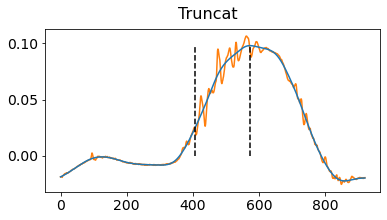


MLSi16F9mLHV7kV - Trial03 - Seg18
Avg. Pressure of zipping = 0.072 (bar), Max. P. = 0.107 (bar) in 0.090 (sec)

(920,)
0.20343035156582934
0.09785710618944081


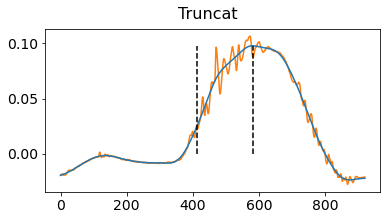


MLSi16F9mLHV7kV - Trial03 - Seg19
Avg. Pressure of zipping = 0.073 (bar), Max. P. = 0.107 (bar) in 0.091 (sec)

(920,)
0.2033822380330943
0.09781233361441706


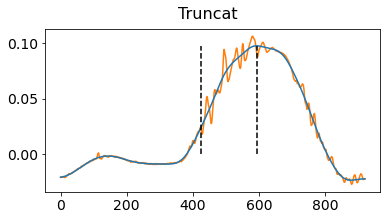


MLSi16F9mLHV7kV - Trial03 - Seg20
Avg. Pressure of zipping = 0.072 (bar), Max. P. = 0.107 (bar) in 0.091 (sec)

(919,)
0.21266814985096
0.05347107547462554


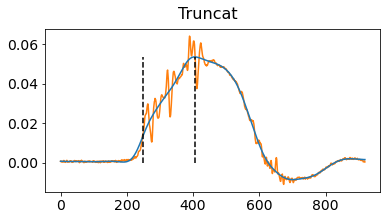


MLSi16F10mLHV7kV - Trial03 - Seg1
Avg. Pressure of zipping = 0.037 (bar), Max. P. = 0.064 (bar) in 0.085 (sec)

(919,)
0.20631716352993268
0.049565196270354134


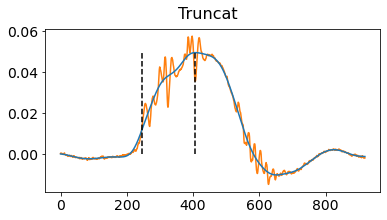


MLSi16F10mLHV7kV - Trial03 - Seg2
Avg. Pressure of zipping = 0.037 (bar), Max. P. = 0.058 (bar) in 0.087 (sec)

(921,)
0.20880302938791054
0.05035802128230646


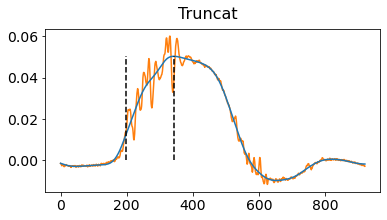


MLSi16F10mLHV7kV - Trial03 - Seg3
Avg. Pressure of zipping = 0.036 (bar), Max. P. = 0.060 (bar) in 0.078 (sec)

(920,)
0.20692660161124338
0.04900395375813088


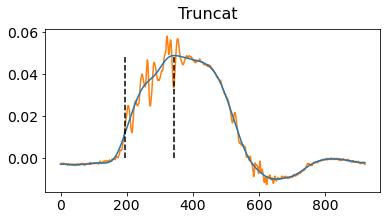


MLSi16F10mLHV7kV - Trial03 - Seg4
Avg. Pressure of zipping = 0.036 (bar), Max. P. = 0.058 (bar) in 0.080 (sec)

(920,)
0.20880302938791054
0.049680338138660046


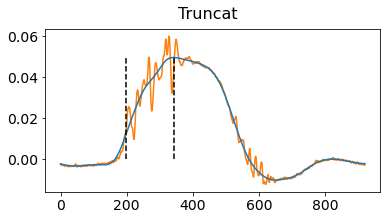


MLSi16F10mLHV7kV - Trial03 - Seg5
Avg. Pressure of zipping = 0.036 (bar), Max. P. = 0.060 (bar) in 0.078 (sec)

(920,)
0.20681433670152824
0.048678928596929766


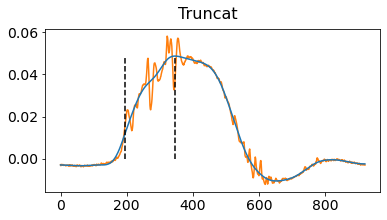


MLSi16F10mLHV7kV - Trial03 - Seg6
Avg. Pressure of zipping = 0.035 (bar), Max. P. = 0.058 (bar) in 0.082 (sec)

(920,)
0.2093002025595061
0.04937424376920366


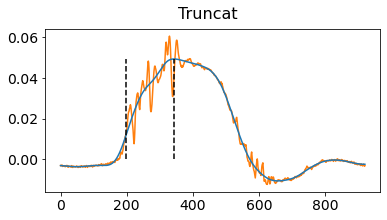


MLSi16F10mLHV7kV - Trial03 - Seg7
Avg. Pressure of zipping = 0.036 (bar), Max. P. = 0.061 (bar) in 0.078 (sec)

(920,)
0.20644546628389282
0.048233284493138184


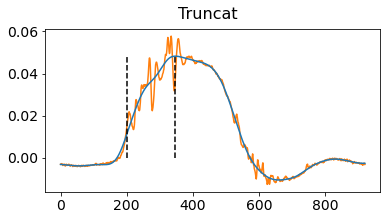


MLSi16F10mLHV7kV - Trial03 - Seg8
Avg. Pressure of zipping = 0.035 (bar), Max. P. = 0.058 (bar) in 0.079 (sec)

(920,)
0.2079049101101895
0.048789144809663676


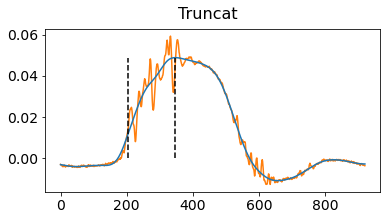


MLSi16F10mLHV7kV - Trial03 - Seg9
Avg. Pressure of zipping = 0.035 (bar), Max. P. = 0.059 (bar) in 0.077 (sec)

(920,)
0.20641339059540278
0.04789011807811927


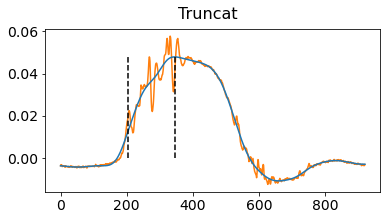


MLSi16F10mLHV7kV - Trial03 - Seg10
Avg. Pressure of zipping = 0.035 (bar), Max. P. = 0.058 (bar) in 0.077 (sec)

(920,)
0.20723132065189873
0.048461161322271684


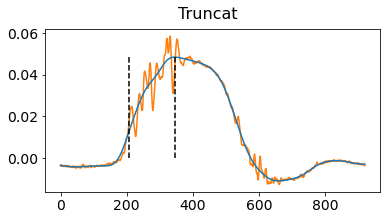


MLSi16F10mLHV7kV - Trial03 - Seg11
Avg. Pressure of zipping = 0.035 (bar), Max. P. = 0.059 (bar) in 0.076 (sec)

(920,)
0.2058039525140921
0.04759584062958522


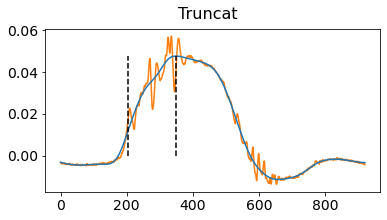


MLSi16F10mLHV7kV - Trial03 - Seg12
Avg. Pressure of zipping = 0.034 (bar), Max. P. = 0.057 (bar) in 0.079 (sec)

(920,)
0.20679829885728324
0.04824677021010601


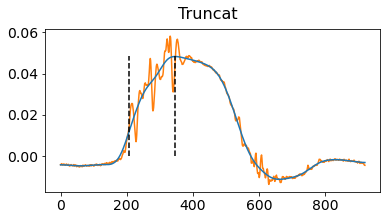


MLSi16F10mLHV7kV - Trial03 - Seg13
Avg. Pressure of zipping = 0.035 (bar), Max. P. = 0.058 (bar) in 0.075 (sec)

(920,)
0.20593225526805223
0.04733584420447945


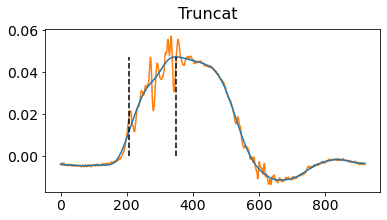


MLSi16F10mLHV7kV - Trial03 - Seg14
Avg. Pressure of zipping = 0.034 (bar), Max. P. = 0.057 (bar) in 0.077 (sec)

(920,)
0.2067020717918131
0.04804478734421194


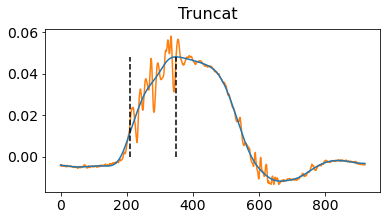


MLSi16F10mLHV7kV - Trial03 - Seg15
Avg. Pressure of zipping = 0.035 (bar), Max. P. = 0.058 (bar) in 0.075 (sec)

(920,)
0.2051945144327814
0.04710571582539336


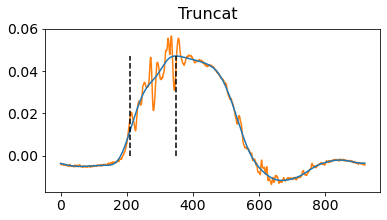


MLSi16F10mLHV7kV - Trial03 - Seg16
Avg. Pressure of zipping = 0.034 (bar), Max. P. = 0.057 (bar) in 0.076 (sec)

(920,)
0.2065096176608729
0.04763018765929147


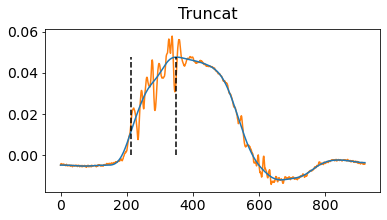


MLSi16F10mLHV7kV - Trial03 - Seg17
Avg. Pressure of zipping = 0.034 (bar), Max. P. = 0.058 (bar) in 0.074 (sec)

(920,)
0.20463318988420573
0.04682210576628354


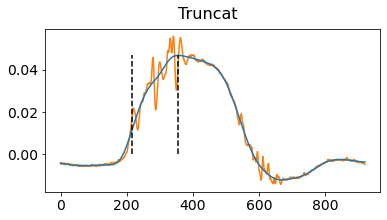


MLSi16F10mLHV7kV - Trial03 - Seg18
Avg. Pressure of zipping = 0.034 (bar), Max. P. = 0.056 (bar) in 0.076 (sec)

(920,)
0.20655773119360796
0.04711331028641763


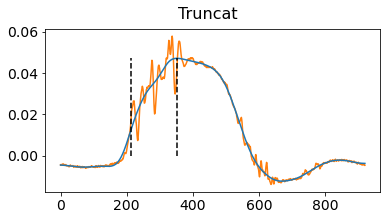


MLSi16F10mLHV7kV - Trial03 - Seg19
Avg. Pressure of zipping = 0.034 (bar), Max. P. = 0.058 (bar) in 0.076 (sec)

(920,)
0.20527470365400646
0.04644723018419508


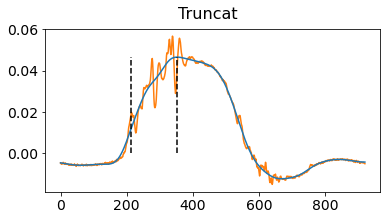


MLSi16F10mLHV7kV - Trial03 - Seg20
Avg. Pressure of zipping = 0.033 (bar), Max. P. = 0.057 (bar) in 0.076 (sec)

(919,)
0.2410551341646427
0.03051814124462854


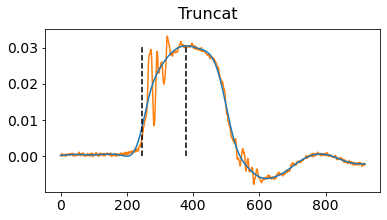


MLSi16F11mLHV7kV - Trial03 - Seg1
Avg. Pressure of zipping = 0.024 (bar), Max. P. = 0.033 (bar) in 0.072 (sec)

(919,)
0.24081456650096741
0.027931417077453835


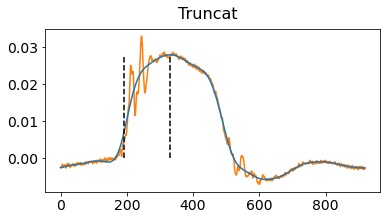


MLSi16F11mLHV7kV - Trial03 - Seg2
Avg. Pressure of zipping = 0.023 (bar), Max. P. = 0.033 (bar) in 0.076 (sec)

(921,)
0.23694944603791795
0.02798982273767353


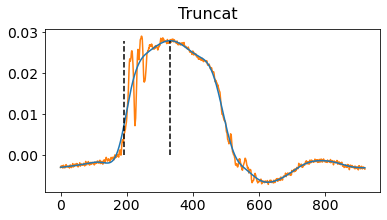


MLSi16F11mLHV7kV - Trial03 - Seg3
Avg. Pressure of zipping = 0.023 (bar), Max. P. = 0.029 (bar) in 0.076 (sec)

(920,)
0.24086268003370245
0.026790431342487098


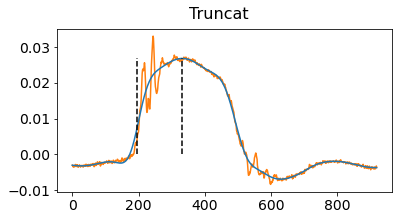


MLSi16F11mLHV7kV - Trial03 - Seg4
Avg. Pressure of zipping = 0.022 (bar), Max. P. = 0.033 (bar) in 0.075 (sec)

(920,)
0.23573056987529656
0.027040334330282217


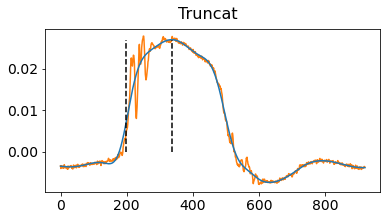


MLSi16F11mLHV7kV - Trial03 - Seg5
Avg. Pressure of zipping = 0.022 (bar), Max. P. = 0.028 (bar) in 0.075 (sec)

(920,)
0.24113532338586777
0.025963397981864922


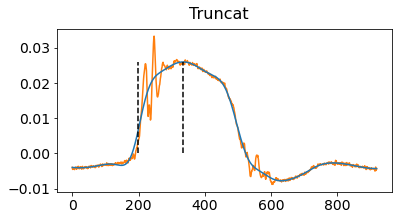


MLSi16F11mLHV7kV - Trial03 - Seg6
Avg. Pressure of zipping = 0.021 (bar), Max. P. = 0.033 (bar) in 0.074 (sec)

(920,)
0.2371579380131032
0.026258195828864822


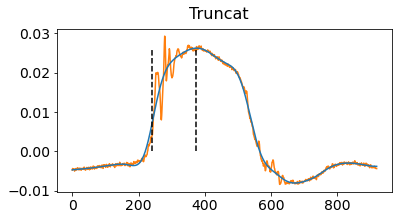


MLSi16F11mLHV7kV - Trial03 - Seg7
Avg. Pressure of zipping = 0.022 (bar), Max. P. = 0.029 (bar) in 0.073 (sec)

(920,)
0.24052588530455707
0.025292790797129372


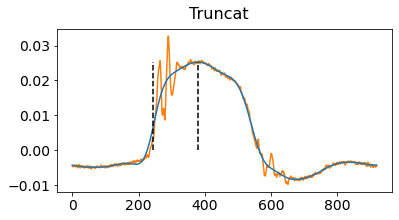


MLSi16F11mLHV7kV - Trial03 - Seg8
Avg. Pressure of zipping = 0.021 (bar), Max. P. = 0.033 (bar) in 0.073 (sec)

(920,)
0.23451169371267513
0.025450743661020875


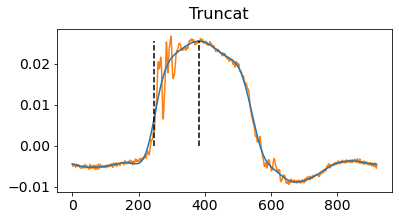


MLSi16F11mLHV7kV - Trial03 - Seg9
Avg. Pressure of zipping = 0.021 (bar), Max. P. = 0.027 (bar) in 0.074 (sec)

(920,)
0.23911455501099546
0.02437419048670411


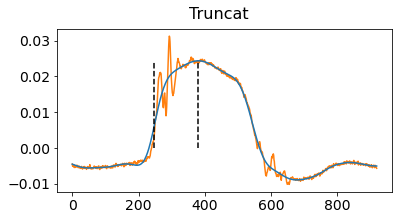


MLSi16F11mLHV7kV - Trial03 - Seg10
Avg. Pressure of zipping = 0.020 (bar), Max. P. = 0.031 (bar) in 0.072 (sec)

(920,)
0.23302017419788842
0.02453232666979971


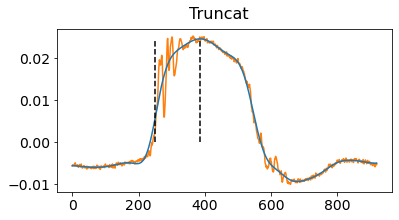


MLSi16F11mLHV7kV - Trial03 - Seg11
Avg. Pressure of zipping = 0.020 (bar), Max. P. = 0.025 (bar) in 0.073 (sec)

(920,)
0.23755888411922865
0.02382648626649833


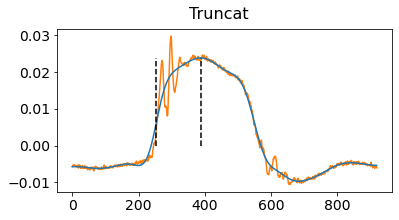


MLSi16F11mLHV7kV - Trial03 - Seg12
Avg. Pressure of zipping = 0.020 (bar), Max. P. = 0.030 (bar) in 0.073 (sec)

(920,)
0.2357786834080316
0.024100660365953264


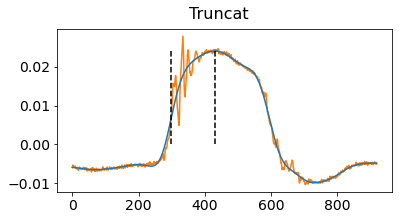


MLSi16F11mLHV7kV - Trial03 - Seg13
Avg. Pressure of zipping = 0.020 (bar), Max. P. = 0.028 (bar) in 0.072 (sec)

(920,)
0.23722208939008327
0.0233028922210351


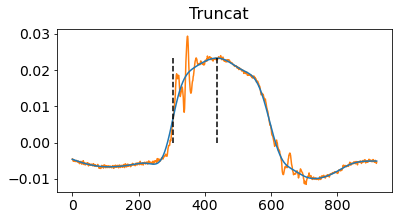


MLSi16F11mLHV7kV - Trial03 - Seg14
Avg. Pressure of zipping = 0.019 (bar), Max. P. = 0.029 (bar) in 0.072 (sec)

(920,)
0.2340465962295696
0.023474285025759378


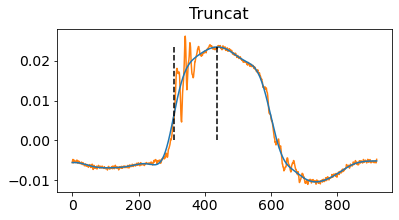


MLSi16F11mLHV7kV - Trial03 - Seg15
Avg. Pressure of zipping = 0.019 (bar), Max. P. = 0.026 (bar) in 0.072 (sec)

(920,)
0.23763907334045375
0.022880080868227404


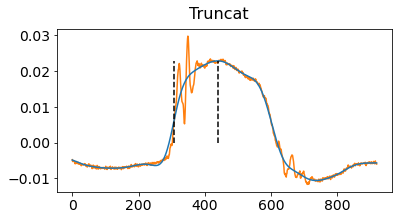


MLSi16F11mLHV7kV - Trial03 - Seg16
Avg. Pressure of zipping = 0.019 (bar), Max. P. = 0.030 (bar) in 0.072 (sec)

(920,)
0.23250696318204783
0.023107534053343953


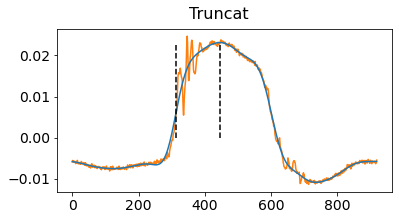


MLSi16F11mLHV7kV - Trial03 - Seg17
Avg. Pressure of zipping = 0.019 (bar), Max. P. = 0.025 (bar) in 0.072 (sec)

(920,)
0.23680510543971278
0.022357560544560534


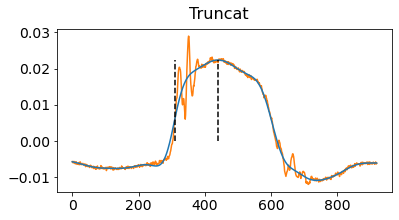


MLSi16F11mLHV7kV - Trial03 - Seg18
Avg. Pressure of zipping = 0.019 (bar), Max. P. = 0.029 (bar) in 0.071 (sec)

(920,)
0.2333569689270338
0.022487940255613653


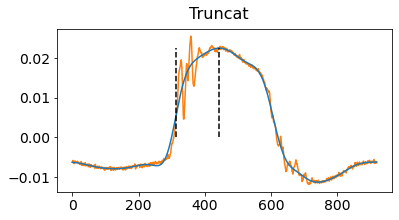


MLSi16F11mLHV7kV - Trial03 - Seg19
Avg. Pressure of zipping = 0.019 (bar), Max. P. = 0.026 (bar) in 0.071 (sec)

(920,)
0.23667680268575264
0.021851875529292464


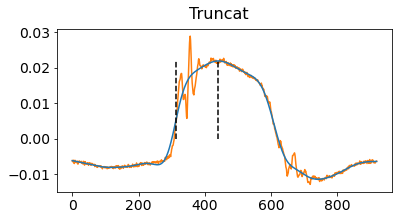


MLSi16F11mLHV7kV - Trial03 - Seg20
Avg. Pressure of zipping = 0.018 (bar), Max. P. = 0.029 (bar) in 0.069 (sec)



In [5]:
'''
Measurement [Syringe pump infill volume exp.] 2022.04.26 ten charge-discharge pulses cycles at 1 Hz. 
Sampling frequency of NIDAQ is caliberated at 1840 Hz
'''
measureDataPath = ".\Data220426"

pressData = []
Fs = 1840

sigFreq = 2
trialArray = (0.9+np.arange(1, 21))/sigFreq
beginInd = (Fs * np.array(0.1 + trialArray)).astype(int)
endInd = (Fs * np.array(0.1 + 1/sigFreq + trialArray)).astype(int)

for root, directories, files in walk(measureDataPath):
    for fileName in files:
         if (fileName[-3:] == 'csv'):    
                condi, names, trialNum = decodeFileName(fileName)
                
                data = np.genfromtxt(ospa.join(root, fileName), delimiter=',')
                
                data = (data[:,2] - calib[1]) * calib[0] # Unit conversion and only keep used channel (2), channel (0) is current
                
                dataMin = np.min(data) 
                if dataMin < 0:
                    data = data-dataMin # Rectify data

                inactivePressure = np.min(data[:int(0.5*Fs)])
                
#                 ax, _ = aPlot()
#                 ax.plot(data)
#                 ax.plot(beginInd, 0.02+np.zeros(beginInd.shape), '*r')
#                 ax.plot(endInd, 0.02+np.zeros(endInd.shape), '.g')
#                 plt.show()

                for i in range(len(beginInd)):             
                    avgPressure, deltaT, maxPressure, segInd = processPressure(data[beginInd[i]:endInd[i]], Fs, 
                                                                               inactivePressure, 20, 3)
                    
                    P0 = data[beginInd[i]+segInd[0]]-inactivePressure

                    print("\n%s - Trial%02d - Seg%d" % (names, trialNum, i+1))
                    print("Avg. Pressure of zipping = %.3f (bar), Max. P. = %.3f (bar) in %.3f (sec)\n" % 
                          (avgPressure, maxPressure, deltaT))
                    pressData.append([names, avgPressure*100, deltaT, maxPressure*100, P0*100,
                                    (data[beginInd[i]:beginInd[i]+segInd[1]+int(0.5*Fs)]-inactivePressure)*100, segInd, sigFreq]) # 1 bar = 100 kPa
                    
pressData = pd.DataFrame(pressData, columns = ['CondiName','AvgPressure_kPa','RiseTime_sec','MaxPressure_kPa',
                                               'P0_kPa','PressSig_kPa','SegIndex', 'SigFreq'])

sigData = pressData[['CondiName','PressSig_kPa','SegIndex']] 
     
pressData = pressData.drop(columns=['PressSig_kPa','SegIndex'])
pressData.to_csv("Measurements.csv")

In [ ]:
'''Measurement 2022 Duel Trial'''
# pressData = []
# Fs = 1000
# beginInd = ((np.array([1.5, 4]) - 0.1) * Fs).astype(int)
# endInd = ((np.array([3, 5.5]) + 0.1) * Fs).astype(int)

# for root, directories, files in walk(".\data\DualTrial"):
#     for fileName in files:
#          if (fileName[-3:] == 'csv'):    
#                 condi, names, trialNum = decodeFileName(fileName)
                
#                 data = np.genfromtxt(ospa.join(root, fileName), delimiter=',')
                
#                 data = (data[:,2] - calib[1]) * calib[0] # Unit conversion and only keep used channel (2), channel (0) is current
                
#                 dataMin = np.min(data) 
#                 if dataMin < 0:
#                     data = data-dataMin # Rectify data

#                 inactivePressure = np.min(data[:int(0.5*Fs)])

#                 for i in range(len(beginInd)): 
#                     avgPressure, deltaT, maxPressure, segInd = processPressure(data[beginInd[i]:endInd[i]], Fs, inactivePressure)
#                     P0 = data[beginInd[i]+segInd[0]]-inactivePressure

#                     print("\n%s - Trial%02d - Seg%d" % (names, trialNum, i+1))
#                     print("Avg. Pressure of zipping = %.3f (bar), Max. P. = %.3f (bar) in %.3f (sec)\n" % 
#                           (avgPressure, maxPressure, deltaT))
#                     pressData.append([names, avgPressure*100, deltaT, maxPressure*100, P0*100,
#                                     (data[beginInd[i]:beginInd[i]+segInd[1]+int(0.5*Fs)]-inactivePressure)*100, segInd]) # 1 bar = 100 kPa


In [ ]:
'''Measurement 2022 Twenty Trial (Act4 Act6, with frequency of 0.5Hz, 1Hz)'''
'''
Shifted0.5s: 1-3, 5-7, 9-11, ...
[1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77]
'''

pressData = []
Fs = 2000

# measureDataPath = ".\Data220401Relabelled\ValidData"
measureDataPath = ".\Data220401Relabelled\Act6Volume"

for root, directories, files in walk(measureDataPath):
    for fileName in files:
         if (fileName[-3:] == 'csv'):    
                condi, names, trialNum, sigFreq = decodeFileName2(fileName)
                
                trialArray = np.arange(1, 40, 2.22)/sigFreq
                beginInd = (Fs * np.array(0.1 + trialArray)).astype(int)
                endInd = (Fs * np.array(0.1 + 2/sigFreq + trialArray)).astype(int)
                
                data = np.genfromtxt(ospa.join(root, fileName), delimiter=',')
                
                data = (data[:,2] - calib[1]) * calib[0] # Unit conversion and only keep used channel (2), channel (0) is current
                
                dataMin = np.min(data) 
                if dataMin < 0:
                    data = data-dataMin # Rectify data

                inactivePressure = np.min(data[:int(0.5*Fs)])
                
#                 ax, _ = aPlot()
#                 ax.plot(data)
#                 ax.plot(beginInd, np.zeros(beginInd.shape), '*r')
#                 ax.plot(endInd, np.zeros(endInd.shape), '*g')
#                 plt.show()

                for i in range(len(beginInd)): 
#                     ax.plot(beginInd[i]+np.arange(len(data[beginInd[i]:endInd[i]])), data[beginInd[i]:endInd[i]])
                    avgPressure, deltaT, maxPressure, segInd = processPressure(data[beginInd[i]:endInd[i]], Fs, 
                                                                               inactivePressure, 20, 8)
                    P0 = data[beginInd[i]+segInd[0]]-inactivePressure

                    print("\n%s - Trial%02d - Seg%d" % (names, trialNum, i+1))
                    print("Avg. Pressure of zipping = %.3f (bar), Max. P. = %.3f (bar) in %.3f (sec)\n" % 
                          (avgPressure, maxPressure, deltaT))
                    pressData.append([names, avgPressure*100, deltaT, maxPressure*100, P0*100,
                                    (data[beginInd[i]:beginInd[i]+segInd[1]+int(0.5*Fs)]-inactivePressure)*100, segInd, sigFreq]) # 1 bar = 100 kPa
                    
pressData = pd.DataFrame(pressData, columns = ['CondiName','AvgPressure_kPa','RiseTime_sec','MaxPressure_kPa',
                                               'P0_kPa','PressSig_kPa','SegIndex', 'SigFreq'])

sigData = pressData[['CondiName','PressSig_kPa','SegIndex']] 
     
pressData = pressData.drop(columns=['PressSig_kPa','SegIndex'])
pressData.to_csv("Measurements.csv")

In [ ]:
'''Measurement 2022 Frequency comparison'''
pressData = []
Fs = 2000

for root, directories, files in walk(".\Data220401Relabelled\Act6Freq"):
    for fileName in files:
         if (fileName[-3:] == 'csv'):    
                condi, names, trialNum, sigFreq = decodeFileName2(fileName)
                
                trialArray = np.arange(1, 40, 2.22)/sigFreq
                beginInd = (Fs * np.array(0.1 + trialArray)).astype(int)
                endInd = (Fs * np.array(0.1 + 2/sigFreq + trialArray)).astype(int)
                
                data = np.genfromtxt(ospa.join(root, fileName), delimiter=',')
                
                data = (data[:,2] - calib[1]) * calib[0] # Unit conversion and only keep used channel (2), channel (0) is current
                
                dataMin = np.min(data) 
                if dataMin < 0:
                    data = data-dataMin # Rectify data

                inactivePressure = np.min(data[:int(0.5*Fs)])
                
                cutInd = cutRepeatTrial(data, Fs, inactivePressure, 20, 8)           
                
                for i in range(len(cutInd)-1): 
                    avgPressure, deltaT, maxPressure, segInd = processPressure(data[cutInd[i]:cutInd[i+1]], Fs, 
                                                                               inactivePressure, 100, 10)
                    P0 = data[cutInd[i]+segInd[0]]-inactivePressure

                    print("\n%s - Trial%02d - Seg%d" % (names, trialNum, i+1))
                    print("Avg. Pressure of zipping = %.3f (bar), Max. P. = %.3f (bar) in %.3f (sec)\n" % 
                          (avgPressure, maxPressure, deltaT))
                    pressData.append([names, avgPressure*100, deltaT, maxPressure*100, P0*100,
                                    (data[cutInd[i]:cutInd[i]+int(1.5*segInd[1])] - inactivePressure)*100, segInd, sigFreq]) # 1 bar = 100 kPa
                    
                ''' Plot the Entire Pressure Signal '''
                if False:
                    ax,_ = aPlot(dpi = 300)
                    ax.plot(data - inactivePressure,color='tab:red')
                    ax.set_ylabel('Pressure (kPa)')
                    sample2Time(ax, Fs)
                    plt.show()
                    

        
# pressData = pd.DataFrame(pressData, columns = ['CondiName','AvgPressure_kPa','RiseTime_sec','MaxPressure_kPa',
#                                                'P0_kPa','PressSig_kPa','SegIndex', 'SigFreq'])

# sigData = pressData[['CondiName','PressSig_kPa','SegIndex']] 
     
# pressData = pressData.drop(columns=['PressSig_kPa','SegIndex'])
# pressData.to_csv("Measurements.csv")


# ''' Incorrect Index? '''
# for i in sigData.index:
#     ax,_=aPlot()
#     ax.plot(sigData.loc[i,'PressSig_kPa'],color='tab:red')
#     ax.plot([sigData.loc[i,'SegIndex'][0],sigData.loc[i,'SegIndex'][0]], [0, 10], '--k')
#     ax.plot([sigData.loc[i,'SegIndex'][1],sigData.loc[i,'SegIndex'][1]], [0, 10], '--k')
#     ax.set_ylabel('Pressure_kPa')

In [ ]:
'''Measurement 2021'''
# Fs = 1000

# pressData = []
# ''' Process measurement data saved as individual csv files by trial '''
# for root, directories, files in walk(".\data\ValidData"):
#     for fileName in files:
#          if (fileName[-3:] == 'csv'):       
#             condi, names, trialNum = decodeFileName(fileName)

#             data = np.genfromtxt(ospa.join(root, fileName), delimiter=',')
            
#             data = (data - calib[1]) * calib[0] # Unit conversion       
#             dataMin = np.min(data) 
#             if dataMin < 0:
#                 data = data-dataMin # Rectify data
            
#             inactivePressure = np.min(data[:int(0.5*Fs)])

#             avgPressure, deltaT, maxPressure, segInd = processPressure(data, Fs, inactivePressure)
#             P0 = data[segInd[0]]-inactivePressure
            
#             print("\n%s - Trial%02d" % (names, trialNum))
#             print("Avg. Pressure of zipping = %.3f (bar), Max. P. = %.3f (bar) in %.3f (sec)\n" % 
#                   (avgPressure, maxPressure, deltaT)) 
#             pressData.append([names, avgPressure*100, deltaT, maxPressure*100, P0*100,
#                              (data[:segInd[1]+int(0.5*Fs)]-inactivePressure)*100, segInd]) # 1 bar = 100 kPa

# ''' Process data switch three times with reversed polarity from bipolar HV Trek box '''
# beginInd = ((np.array([1, 8, 15]) - 0.1) * Fs).astype(int)
# endInd = ((np.array([5, 12, 19]) + 0.1) * Fs).astype(int)
# for root, directories, files in walk(".\data\TrekData"):
#     for fileName in files:
#          if (fileName[-3:] == 'csv'):
#             condi, names, trialNum = decodeFileName(fileName)

#             data = np.genfromtxt(ospa.join(root, fileName), delimiter=',')
            
#             data = (data - calib[1]) * calib[0] # Unit conversion       
#             dataMin = np.min(data) 
#             if dataMin < 0:
#                 data = data-dataMin # Rectify data

#             inactivePressure = np.min(data[:int(0.5*Fs)])

#             for i in range(len(beginInd)): 
#                 avgPressure, deltaT, maxPressure, segInd = processPressure(data[beginInd[i]:endInd[i]], Fs, inactivePressure)
#                 P0 = data[beginInd[i]+segInd[0]]-inactivePressure
                
#                 print("\n%s - Trial%02d - Seg%d" % (names, trialNum, i+1))
#                 print("Avg. Pressure of zipping = %.3f (bar), Max. P. = %.3f (bar) in %.3f (sec)\n" % 
#                       (avgPressure, maxPressure, deltaT))
#                 pressData.append([names, avgPressure*100, deltaT, maxPressure*100, P0*100,
#                                 (data[beginInd[i]:beginInd[i]+segInd[1]+int(0.5*Fs)]-inactivePressure)*100, segInd]) # 1 bar = 100 kPa

# ''' Process data driven by reversed polarity from bipolar wearable controller '''                
# for root, directories, files in walk(".\data\ValidData2"):
#     for fileName in files:
#          if (fileName[-3:] == 'csv'):       
#             condi, names, trialNum = decodeFileName(fileName)
#             names = re.split('U6900V', names)[0] # Shorten the names

#             data = np.genfromtxt(ospa.join(root, fileName), delimiter=',')     
            
#             data = (data[:,1] - calib[1]) * calib[0] # Unit conversion and only keep used channel (1)
            
#             dataMin = np.min(data) 
#             if dataMin < 0:
#                 data = data-dataMin # Rectify data
            
#             inactivePressure = np.min(data[:int(0.5*Fs)])

#             avgPressure, deltaT, maxPressure, segInd = processPressure(data[:int(3.5*Fs)], Fs, inactivePressure)
#             P0 = data[segInd[0]]-inactivePressure
            
#             print("\n%s - Trial%02d" % (names, trialNum))
#             print("Avg. Pressure of zipping = %.3f (bar), Max. P. = %.3f (bar) in %.3f (sec)\n" % 
#                   (avgPressure, maxPressure, deltaT)) 
#             pressData.append([names, avgPressure*100, deltaT, maxPressure*100, P0*100,
#                              (data[:segInd[1]+int(0.5*Fs)]-inactivePressure)*100, segInd]) # 1 bar = 100 kPa

# ''' Process data switch two times with reversed polarity from bipolar HV Trek box (2022) '''
# beginInd = ((np.array([1.5, 4]) - 0.1) * Fs).astype(int)
# endInd = ((np.array([3, 5.5]) + 0.1) * Fs).astype(int)
# for root, directories, files in walk(".\data\TrekData2"):
#     for fileName in files:
#          if (fileName[-3:] == 'csv'):
#             condi, names, trialNum = decodeFileName(fileName)

#             data = np.genfromtxt(ospa.join(root, fileName), delimiter=',')
            
#             data = (data[:,2] - calib[1]) * calib[0] # Unit conversion and only keep used channel (2) 
#             dataMin = np.min(data) 
#             if dataMin < 0:
#                 data = data-dataMin # Rectify data

#             inactivePressure = np.min(data[:int(0.5*Fs)])

#             for i in range(len(beginInd)): 
#                 avgPressure, deltaT, maxPressure, segInd = processPressure(data[beginInd[i]:endInd[i]], Fs, inactivePressure)
#                 P0 = data[beginInd[i]+segInd[0]]-inactivePressure # To remove DC pressure
                
#                 print("\n%s - Trial%02d - Seg%d" % (names, trialNum, i+1))
#                 print("Avg. Pressure of zipping = %.3f (bar), Max. P. = %.3f (bar) in %.3f (sec)\n" % 
#                       (avgPressure, maxPressure, deltaT))
#                 pressData.append([names, avgPressure*100, deltaT, maxPressure*100, P0*100,
#                                 (data[beginInd[i]:beginInd[i]+segInd[1]+int(0.5*Fs)]-inactivePressure)*100, segInd]) # 1 bar = 100 kPa
                                      
# pressData = pd.DataFrame(pressData, columns = ['CondiName','AvgPressure_kPa','RiseTime_sec','MaxPressure_kPa',
#                                                'P0_kPa','PressSig_kPa','SegIndex'])

# for aCondi in condiTable['CondiName']: # Drop any extra measurement more than five trials
#     allTrials = pressData[pressData['CondiName'] == aCondi]
#     trialNum = allTrials.shape[0]
#     if trialNum > 5:
#         pressData = pressData.drop(pressData[pressData['CondiName'] == aCondi].index)
#         pressData = pressData.append(allTrials.iloc[:5])

# sigData = pressData[['CondiName','PressSig_kPa','SegIndex']] 
     
# pressData = pressData.drop(columns=['PressSig_kPa','SegIndex'])
# pressData.to_csv("Measurements.csv")



In [ ]:
print(sigData.head())
simData = pd.read_csv("./data./temp_result.csv") # Data from model simulation
simData.tail()

In [ ]:
''' New estimation of air volume (2022.04.06) '''
airV0 = 1e-6 # Unit: m3, Initial air volume is roughly estimated to be 1? mL. (volume of inner tube is around 1.8 mL)
 
''' By law of P0V0 = P1V1, with P0 and P1 took from the measurement'''
avgPressLoss = []
for i in sigData.index:
#     airV0 = simData.loc[simData['CondiName'] == sigData.loc[i,'CondiName'], 'dV1Expan_m3'].iloc[0] # Incorrect Assume all oil pushed to tube
    
    i0 = sigData.loc[i,'SegIndex'][0] # Starting index at lowest pressure
    try:
        i1 = np.argwhere(sigData.loc[i,'PressSig_kPa'] == pressData.loc[i,'MaxPressure_kPa'])[0][0] # End index at max pressure
    except:
        i1 = sigData.loc[i,'SegIndex'][1]
    P0 = pressData.loc[i,'P0_kPa']
    P1 = pressData.loc[i,'MaxPressure_kPa']
    
    airV1 = airV0 * P0/P1
    print("%s - For pressure increased from P0 = %.3f kPa to P1 = %.3f kPa" % (sigData.loc[i,'CondiName'],
          pressData.loc[i,'P0_kPa'], pressData.loc[i,'MaxPressure_kPa']))
    print("Time-average pressure = %.3f kPa (gap to max. = %.3f kPa)" % (pressData.loc[i,'AvgPressure_kPa'],
            pressData.loc[i,'MaxPressure_kPa'] - pressData.loc[i,'AvgPressure_kPa']))
    print("Compressed-air steady state volume = %.6f mL" % (airV1 * 1e6))
    
    filtPressure = lowpassFilter(sigData.loc[i,'PressSig_kPa'], 30, Fs, 6) # Smooth volume change before division
    airVi = airV1 * P1 / filtPressure[i0 : i1]  # Unit: m3
    
    Qi = np.diff(airVi) * Fs # Flow rate, Unit: m3/s
    
    PiLoss = simData.loc[simData['CondiName'] == sigData.loc[i,'CondiName'], 'lossFactor'].iloc[0] * Qi *1e-3 # Unit: kPa

    avgPLoss = np.mean(PiLoss) # Unit: kPa
    print("time avg. flow rate = %.3f mL/s and pressure loss = %.3f kPa" % (np.mean(Qi) * 1e6, avgPLoss))
    
    avgPressLoss.append(avgPLoss)
    
    if pressData.loc[i,'MaxPressure_kPa'] > 4: # Check signal 
        ax,_ = aPlot(dpi = 72)
        ax.plot(sigData.loc[i,'PressSig_kPa'],color='tab:red')
        
#         ax.plot(np.arange(i0+1,i1), PiLoss,color='tab:orange')
        
        ax.plot([i0, i0], [0, pressData.loc[i,'P0_kPa']], '-k')
        ax.plot([i1, i1], [0, pressData.loc[i,'MaxPressure_kPa']], '-k')
#         ax.plot([sigData.loc[i,'SegIndex'][1],sigData.loc[i,'SegIndex'][1]], [0, pressData.loc[i,'MaxPressure_kPa']], '--k')
        ax.set_ylabel('Pressure (kPa)')
        
#         ax2 = ax.twinx() 
#         ax2.plot(np.arange(i0,i1), airVi,color='tab:blue')

        sample2Time(ax, Fs)
        
        plt.show()
    
pressData['P1ExpanLoss_kPa'] = avgPressLoss
pressData.to_csv("Measurements.csv")     
    

In [ ]:
'''
Such estimation of pressure loss in tube is very inaccurate due to incorrect estimation of air volume
'''
''' Both Simulation and Measurement Data required '''
# print("Sampling frequency of current dataset = %.3f Hz" % Fs)

# sigData['V0'] = 0

# avgPressLoss = []
# for i in sigData.index:
#     deltaVolume = simData.loc[simData['CondiName'] == sigData.loc[i,'CondiName'], 'dV1Expan_m3'].iloc[0]

#     sigData.loc[i,'V0'] = deltaVolume / (1 - pressData.loc[i,'P0_kPa']/pressData.loc[i,'MaxPressure_kPa']) # Unit: m3
    
#     print("Initial Volume (mL) = %f" % (sigData.loc[i,'V0']*1e6))
#     print("Initial Pressure (kPa) = %f" % pressData.loc[i,'P0_kPa'])
#     print(sigData.loc[i,'SegIndex'])
    
#     print("%s inital air volume = %.6f mL" % (sigData.loc[i,'CondiName'], sigData.loc[i,'V0']*1e6)) 
    
#     ''' Realtime volume '''
# #     filteredPressure = lowpassFilter(sigData.loc[i,'PressSig_kPa'], 20, Fs, 8) # Smooth volume change before differentiation
    
    
#     Vi = sigData.loc[i,'V0'] * pressData.loc[i,'P0_kPa'] / (sigData.loc[i,'PressSig_kPa'] + 1e-3) # Unit: m3
    
#     zippingVi = Vi[sigData.loc[i,'SegIndex'][0]:sigData.loc[i,'SegIndex'][1]] # Unit: m3
    
# #     zippingVi = lowpassFilter(zippingVi, 20, Fs, 8) # Smooth volume change before differentiation
    
#     ''' Realtime volume flow rate '''
#     Qi = np.diff(zippingVi) * Fs # Unit: m3/s
#     avgQ = np.mean(Qi)
#     avgQRough = -deltaVolume * Fs/(sigData.loc[i,'SegIndex'][1] - sigData.loc[i,'SegIndex'][0])
    
#     print("Average flow rate estimated from realtime pressure = %.3f mL/s and from deltaV/zipTime = %.3f mL/s" %
#          (avgQ * 1e6, avgQRough * 1e6))
    
#     '''
#     Two methods: compute from realtime flow rate vs. volume change divided by rising time
#     '''
#     PiLoss = simData.loc[simData['CondiName'] == sigData.loc[i,'CondiName'], 'lossFactor'].iloc[0] * Qi *1e-3 # Unit: kPa 
    
#     avgPLoss = simData.loc[simData['CondiName'] == sigData.loc[i,'CondiName'], 'lossFactor'].iloc[0] * avgQ *1e-3 # Unit: kPa  
#     if (avgPLoss > 0):
#         print("Incorrect Pressure loss")
#     else:
#         print("%s avg. pressure loss = %.2f kPa" % (sigData.loc[i,'CondiName'], avgPLoss))
        
#     avgPLossRough = simData.loc[simData['CondiName'] == sigData.loc[i,'CondiName'], 'lossFactor'].iloc[0]*avgQRough*1e-3 # Unit: kPa    
#     if (avgPLossRough > 0):
#         print("Incorrect Pressure loss (Rough)")
#     else:
#         print("%s avg. pressure loss = %.2f kPa (Rough)" % (sigData.loc[i,'CondiName'], avgPLossRough))    
        
        
#     avgPressLoss.append(avgPLoss)
    
#     segX = np.arange(sigData.loc[i,'SegIndex'][0], sigData.loc[i,'SegIndex'][1]) # For zipping process
#     ax,_=aPlot()
# #     ax.plot(segX, zippingVi,'tab:blue')
#     ax.plot(segX[1:], Qi * 1e6,'tab:blue')
#     ax.plot([sigData.loc[i,'SegIndex'][0],sigData.loc[i,'SegIndex'][0]], [0, 6e-6], '--k')
#     ax.plot([sigData.loc[i,'SegIndex'][1],sigData.loc[i,'SegIndex'][1]], [0, 6e-6], '--k')
# #     ax.set_ylabel('blue: Volume (m3)')
#     ax.set_ylabel('blue: Flow rate (mL/s)')
#     ax2 = ax.twinx() 
#     ax2.plot(segX[1:], PiLoss,color='tab:orange')
#     ax2.plot(sigData.loc[i,'PressSig_kPa'],color='tab:red')
#     ax2.set_ylabel('orange: loss and\nred: measured\nPressure (kPa)')
#     plt.show();
    
# pressData['P1ExpanLoss_kPa'] = avgPressLoss
# pressData.to_csv("Measurements.csv") 